# ENGR 1330 – Computational Thinking and Data Science

## Machine Learning

Machine learning (ML) is the process of  building algorithms that are capable of ‘learning’ from data. ML takes a dataset and attempts to fit a model to the data such that the model can make accurate predictions on data that is either unknown or to fill in missing parts of the data. An example of this would be using ML to predict what videos a user might want to watch based on what they viewed previously. 

The purpose of a Machine learning system is to:
- Fit a model to a dataset 
- Use the model to make predictions about the future
- Use the model to fill in missing data 

This project will develop scripts to train a machine learning model. 

### Background
Scikit will be used to generate and train the model along with making the predictions. Scikit is a common machine learning library and is a good place to start learning about machine learning. The model type for this project will be Support Vector Machine (SVM) that takes in a vector with each element of the vector representing a variable. 

To learn more about Scikit SVM models read the documentation found here:
https://scikit-learn.org/stable/modules/svm.html#svm

## Objective(s):
- Train a model using prvided dataset with a 80/20 training/validation split.
- test your model against the validation set
- predict the future

## Presentation
Prepare a 5-8 min presentation that will be given to the class. 
The presentation should include:
- Description of the dataset used
- Histogram of the weights
- A graph of the data and model
- Accuracy of the model when tested against the validation set
- Graph of the data along with the predicted data
- Predict data using an x that you come up with that is not included in the data
- Expect to be asked questions about the data and model as well as what variables played the largest role.

## Submission 
- Your presentation slides, jupyter notebook, and pdf of the jupyter notebook must be submitted BEFORE the your present.

## Libraries 
- numpy
- pandas
- matplotlib
- scikit

In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats

## Data
- using statistics and graphs describe your data

In [3]:
# read in the data
df = pd.read_csv('Statewide_Greenhouse_Gas_Emissions__Beginning_1990.csv')

In [4]:
# Functions and Objects
class Data:
    def __init__(self, dataframe):
        self.dataframe = dataframe
        self.years = self.get_years()
        #self.fields = self._get_fields()
        
    def get_years(self): return (self.dataframe['Year'].unique().tolist())
        
    def emissions_sum(self, grossornet, nogross=False, emissiontype='MT CO2e AR5 20 yr', sector=None, category=None, subsection1=None, subsection2=None, subsection3=None, gas=None):
        emissions_sum = []
        if grossornet == 'Gross':
            newframe = self.dataframe[self.dataframe['Gross'] == 'Yes']
        else:
            if nogross:
                newframe = self.dataframe[(self.dataframe['Net'] == 'Yes') & (self.dataframe['Gross'] == 'No')]
            else:
                newframe = self.dataframe[self.dataframe['Net'] == 'Yes']
        if sector != None:
            newframe = newframe[newframe['Economic Sector'] == sector]
        if category != None:
            newframe = newframe[newframe['Category'] == category]
        if subsection1 != None:
            
            newframe = newframe[newframe['Sub-Category 1'] == subsection1]
        if subsection2 != None:
            newframe = newframe[newframe['Sub-Category 2'] == subsection2]
        if subsection3 != None:
            newframe = newframe[newframe['Sub-Category 3'] == subsection3]
        if gas != None:
            newframe = newframe[newframe['Gas'] == gas]
        for year in self.years:
            var = newframe[(newframe['Year'] == year)]
            emissions_sum.append(var[emissiontype].sum())
        return emissions_sum

def binsize(data: list):
    # Calculate Bin Number Using Rice Method
    return (int(2 * (len(data) ** (1/3))))

               Year  MT CO2e AR5 20 yr  MT CO2e AR4 100 yr
count  14162.000000       1.416200e+04        1.416200e+04
mean    2004.500777       8.946998e+05        6.448001e+05
std        8.655383       4.072109e+06        3.533402e+06
min     1990.000000      -2.791000e+07       -2.791000e+07
25%     1997.000000       2.590000e+02        2.320000e+02
50%     2005.000000       1.125800e+04        7.954000e+03
75%     2012.000000       1.549012e+05        1.214445e+05
max     2019.000000       5.573480e+07        5.573480e+07

Mean:  422904313.3333333
Median:  419285484.0
IQR:  39763234.25


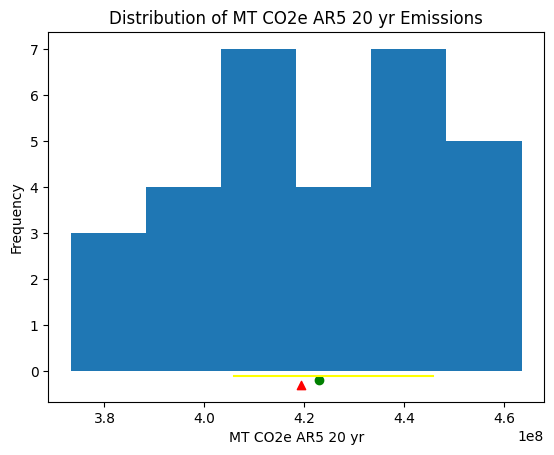

Mean:  312503429.1
Median:  316122972.0
IQR:  38234787.25


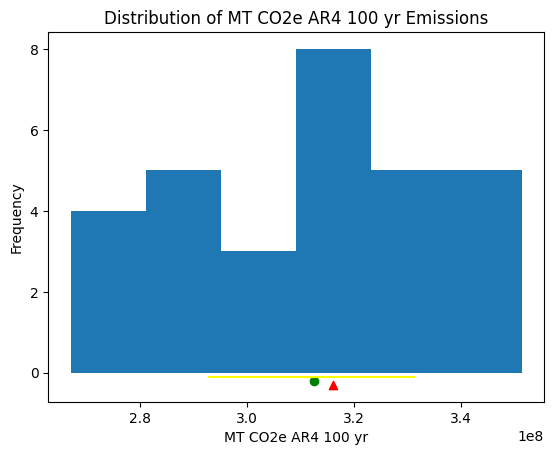

Mean:  31052595.533333335
Median:  31447129.5
IQR:  1863345.5


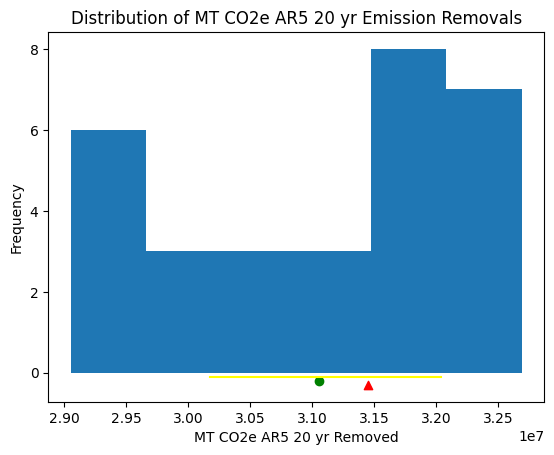

Mean:  31135742.566666666
Median:  31447129.5
IQR:  1781519.0


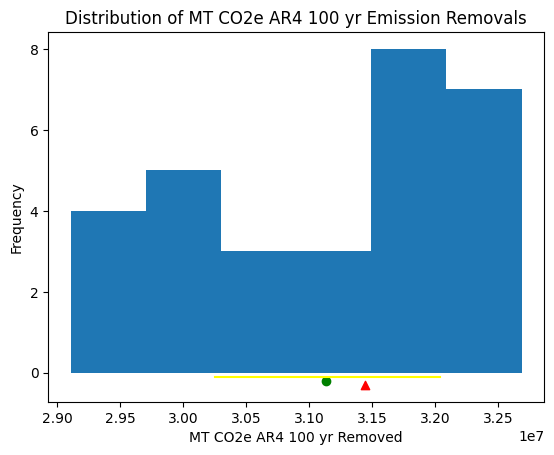

In [5]:
data = Data(df)
# Statistics
print(data.dataframe.describe())
plt.hist(data.emissions_sum('Gross'), bins=binsize(data.emissions_sum('Gross')))
plt.ylabel('Frequency')
plt.xlabel('MT CO2e AR5 20 yr')
plt.title("Distribution of MT CO2e AR5 20 yr Emissions")
mean = np.mean(data.emissions_sum('Gross'))
median = np.median(data.emissions_sum('Gross'))
top_75 = np.percentile(data.emissions_sum('Gross'), 75)
bottom_25 = np.percentile(data.emissions_sum('Gross'), 25)
plt.plot([bottom_25, top_75], [-0.1, -0.1], color='yellow')
plt.scatter(mean, -0.2, color='green')
plt.scatter(median, -0.3, color='red', marker='^')
print()
print('Mean: ',mean)
print('Median: ',median)
print('IQR: ',top_75 - bottom_25)
plt.show()
plt.hist(data.emissions_sum('Gross', emissiontype='MT CO2e AR4 100 yr'),bins=binsize(data.emissions_sum('Gross', emissiontype='MT CO2e AR4 100 yr')))
plt.ylabel('Frequency')
plt.xlabel('MT CO2e AR4 100 yr')
plt.title("Distribution of MT CO2e AR4 100 yr Emissions")
mean = np.mean(data.emissions_sum('Gross', emissiontype='MT CO2e AR4 100 yr'))
median = np.median(data.emissions_sum('Gross', emissiontype='MT CO2e AR4 100 yr'))
top_75 = np.percentile(data.emissions_sum('Gross', emissiontype='MT CO2e AR4 100 yr'), 75)
bottom_25 = np.percentile(data.emissions_sum('Gross', emissiontype='MT CO2e AR4 100 yr'), 25)
plt.plot([bottom_25, top_75], [-0.1, -0.1], color='yellow')
plt.scatter(mean, -0.2, color='green')
plt.scatter(median, -0.3, color='red', marker='^')
print('Mean: ',mean)
print('Median: ',median)
print('IQR: ',top_75 - bottom_25)
plt.show()
net_removals = []
for removal in data.emissions_sum('Net', True):
    net_removals.append(abs(removal))
plt.hist(net_removals, bins=binsize(net_removals))
plt.ylabel('Frequency')
plt.xlabel('MT CO2e AR5 20 yr Removed')
plt.title("Distribution of MT CO2e AR5 20 yr Emission Removals")
mean = np.mean(net_removals)
median = np.median(net_removals)
top_75 = np.percentile(net_removals, 75)
bottom_25 = np.percentile(net_removals, 25)
plt.plot([bottom_25, top_75], [-0.1, -0.1], color='yellow')
plt.scatter(mean, -0.2, color='green')
plt.scatter(median, -0.3, color='red', marker='^')
print('Mean: ',mean)
print('Median: ',median)
print('IQR: ',top_75 - bottom_25)
plt.show()
net_removals = []
for removal in data.emissions_sum('Net', True, emissiontype='MT CO2e AR4 100 yr'):
    net_removals.append(abs(removal))
plt.hist(net_removals, bins=binsize(net_removals))
plt.ylabel('Frequency')
plt.xlabel('MT CO2e AR4 100 yr Removed')
plt.title("Distribution of MT CO2e AR4 100 yr Emission Removals")
mean = np.mean(net_removals)
median = np.median(net_removals)
top_75 = np.percentile(net_removals, 75)
bottom_25 = np.percentile(net_removals, 25)
plt.plot([bottom_25, top_75], [-0.1, -0.1], color='yellow')
plt.scatter(mean, -0.2, color='green')
plt.scatter(median, -0.3, color='red', marker='^')
print('Mean: ',mean)
print('Median: ',median)
print('IQR: ',top_75 - bottom_25)
plt.show()

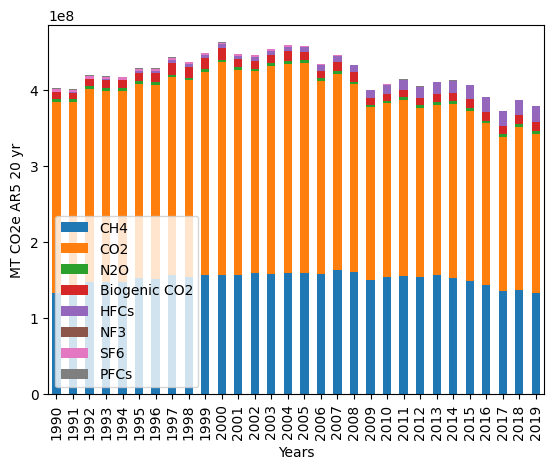

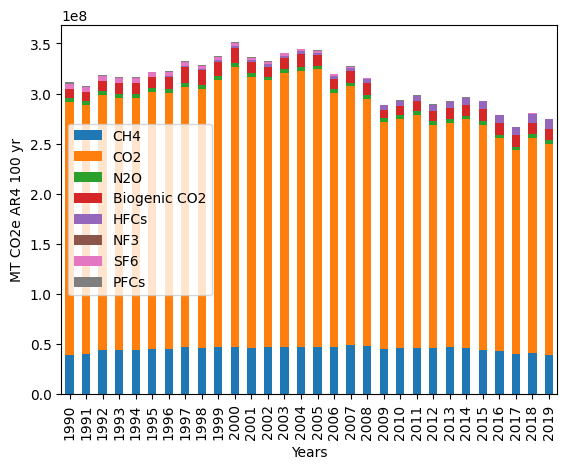

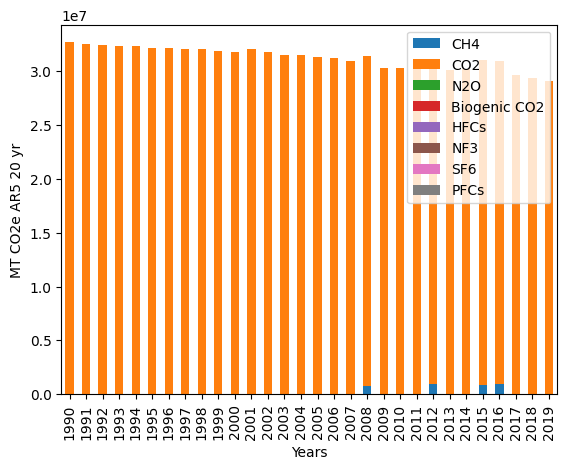

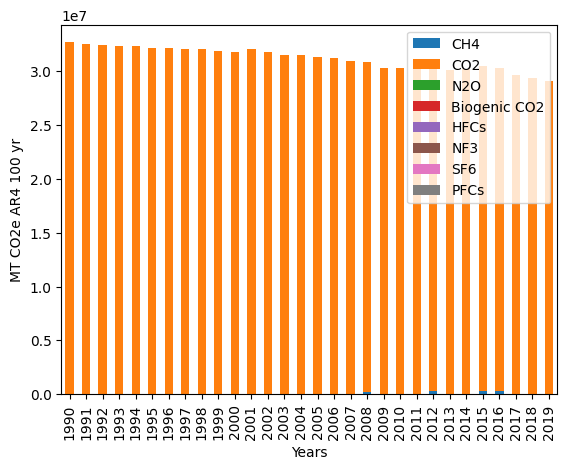

In [11]:
# Explaining the difference between MT CO2e AR5 20 yr and MT CO2e AR4 100 yr
mt20_by_gas = {}
for gas in data.dataframe['Gas'].unique().tolist():
    mt20_by_gas[gas] = data.emissions_sum('Gross', gas=gas)
stacked_bar = pd.DataFrame(mt20_by_gas, index=data.years)
stacked_bar.plot(kind='bar', stacked=True)
plt.xlabel('Years')
plt.ylabel('MT CO2e AR5 20 yr')
plt.show()
mt100_by_gas = {}
for gas in data.dataframe['Gas'].unique().tolist():
    mt100_by_gas[gas] = data.emissions_sum('Gross', emissiontype='MT CO2e AR4 100 yr', gas=gas)
stacked_bar = pd.DataFrame(mt100_by_gas, index=data.years)
stacked_bar.plot(kind='bar', stacked=True)
plt.xlabel('Years')
plt.ylabel('MT CO2e AR4 100 yr')
plt.show()
mt20reductions_by_gas = {}
for gas in data.dataframe['Gas'].unique().tolist():
    mt20reductions_by_gas[gas] = [abs(element) for element in data.emissions_sum('Net', True, gas=gas)]
stacked_bar = pd.DataFrame(mt20reductions_by_gas, index=data.years)
stacked_bar.plot(kind='bar', stacked=True)
plt.xlabel('Years')
plt.ylabel('MT CO2e AR5 20 yr')
plt.savefig('0.jpg')
plt.show()
mt100reductions_by_gas = {}
for gas in data.dataframe['Gas'].unique().tolist():
    mt100reductions_by_gas[gas] = [abs(element) for element in data.emissions_sum('Net', True, emissiontype='MT CO2e AR4 100 yr', gas=gas)]
stacked_bar = pd.DataFrame(mt100reductions_by_gas, index=data.years)
stacked_bar.plot(kind='bar', stacked=True)
plt.xlabel('Years')
plt.ylabel('MT CO2e AR4 100 yr')
plt.savefig('1.jpg')
plt.show()

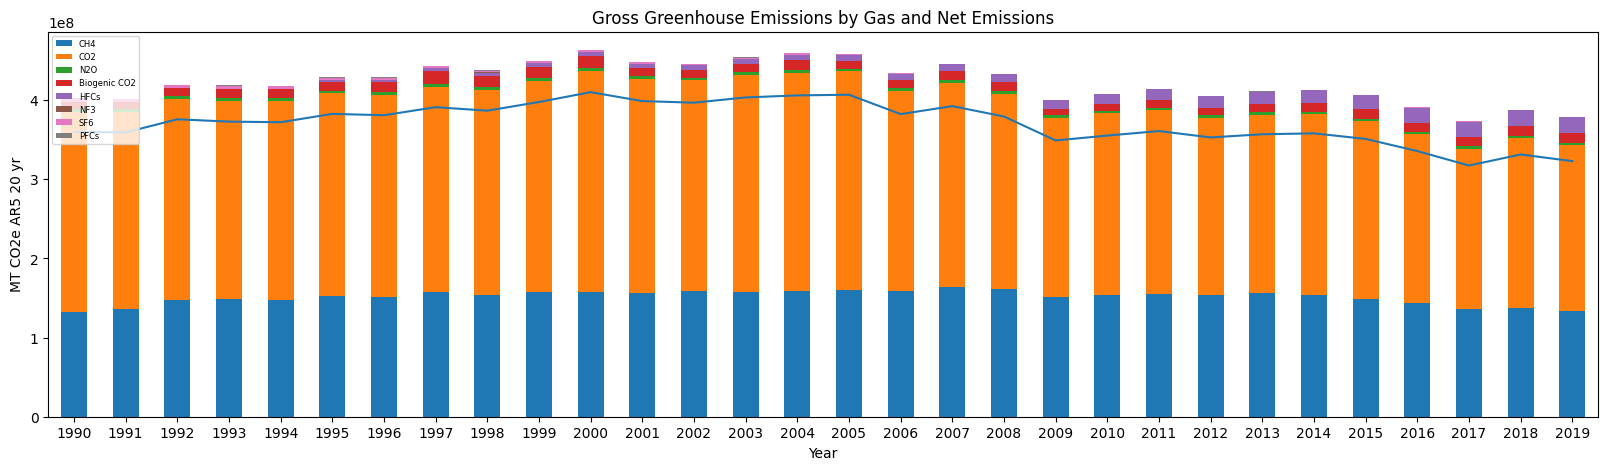

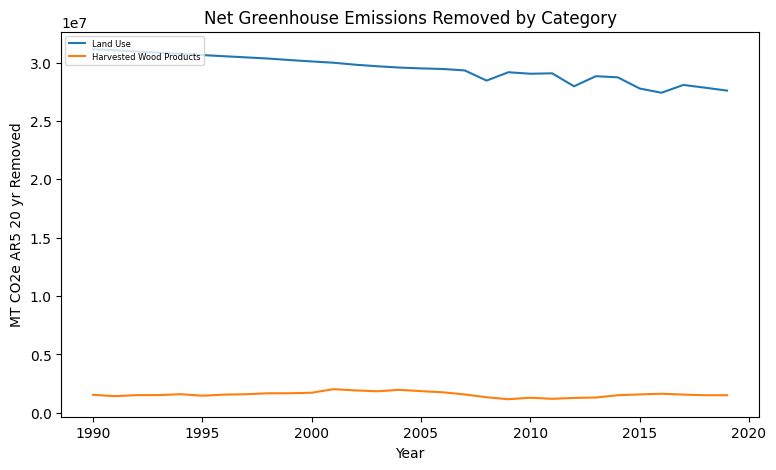

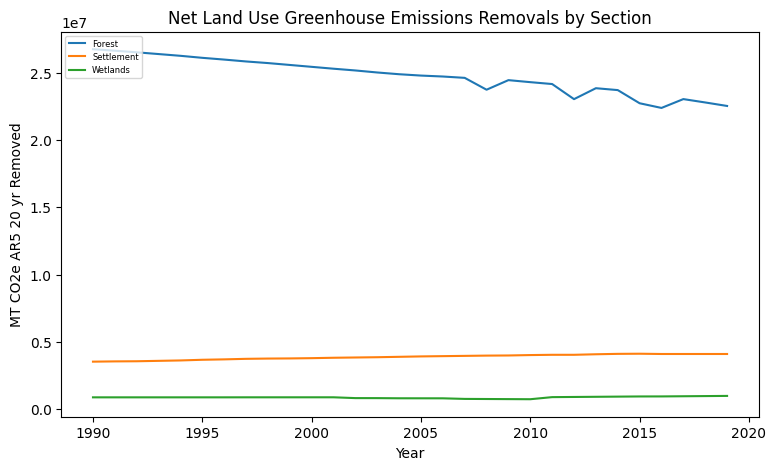

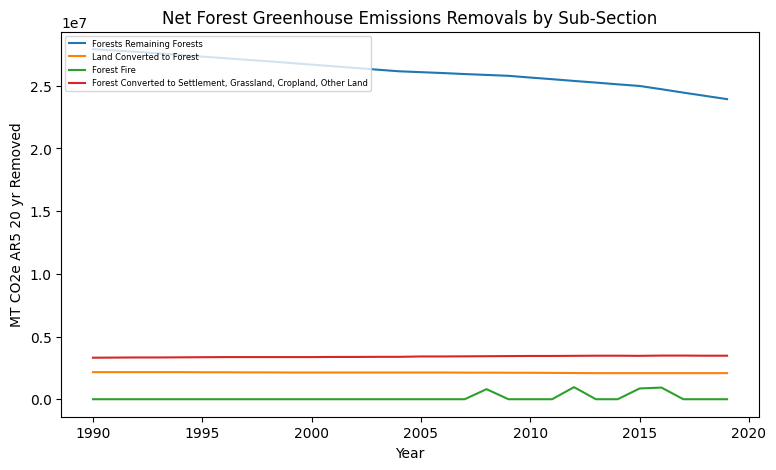

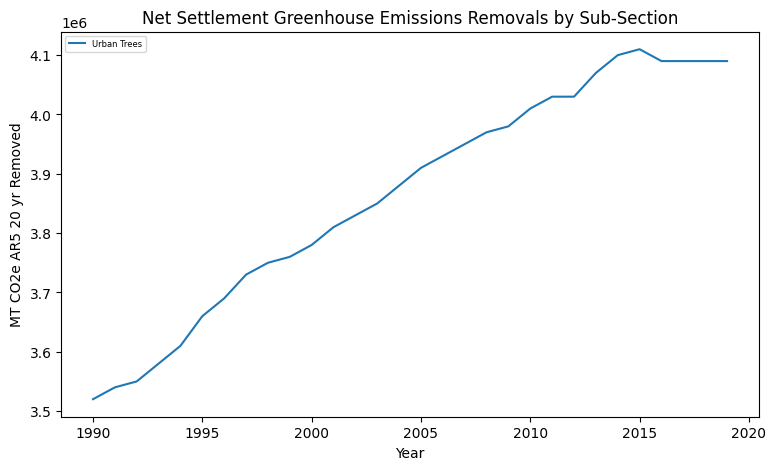

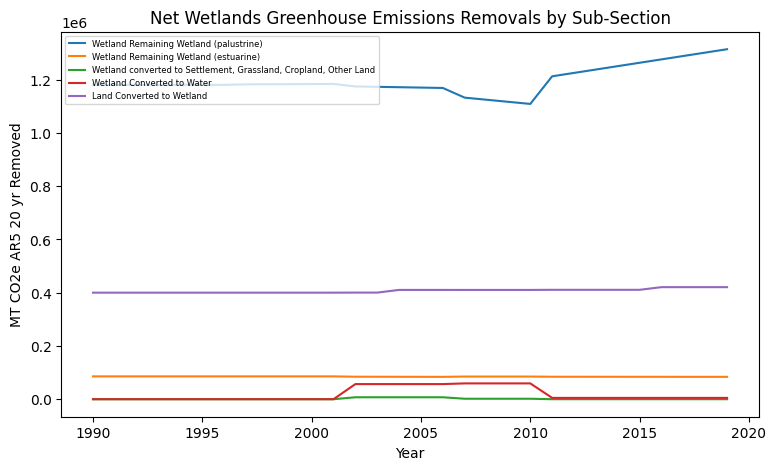

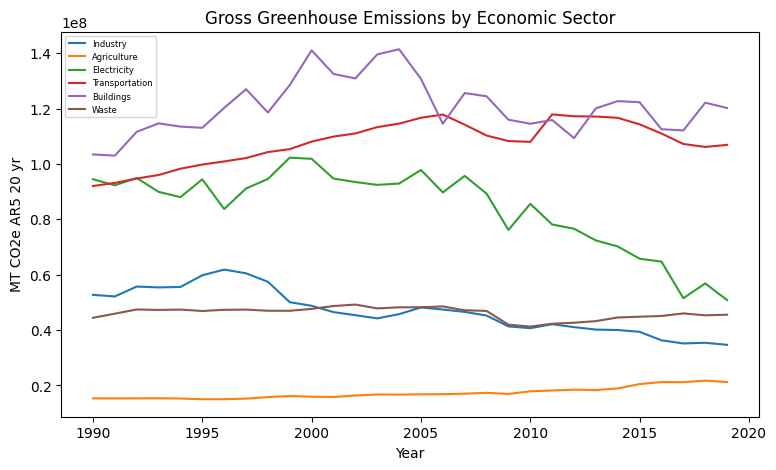

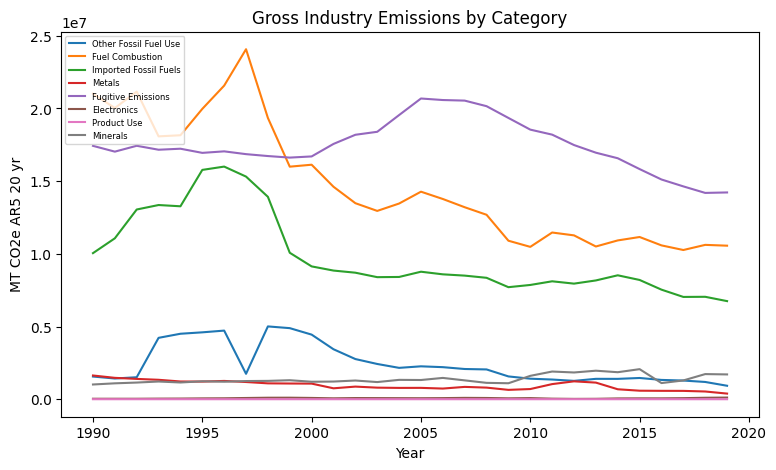

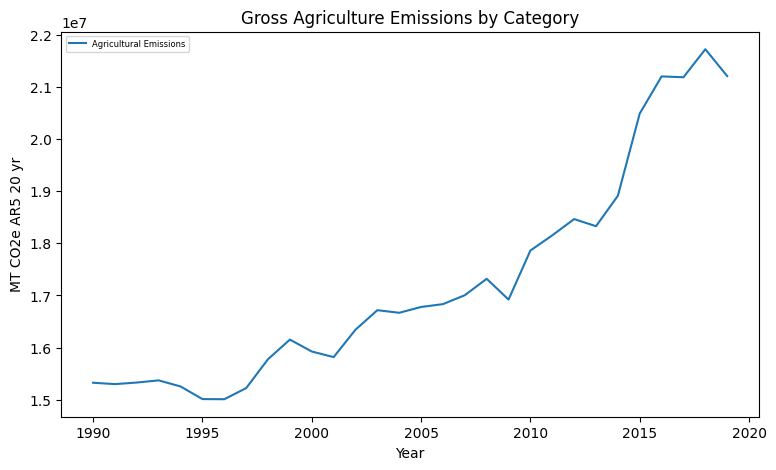

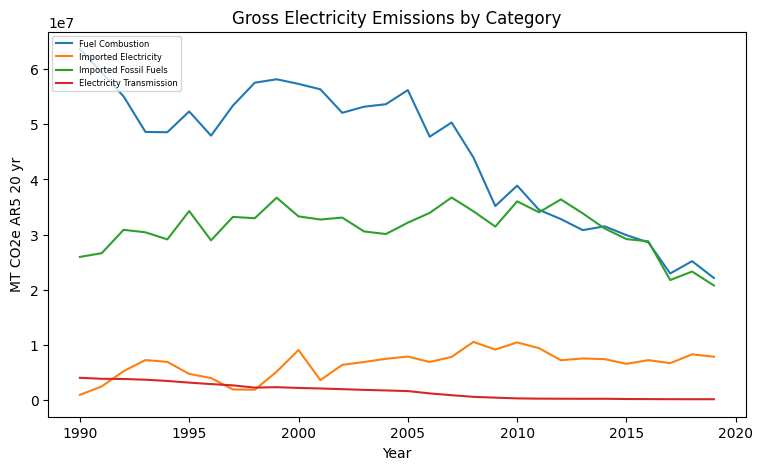

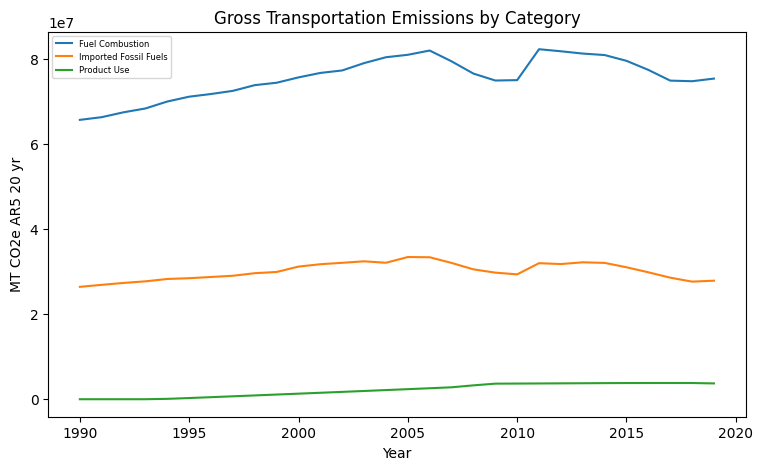

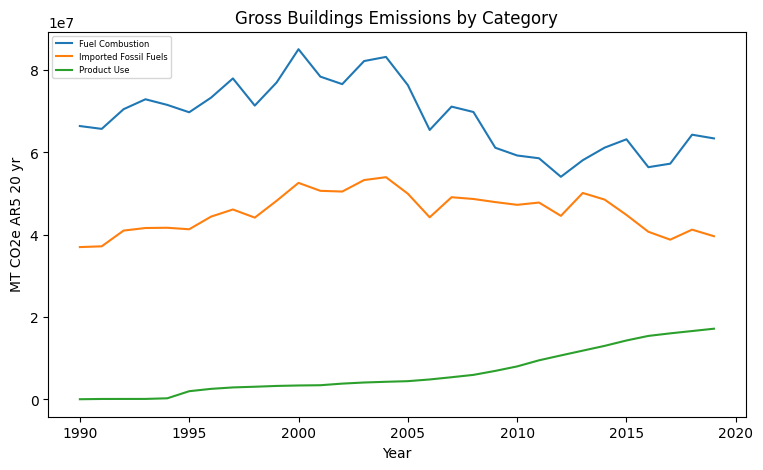

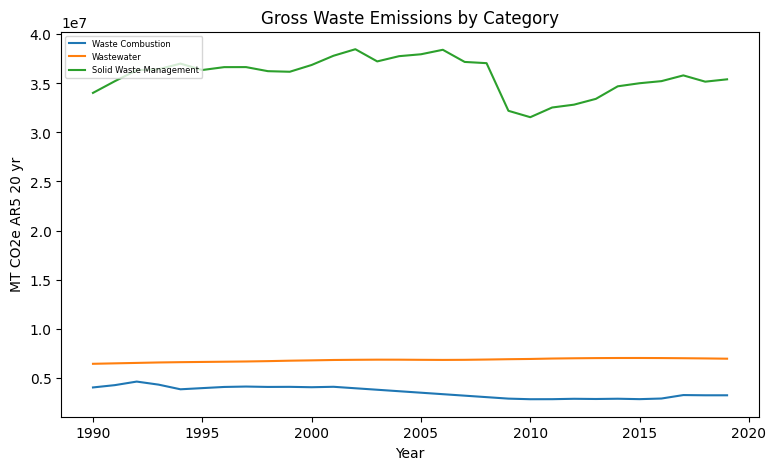

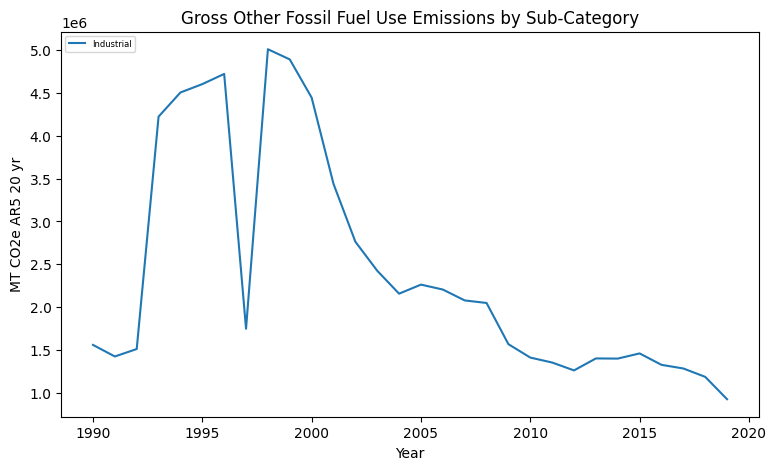

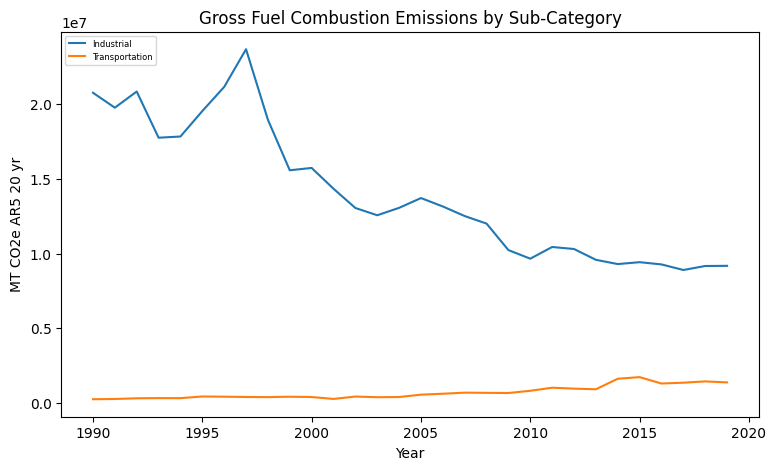

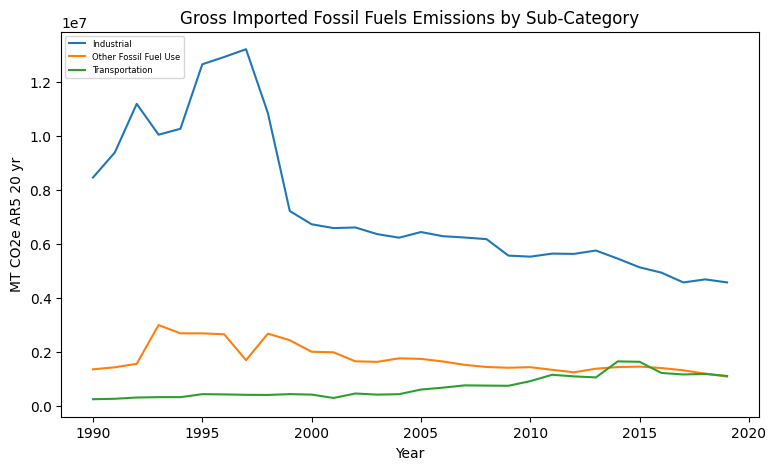

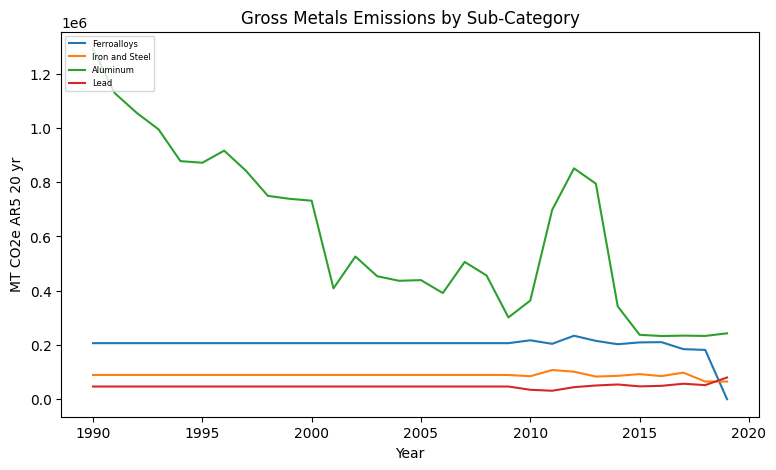

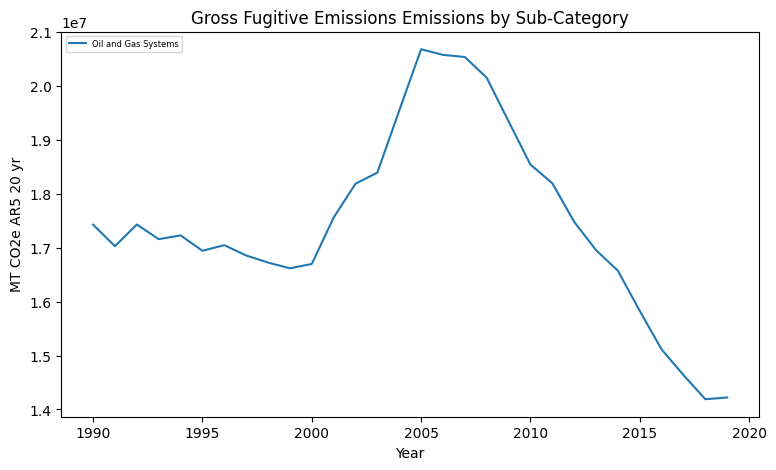

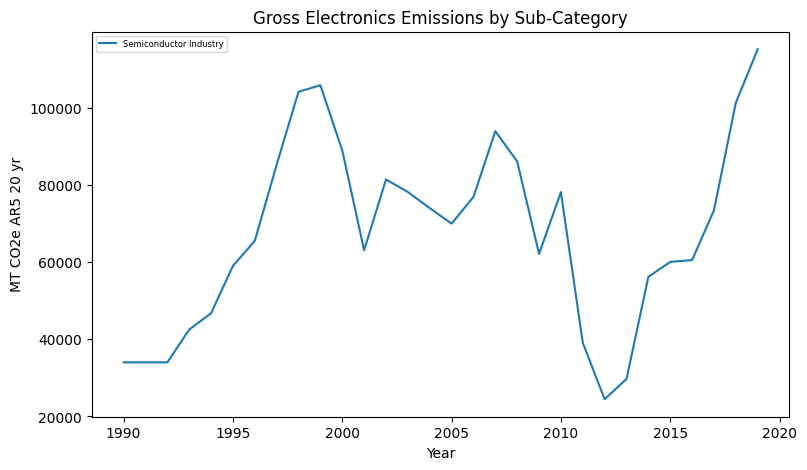

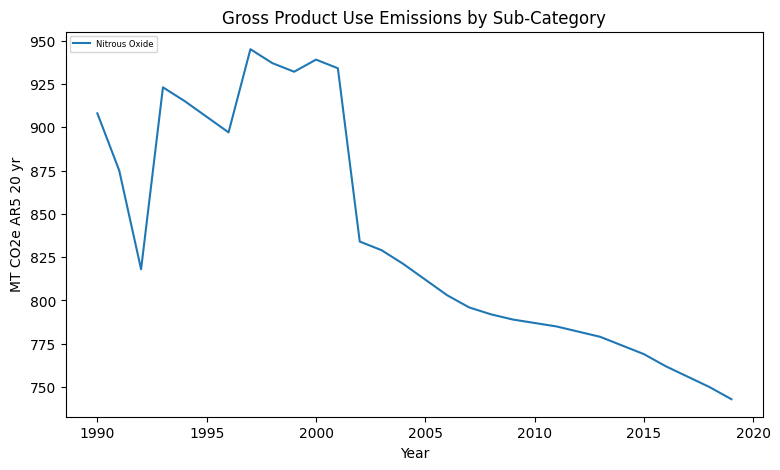

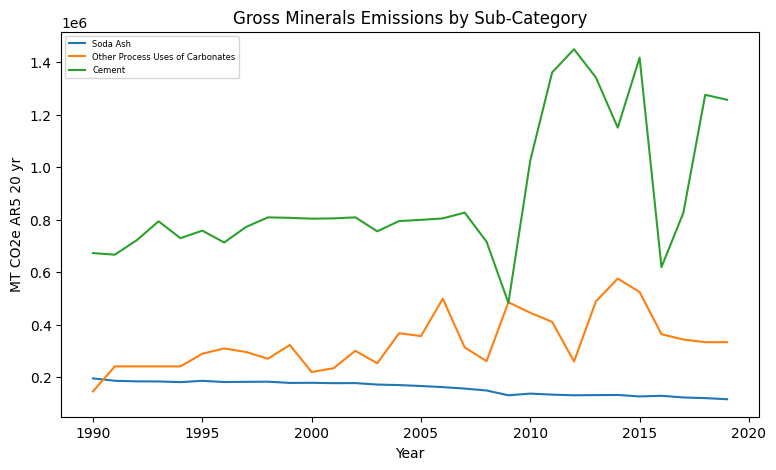

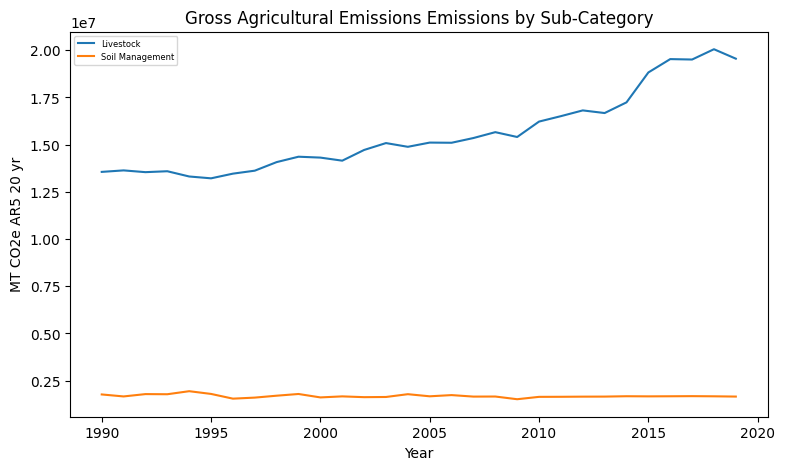

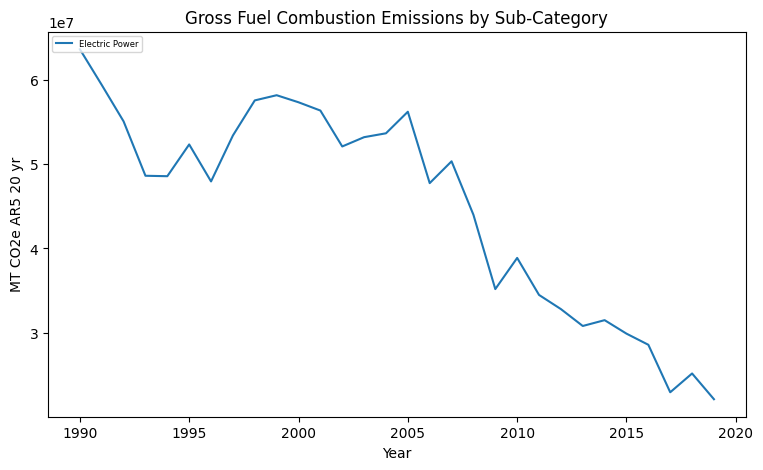

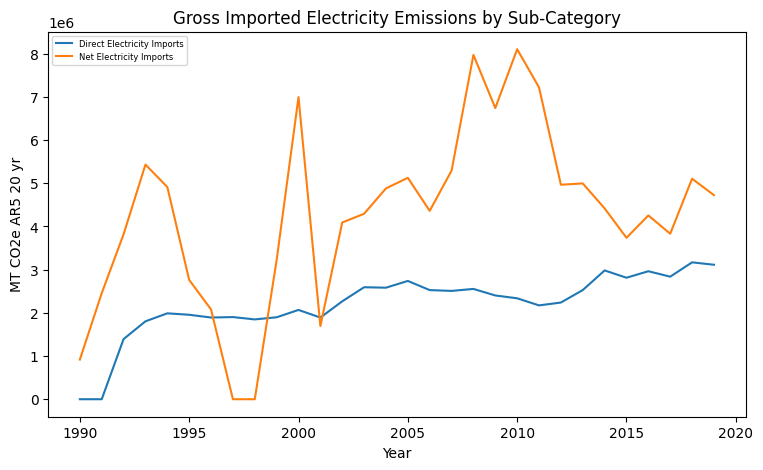

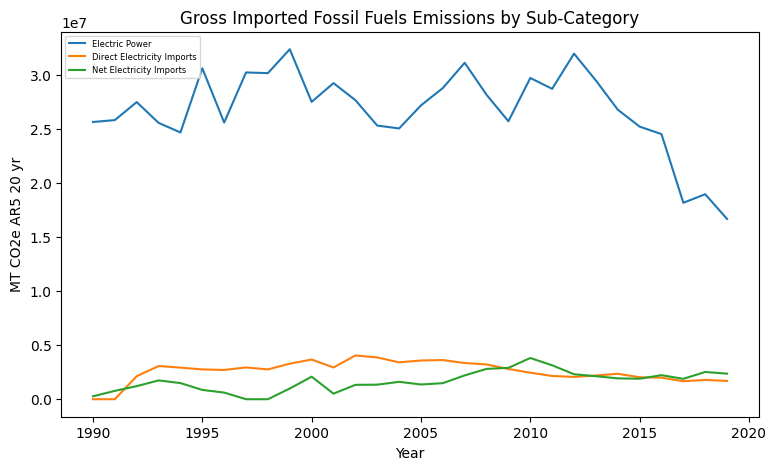

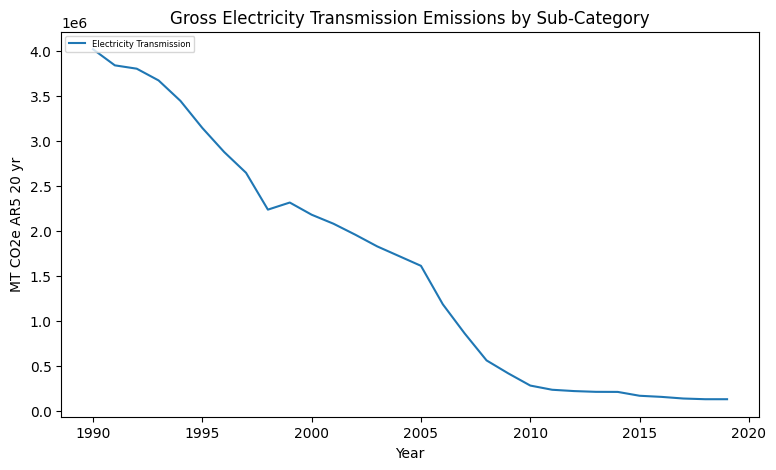

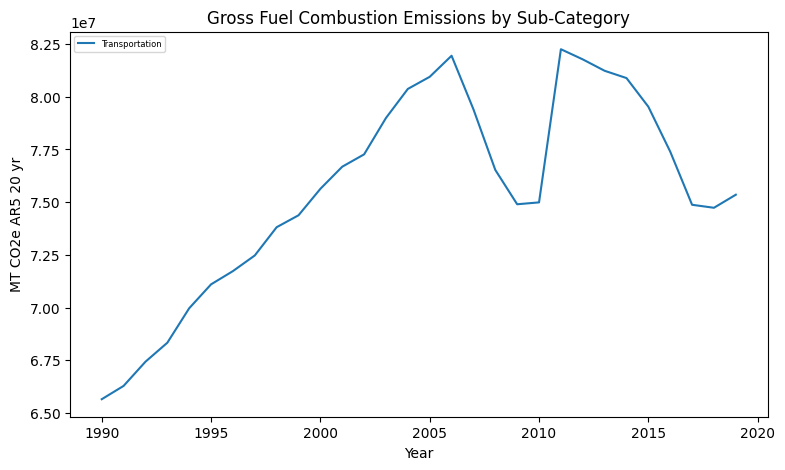

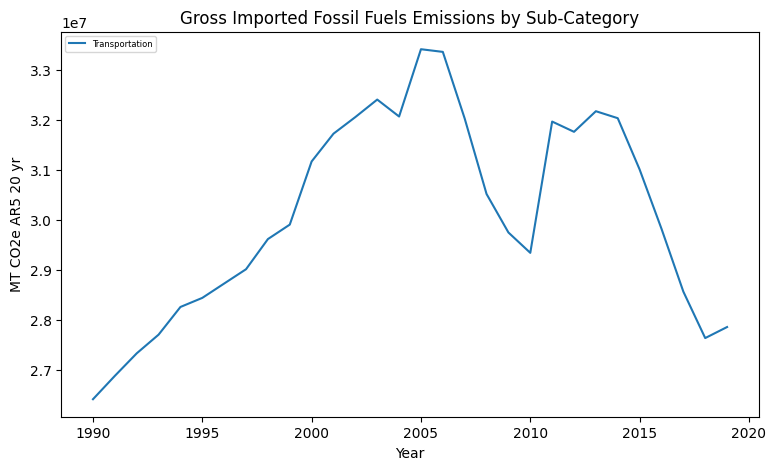

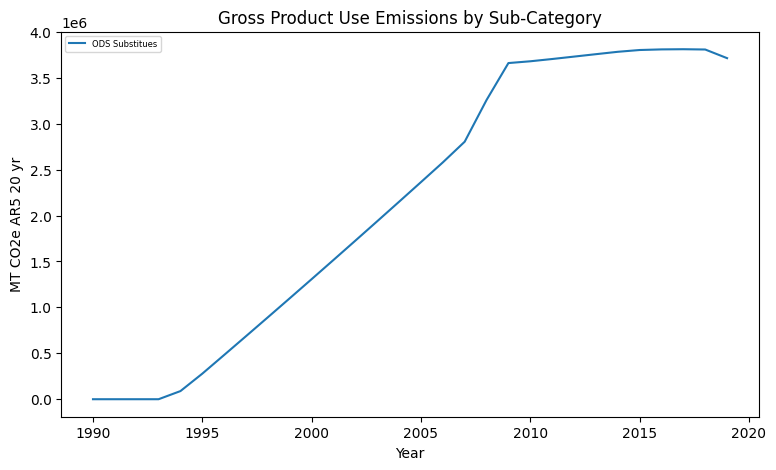

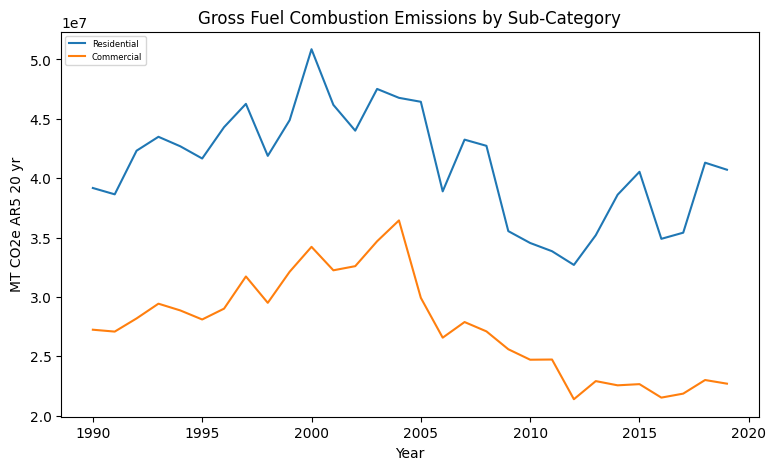

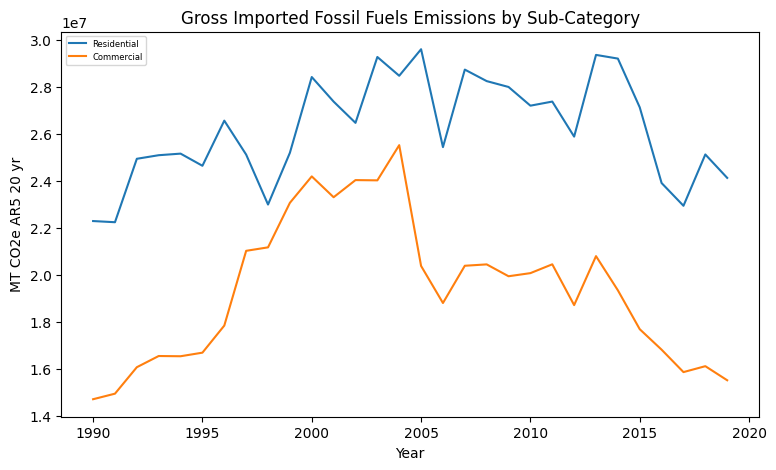

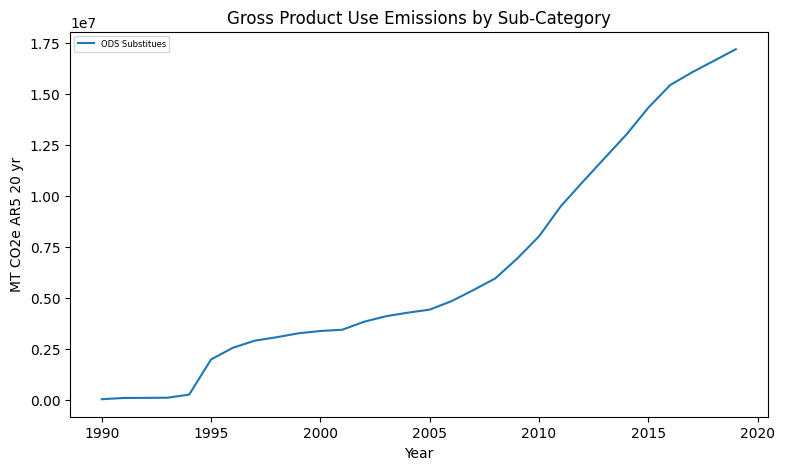

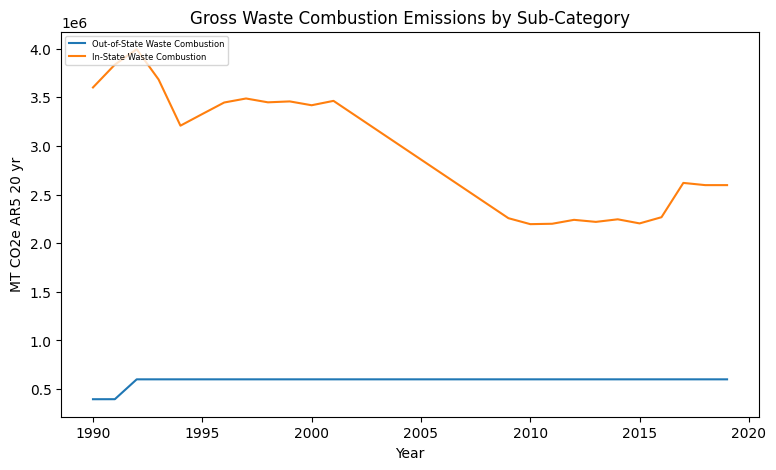

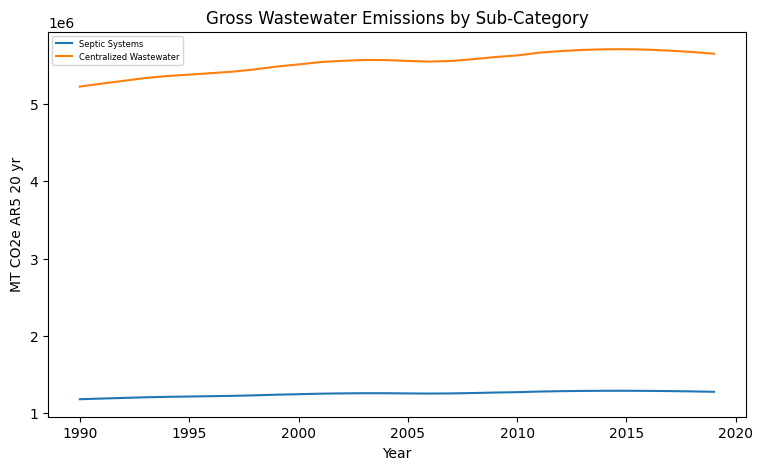

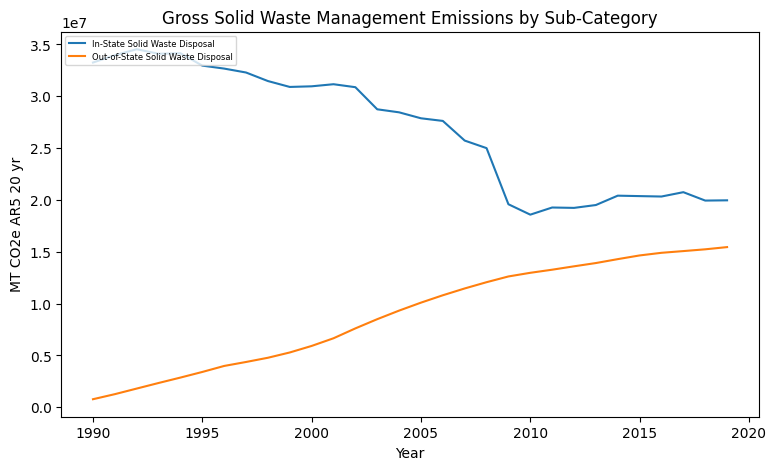

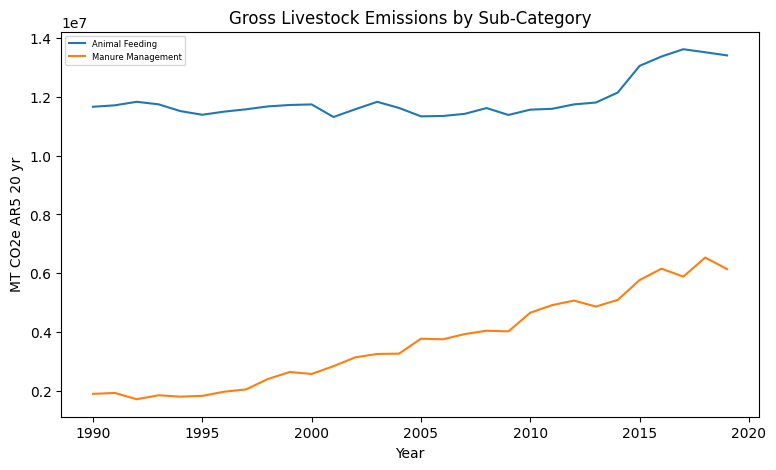

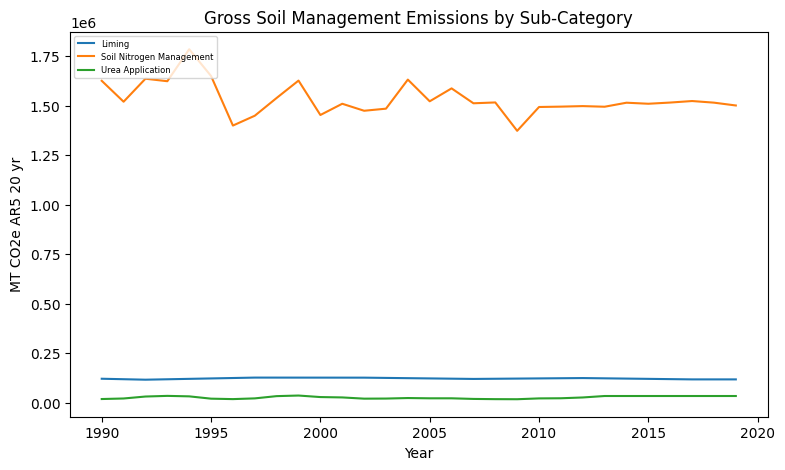

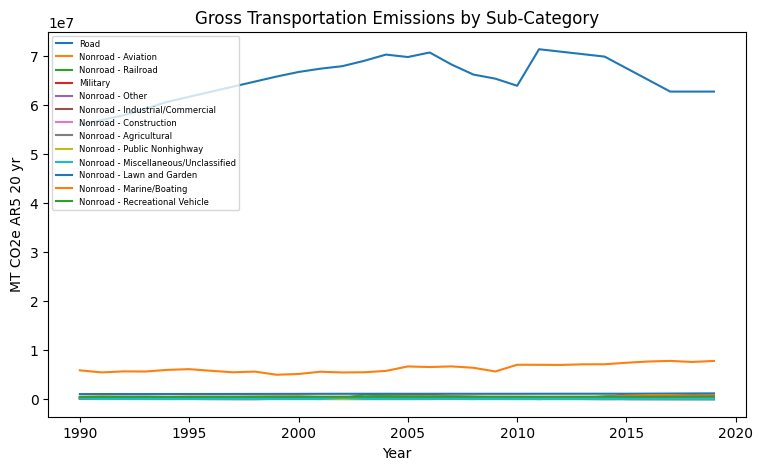

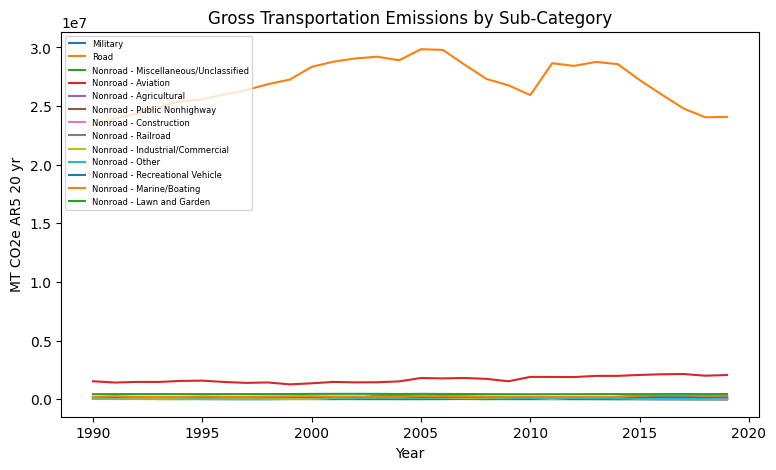

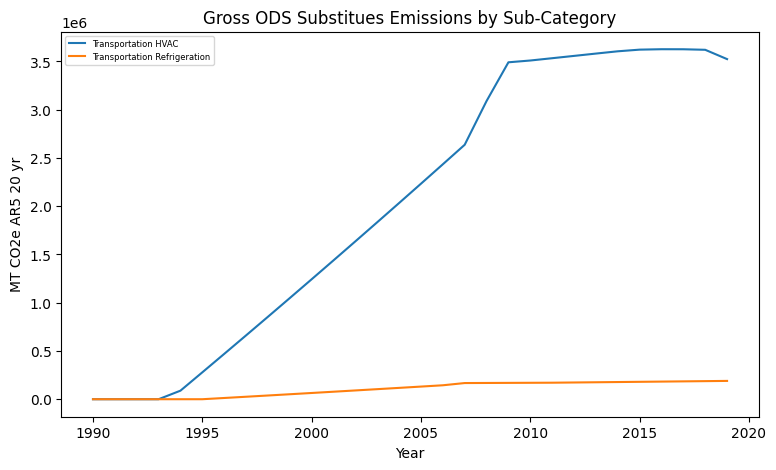

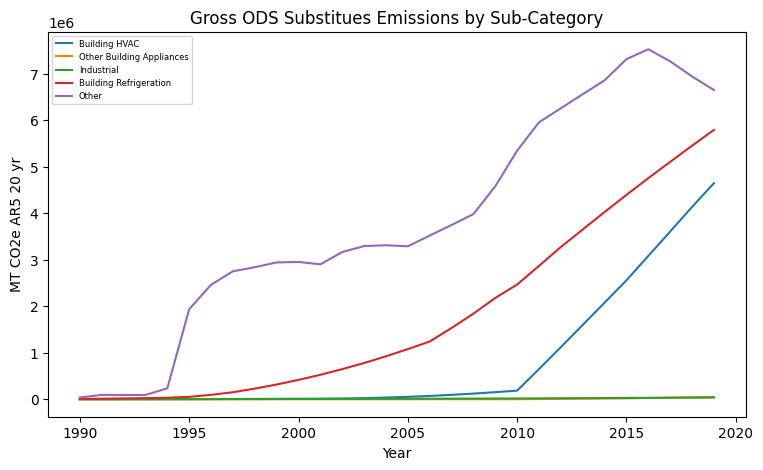

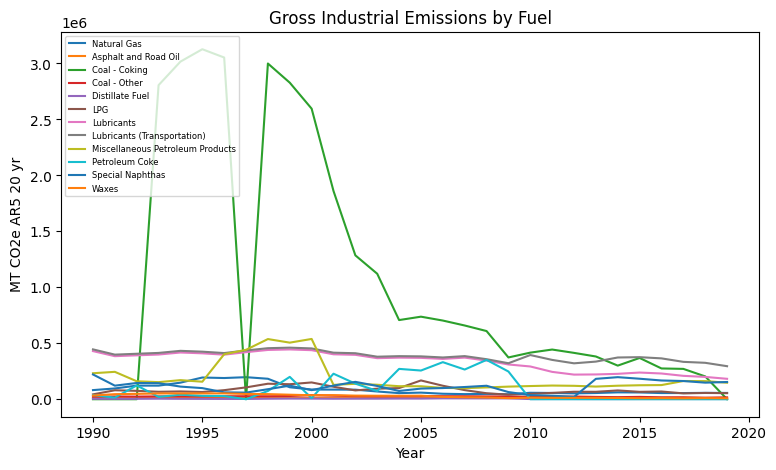

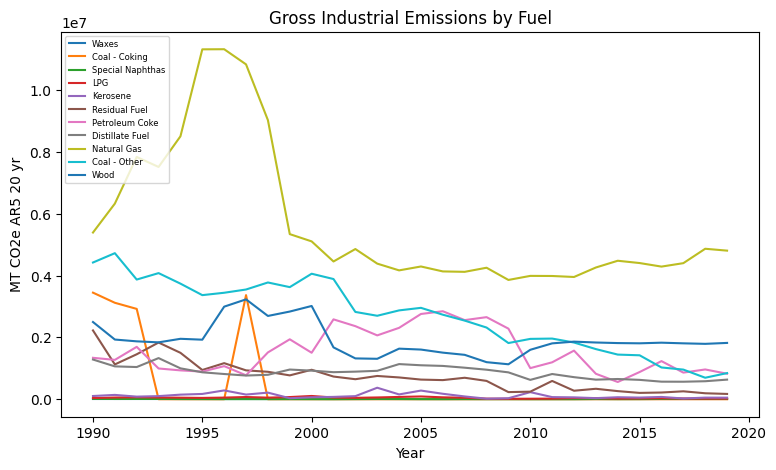

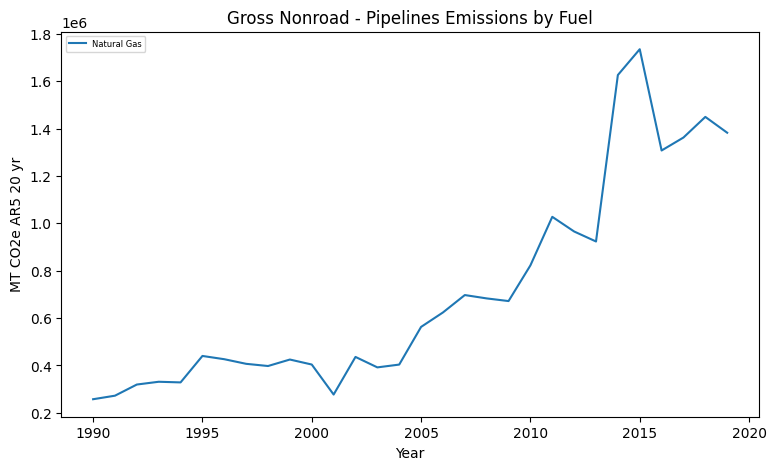

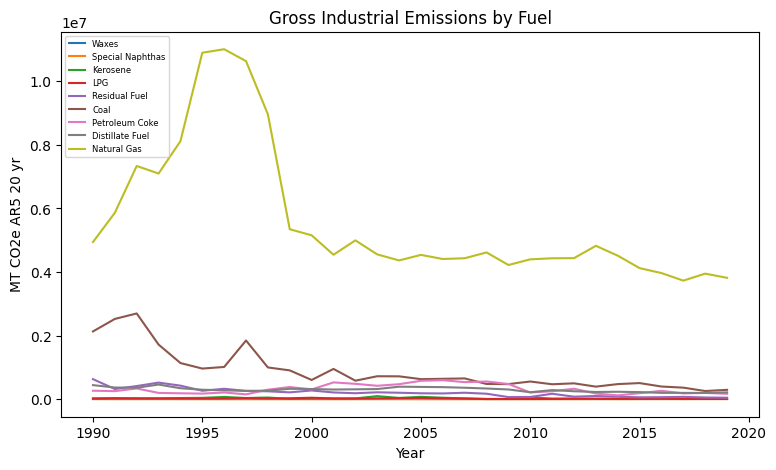

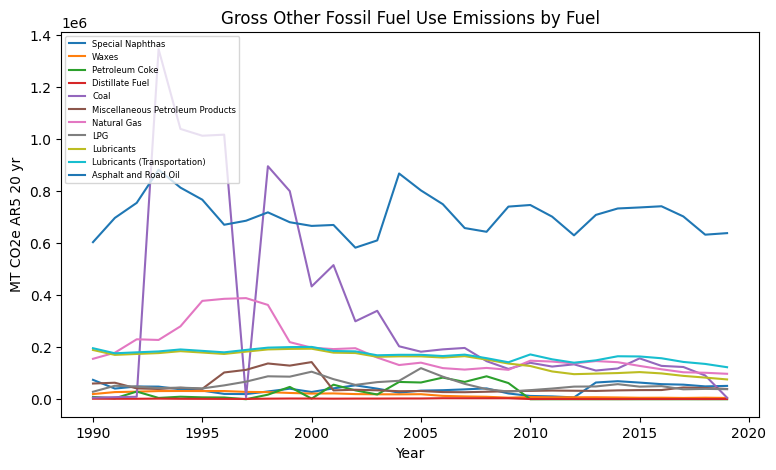

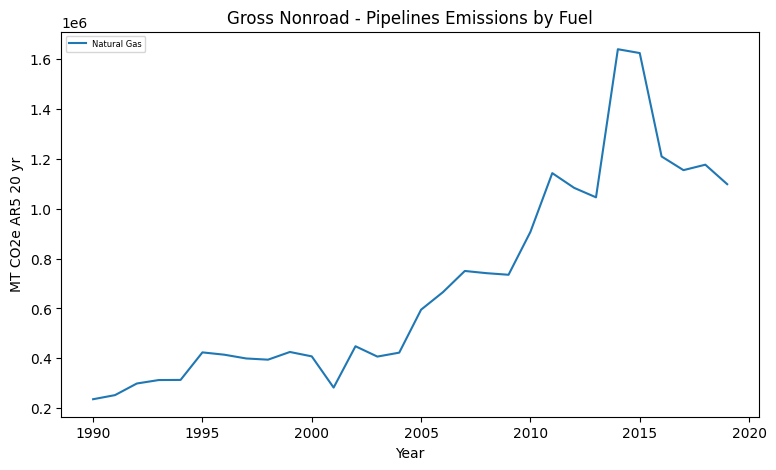

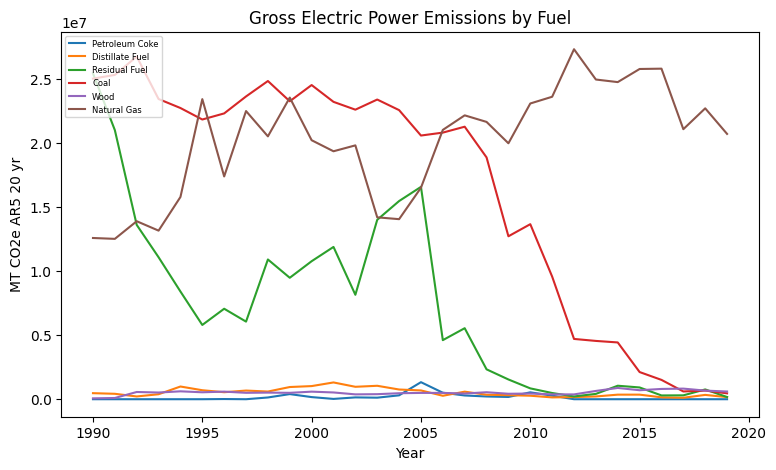

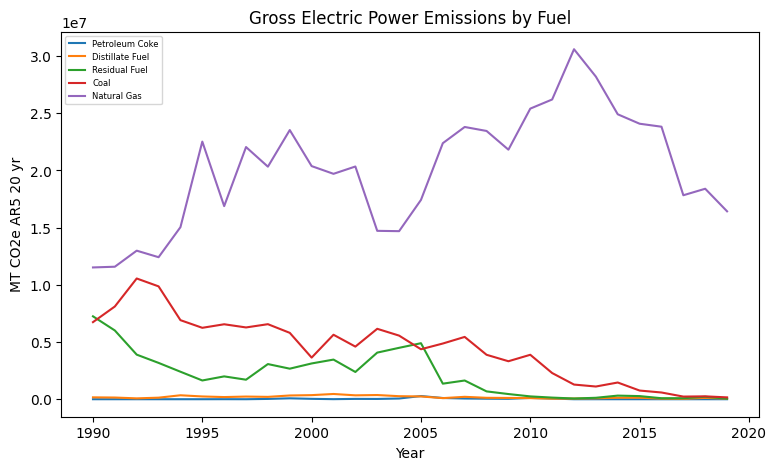

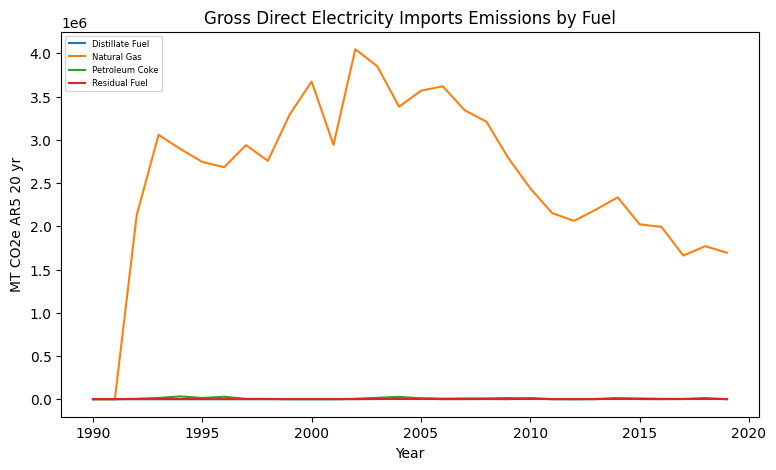

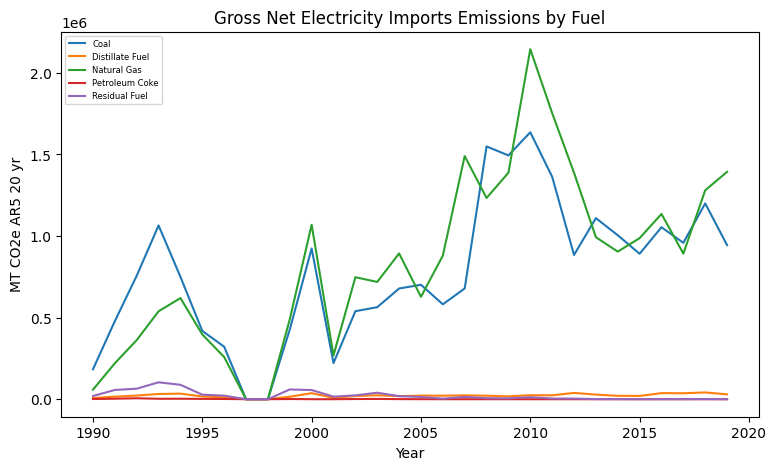

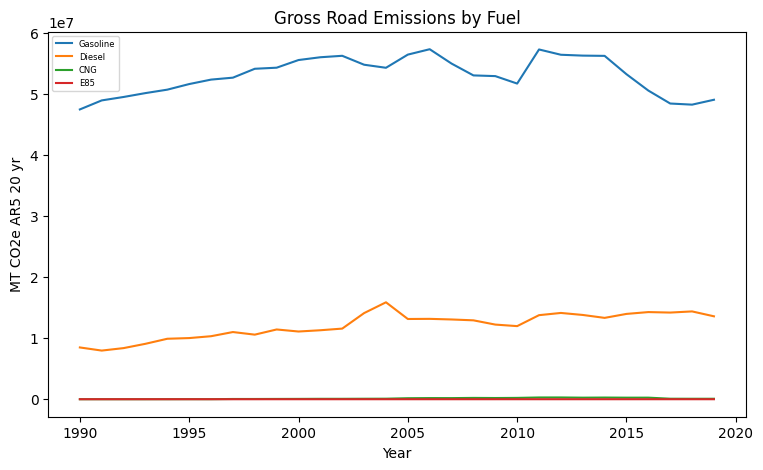

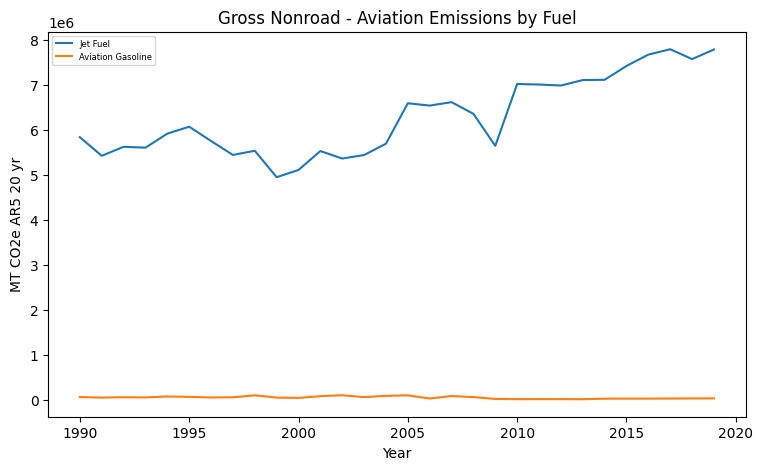

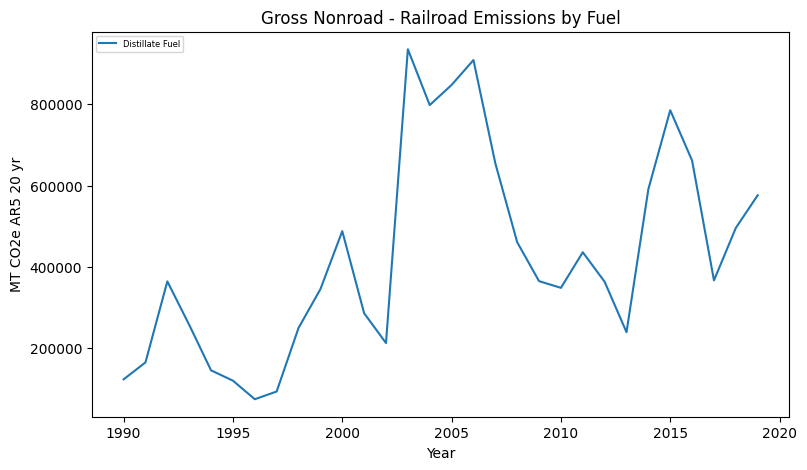

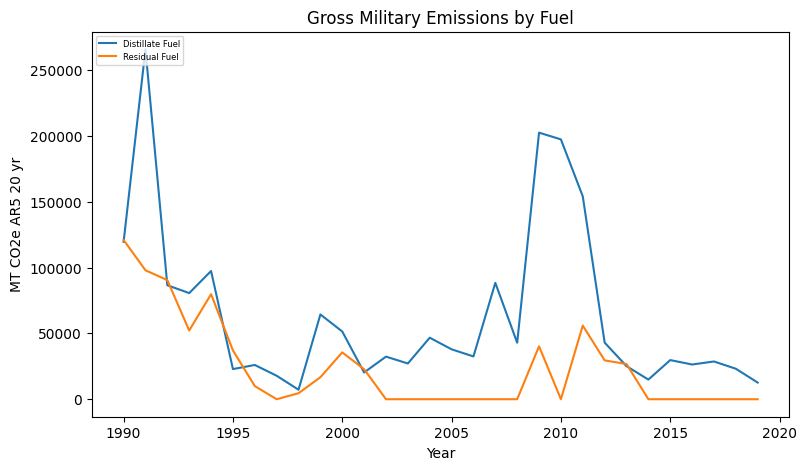

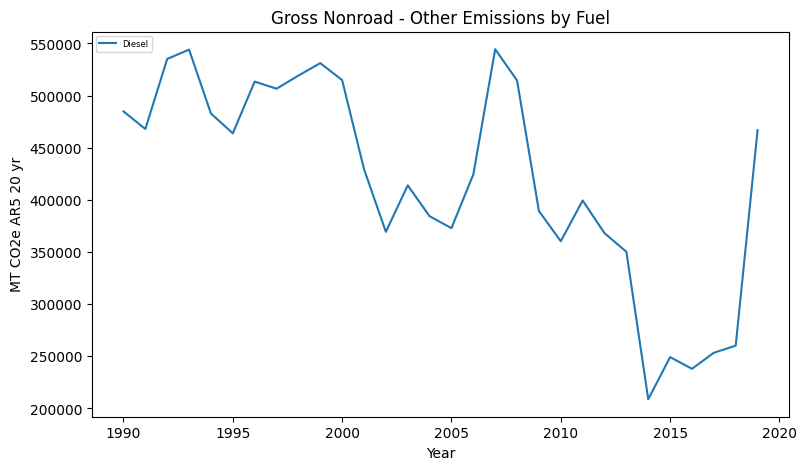

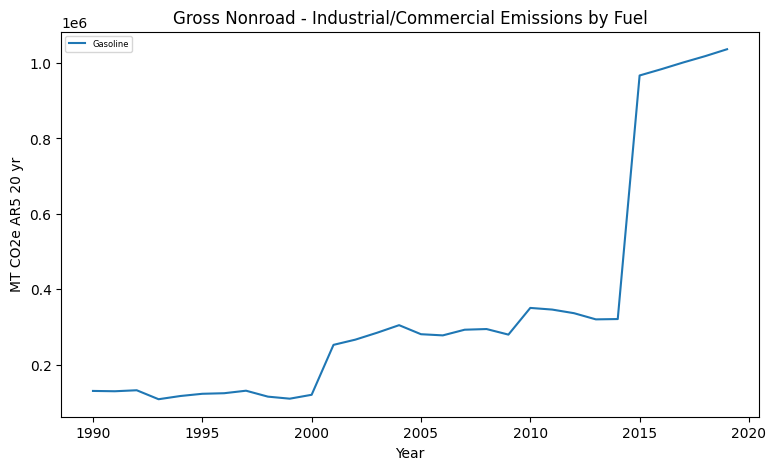

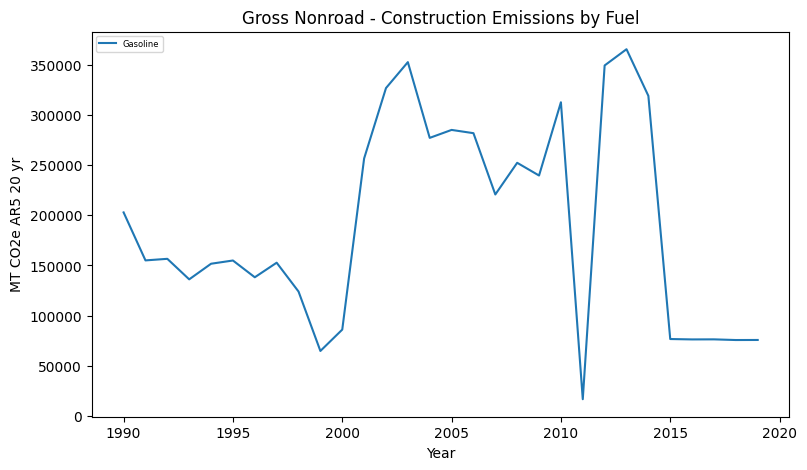

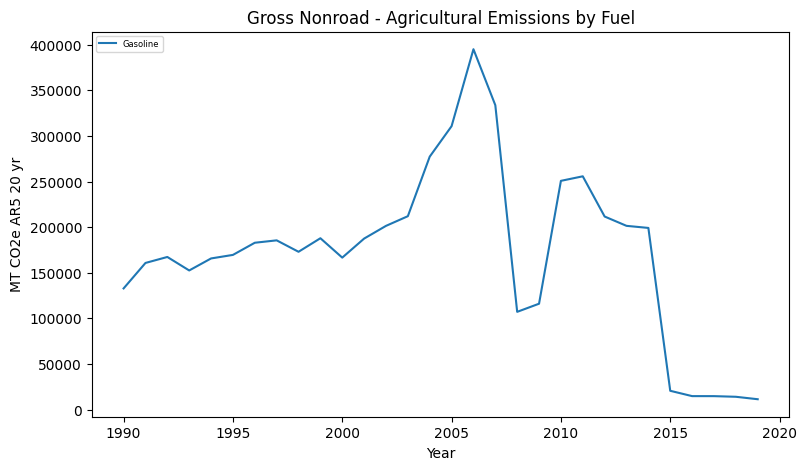

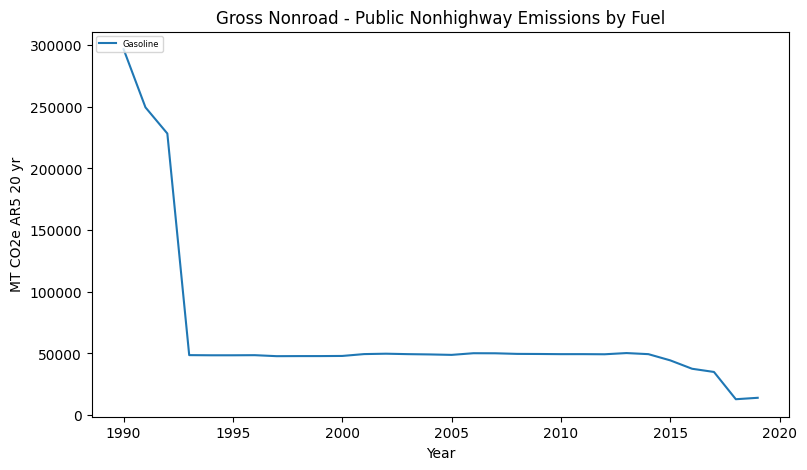

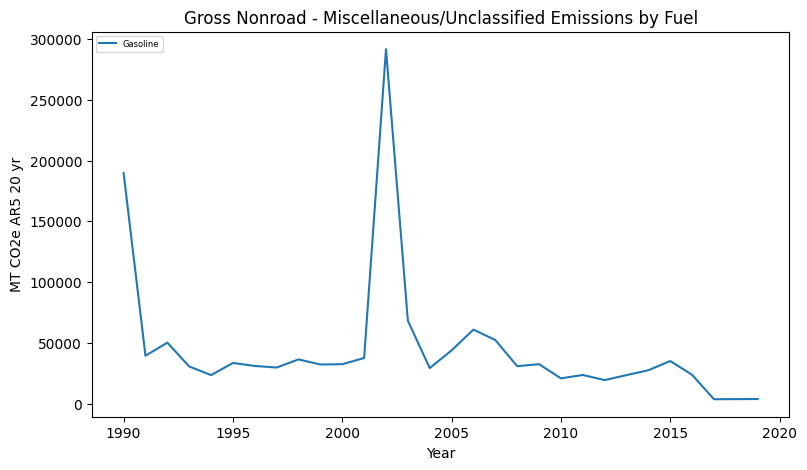

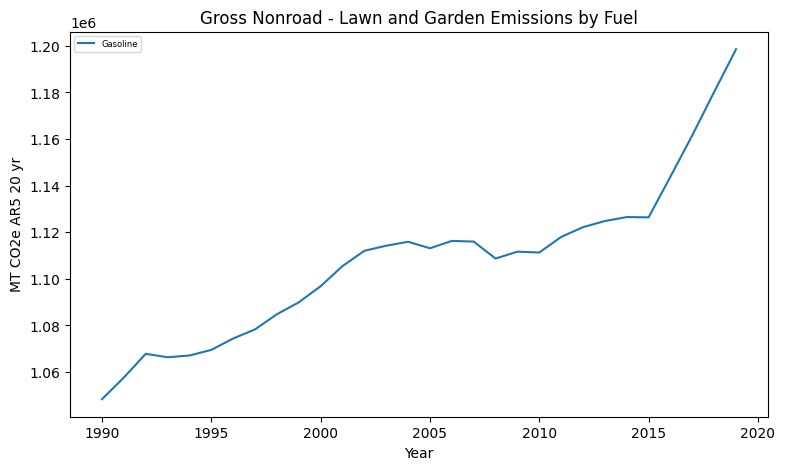

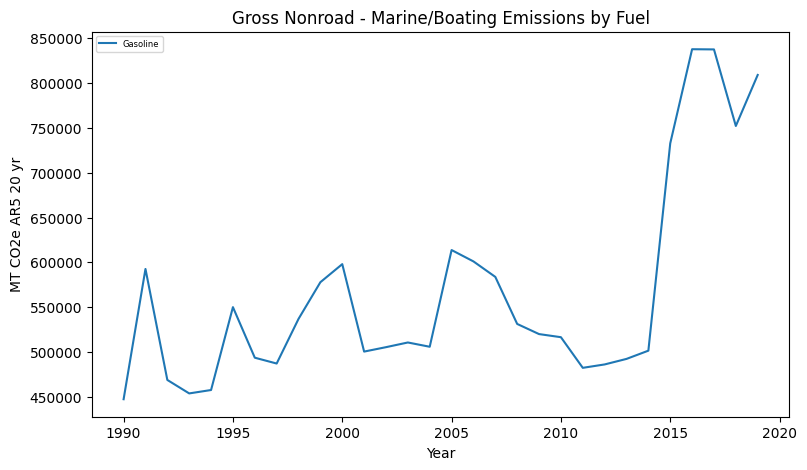

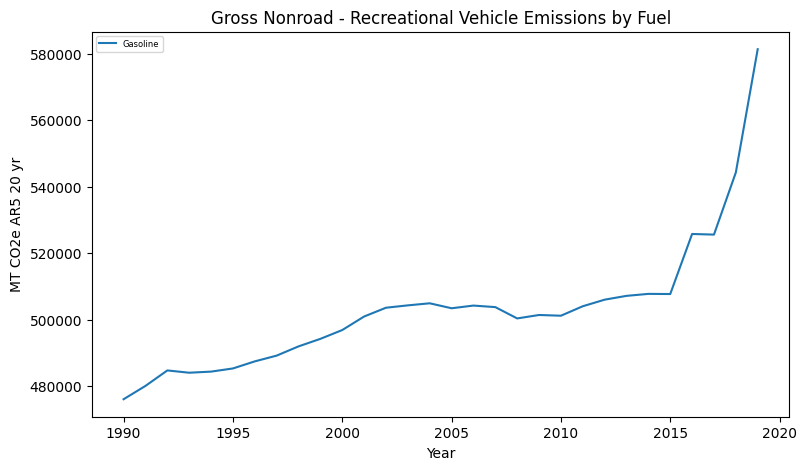

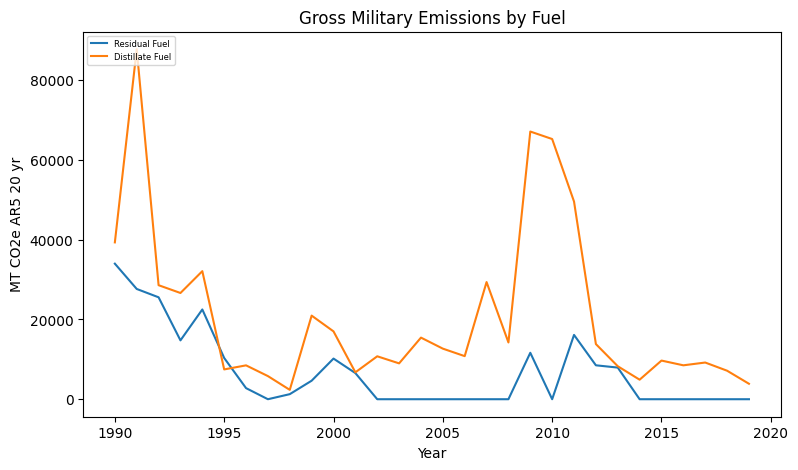

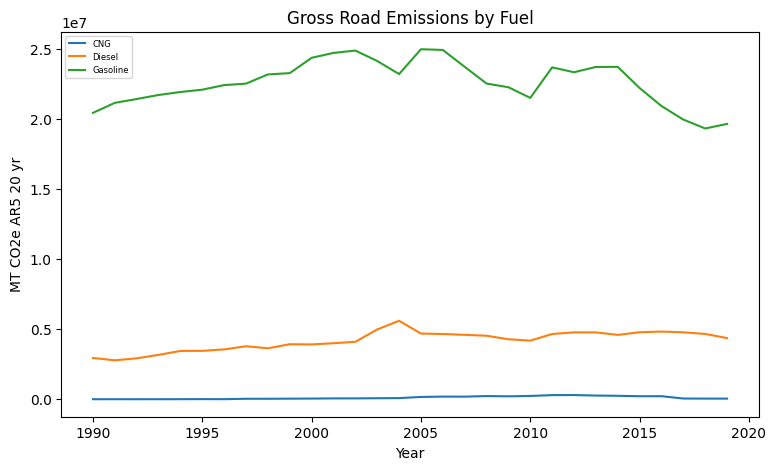

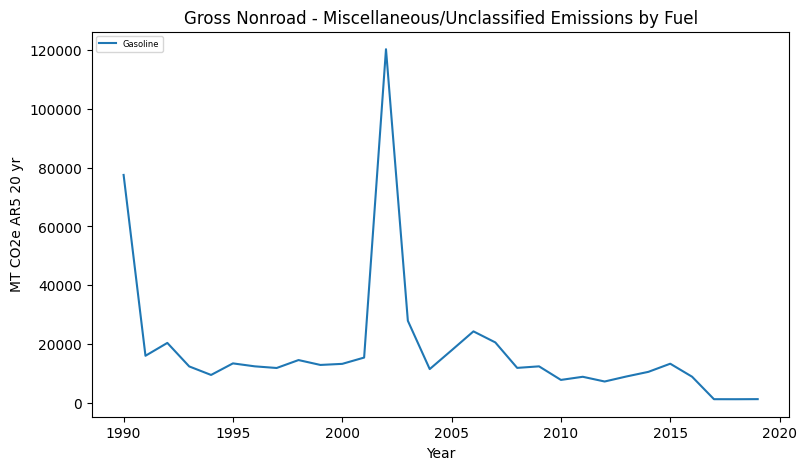

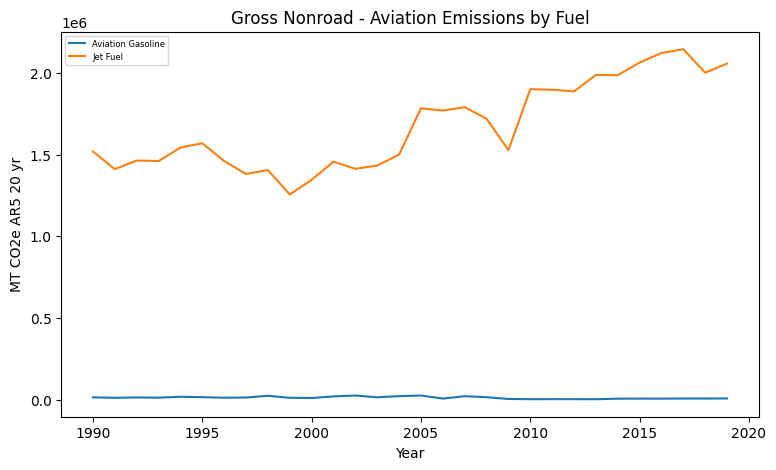

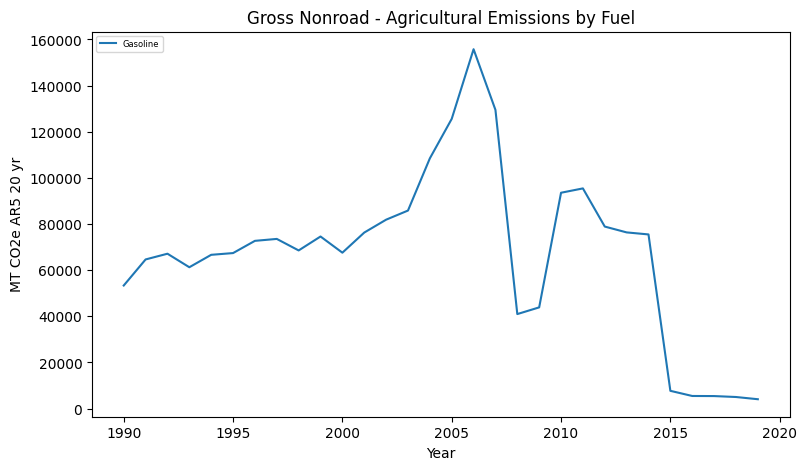

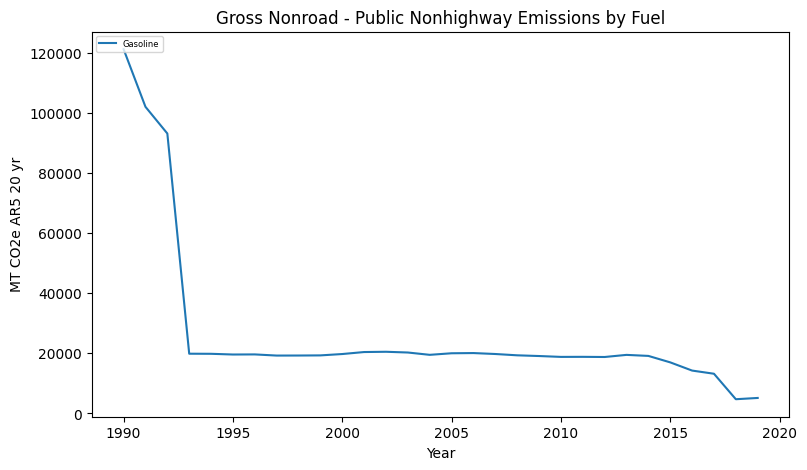

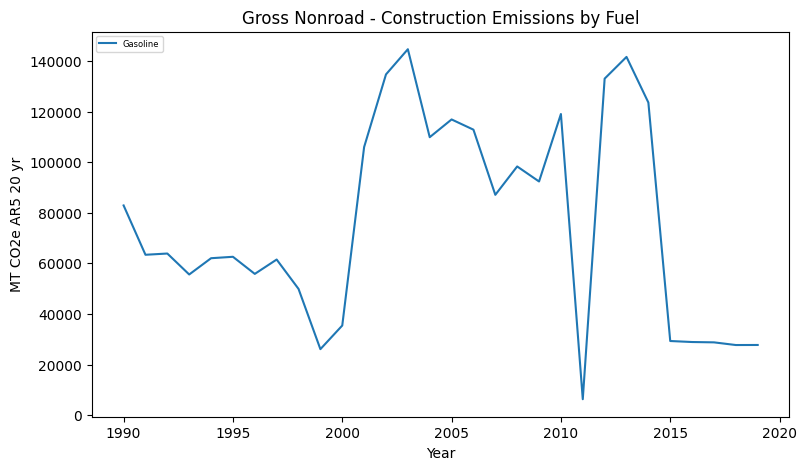

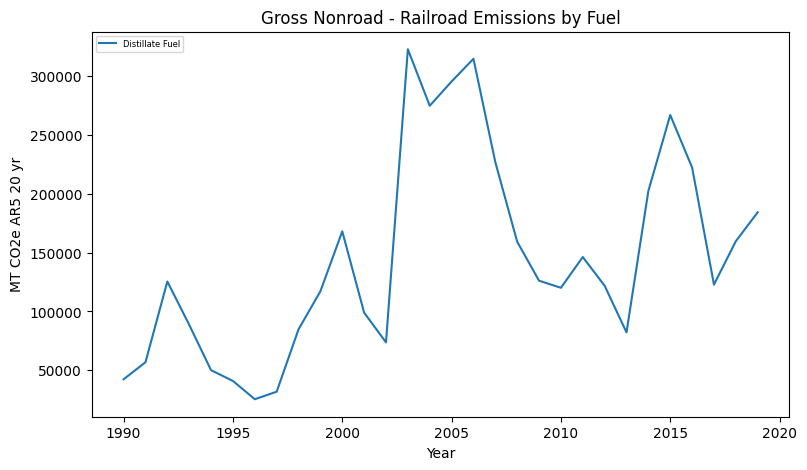

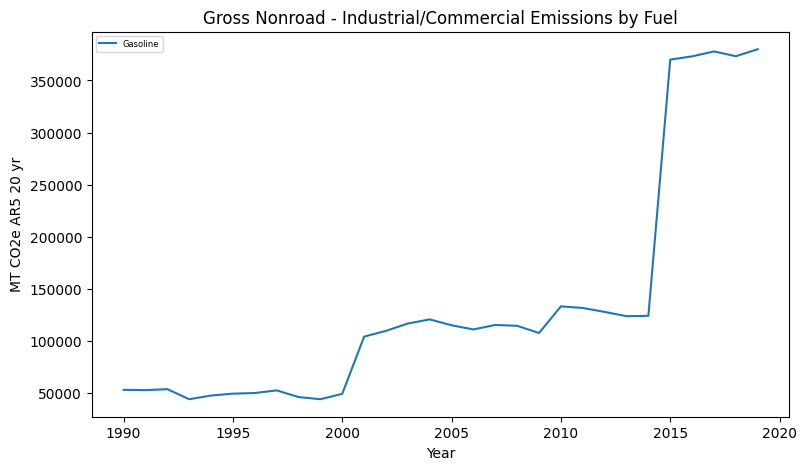

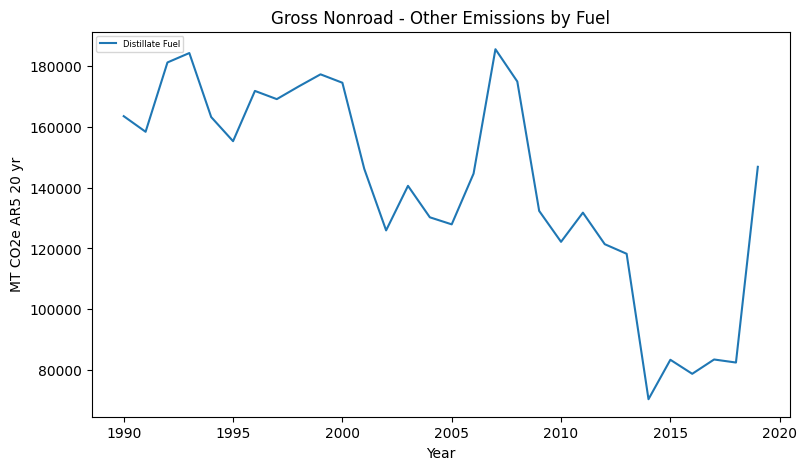

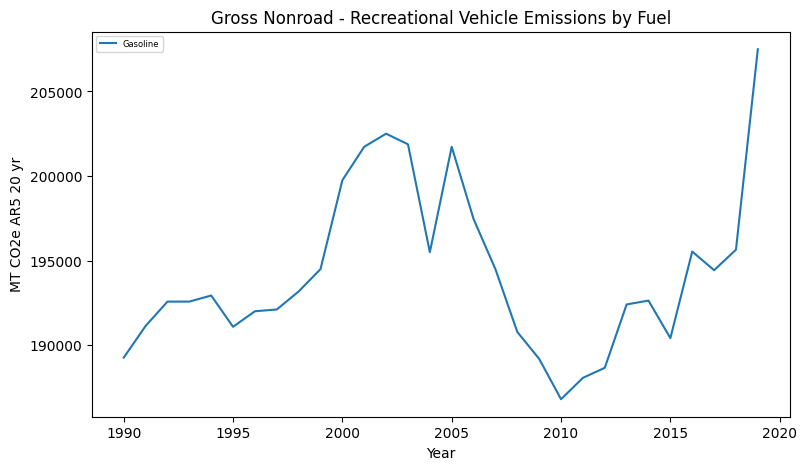

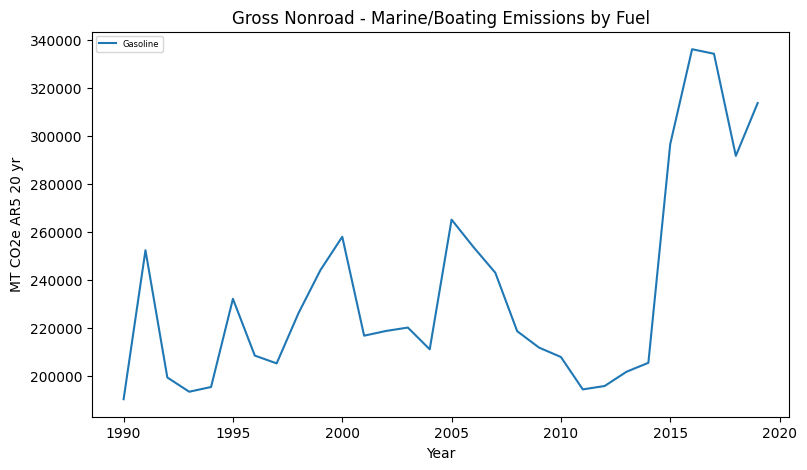

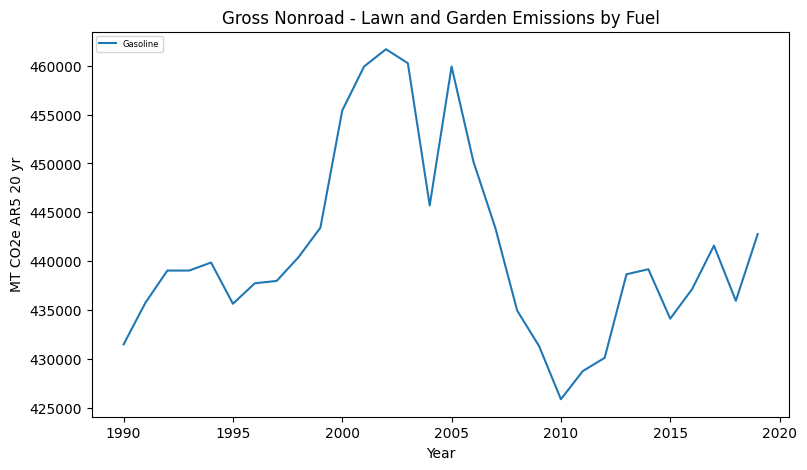

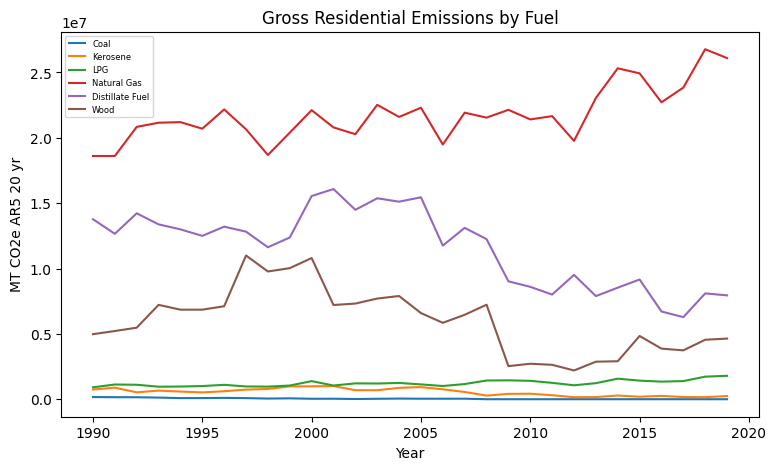

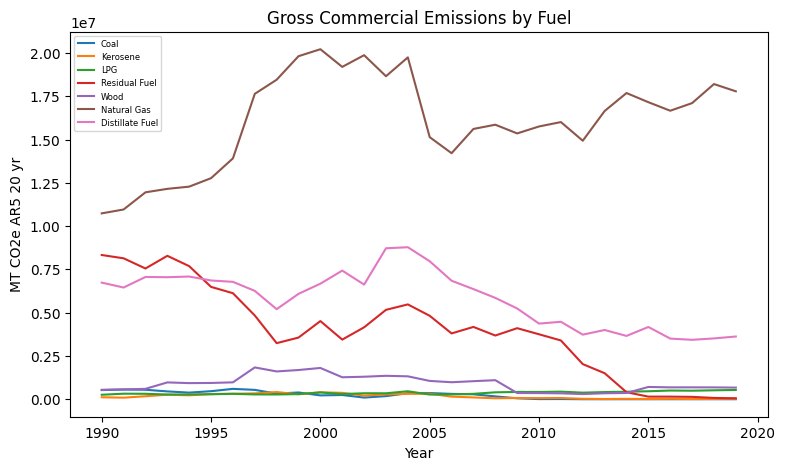

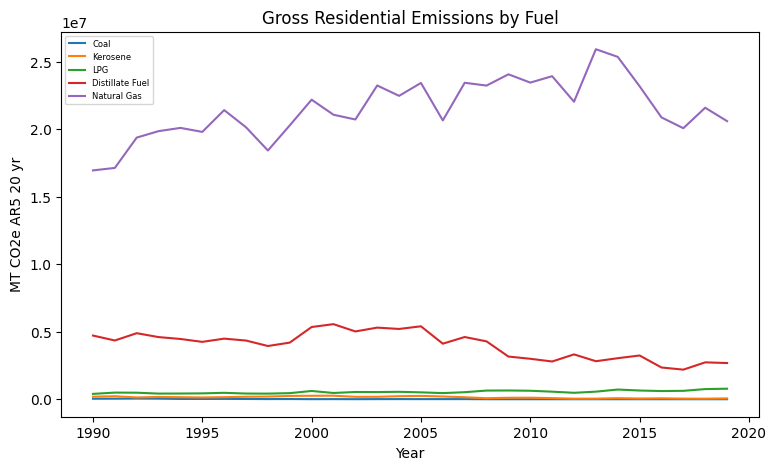

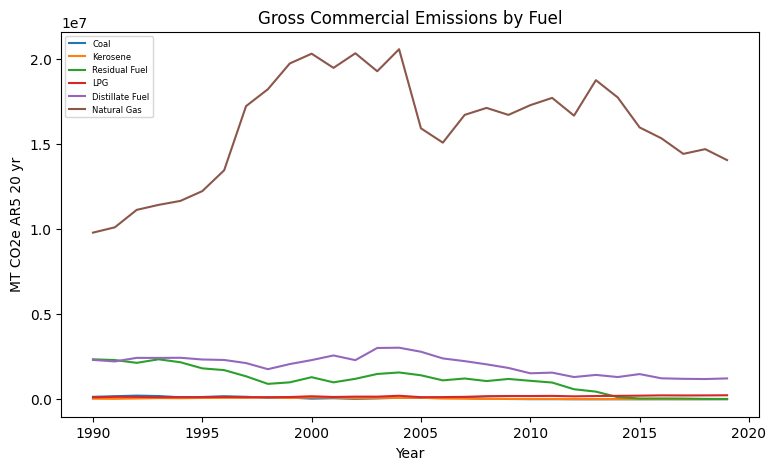

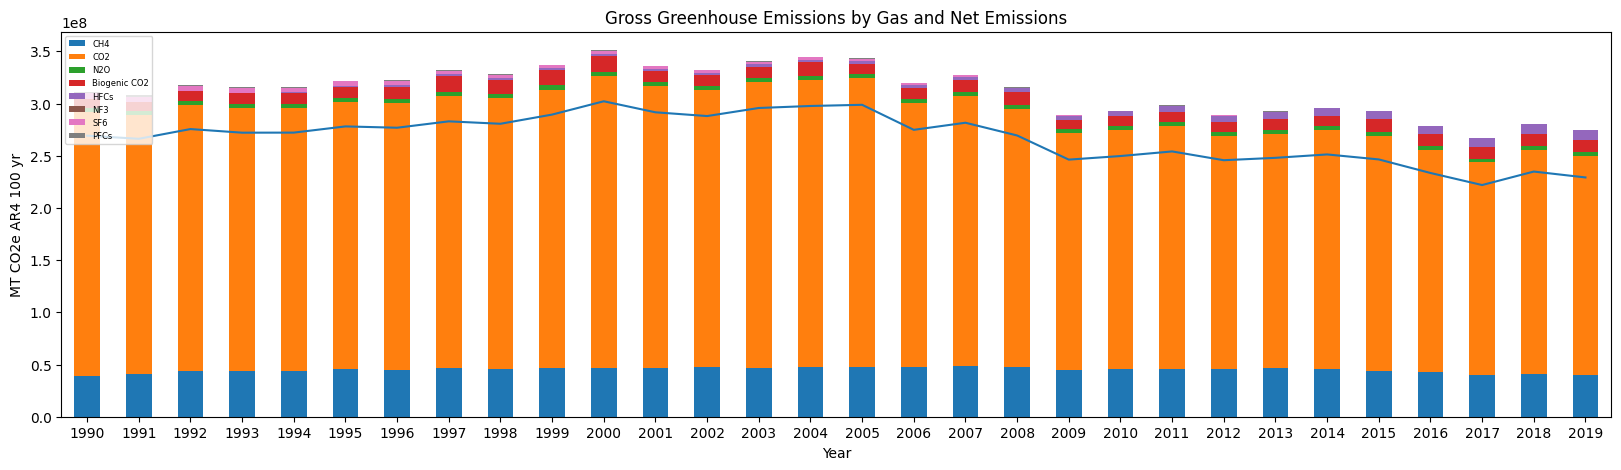

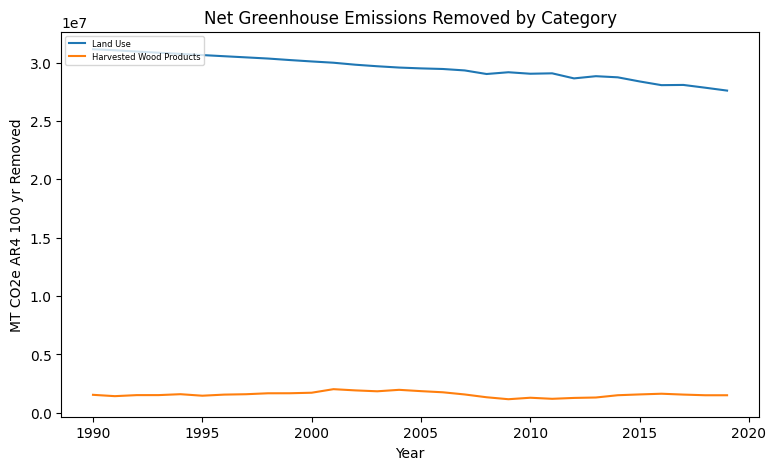

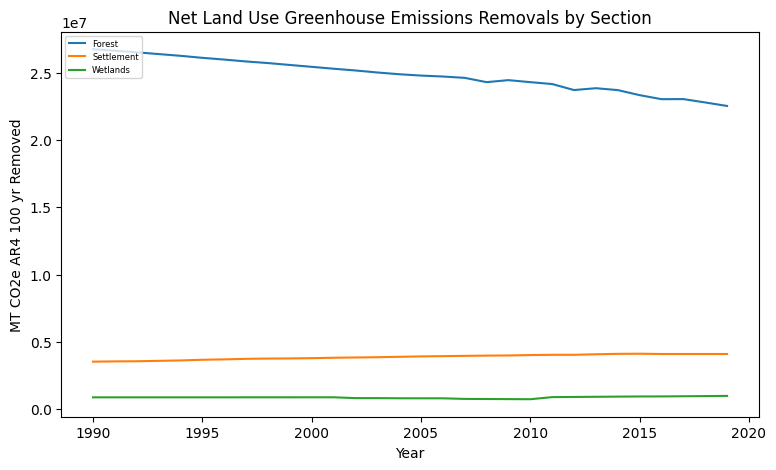

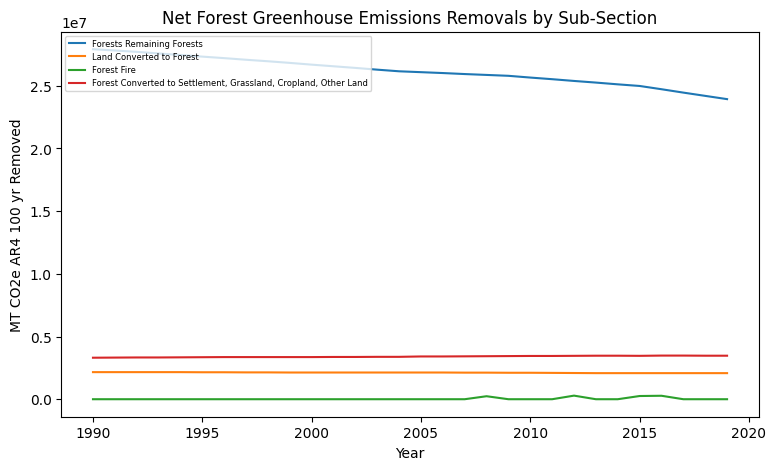

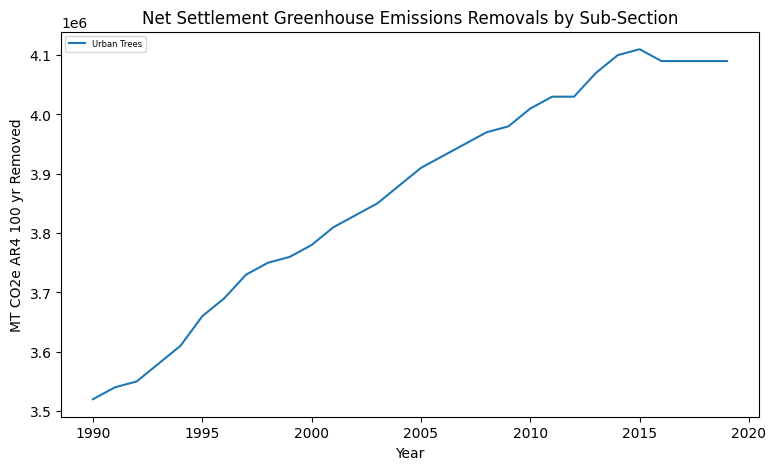

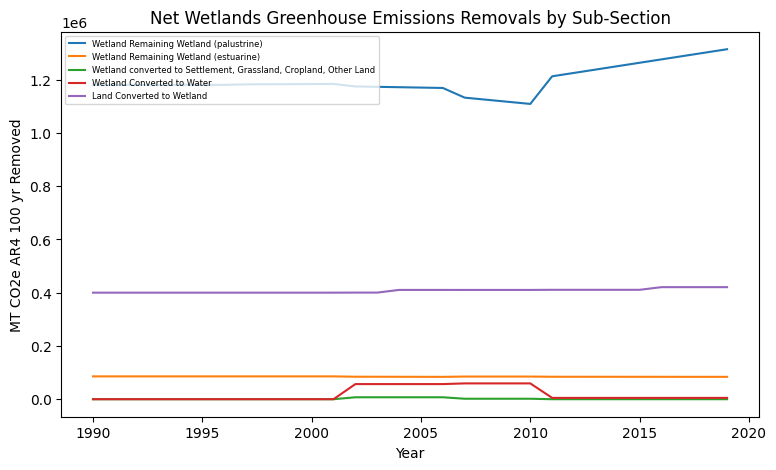

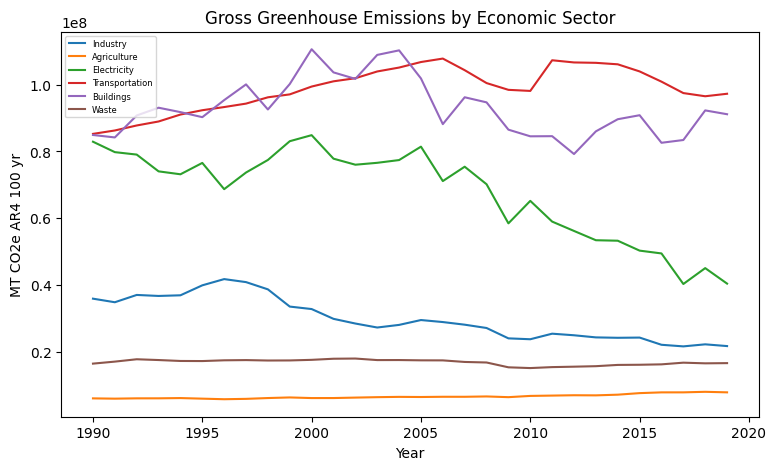

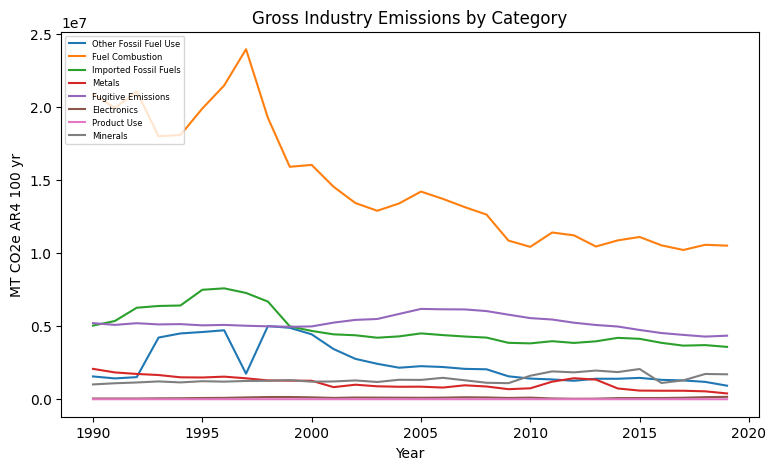

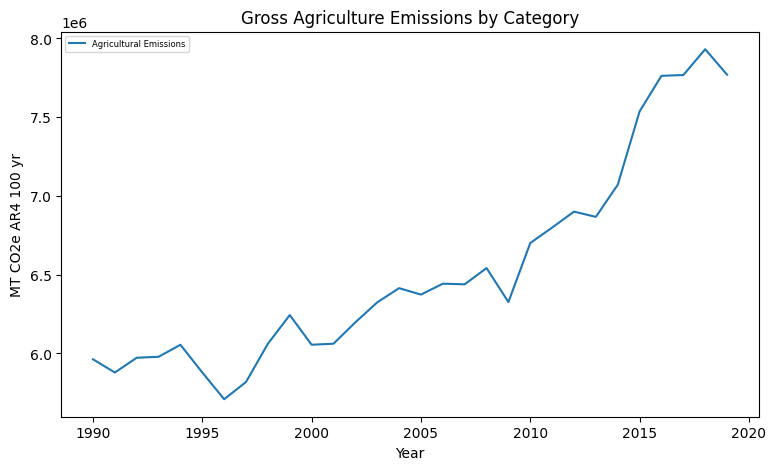

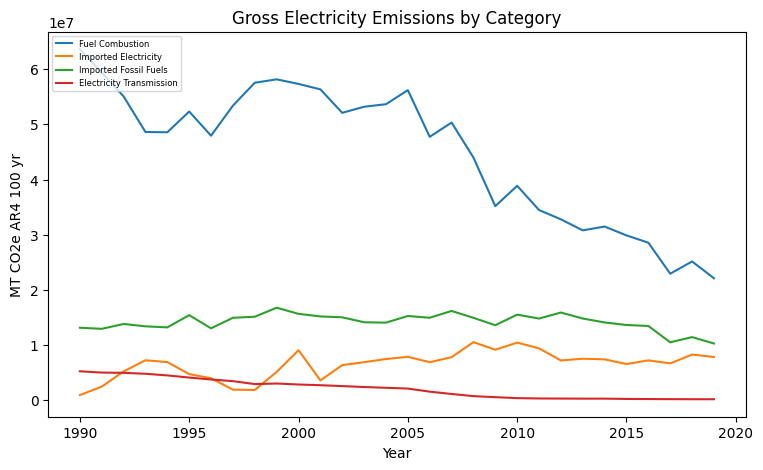

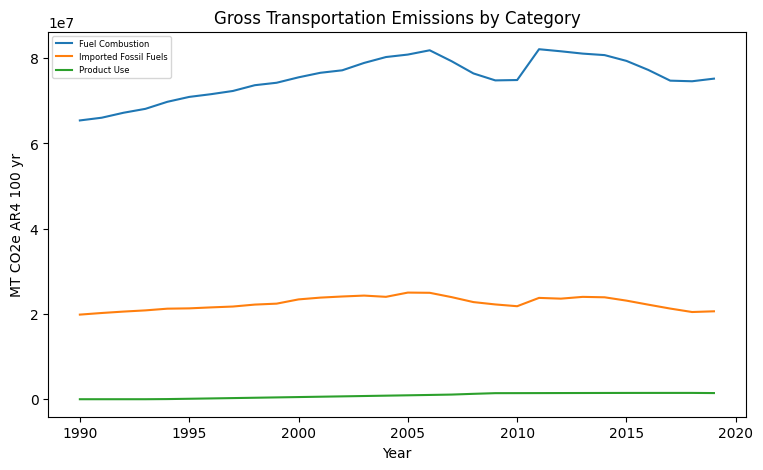

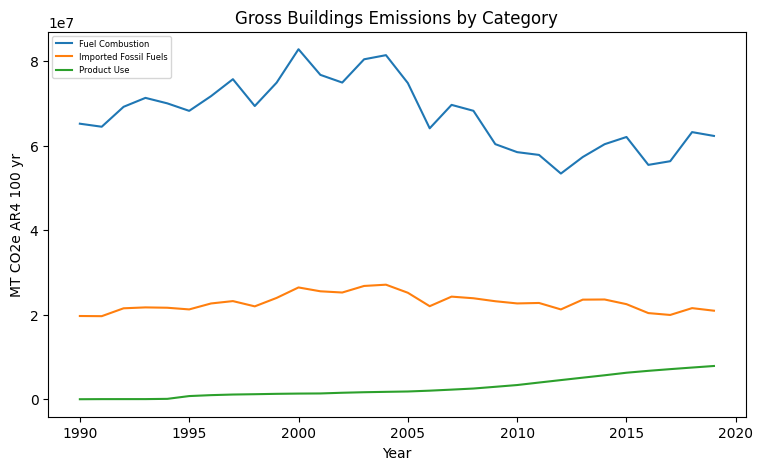

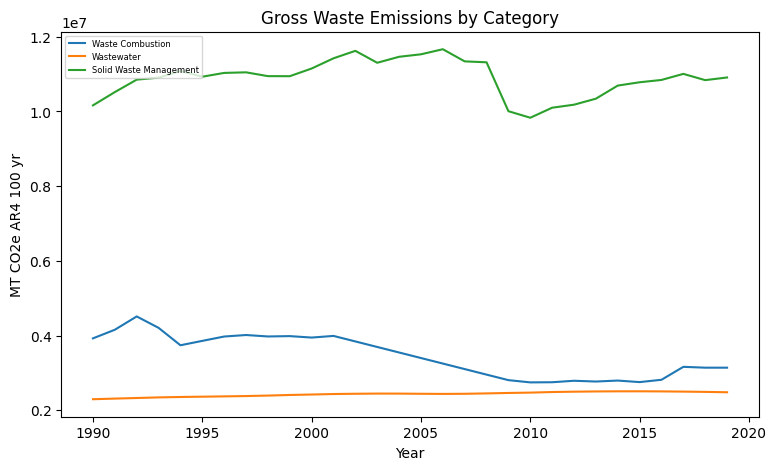

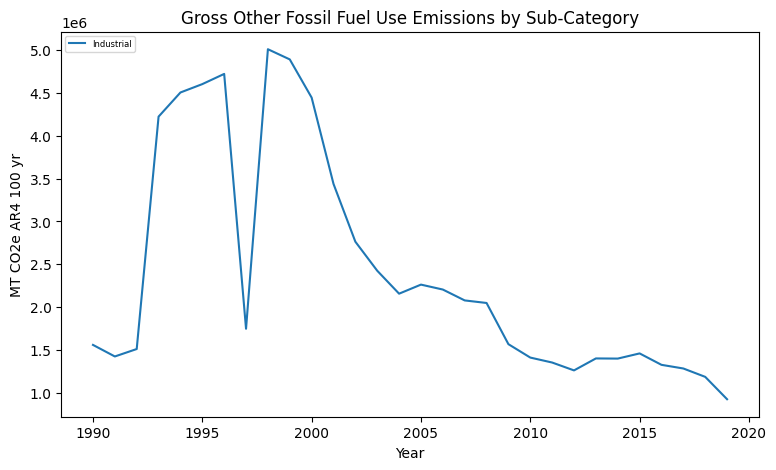

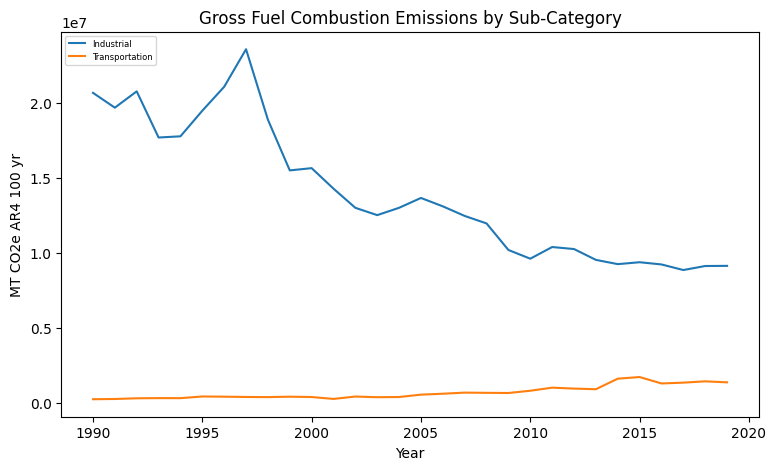

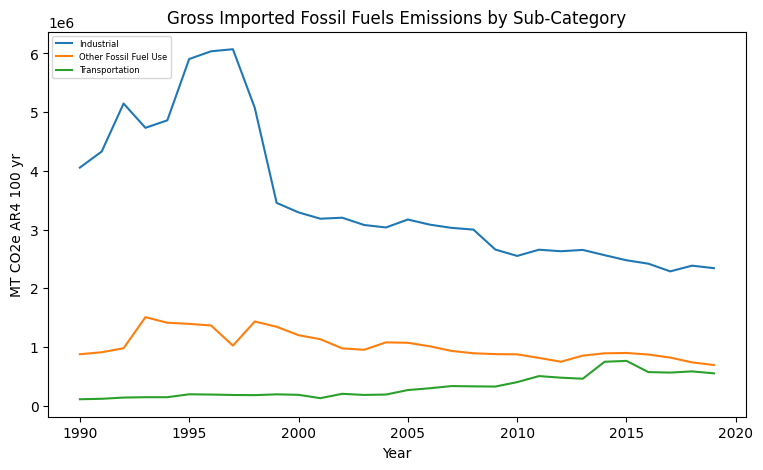

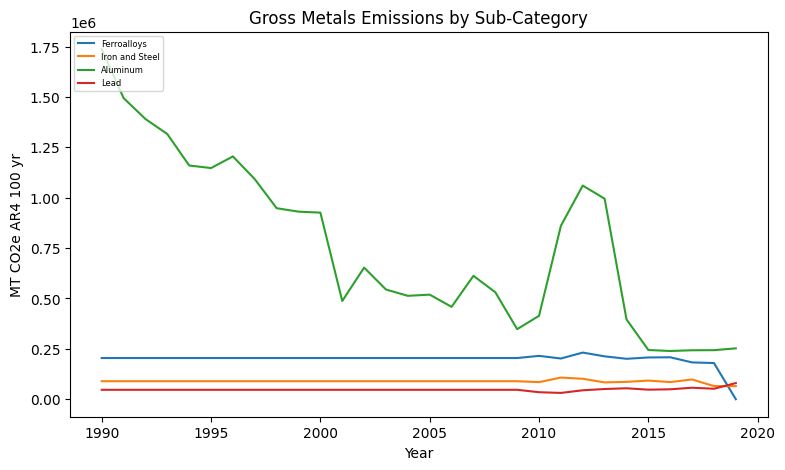

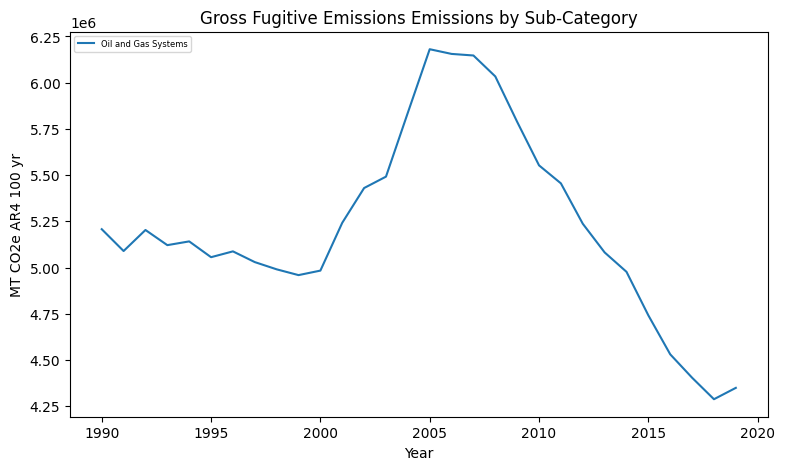

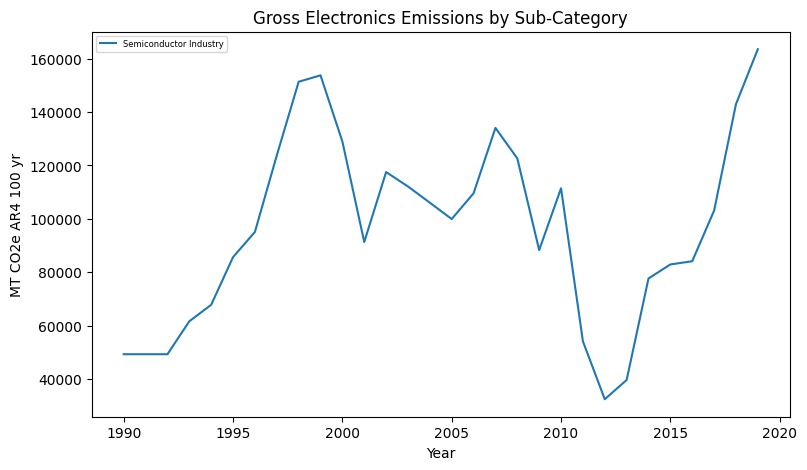

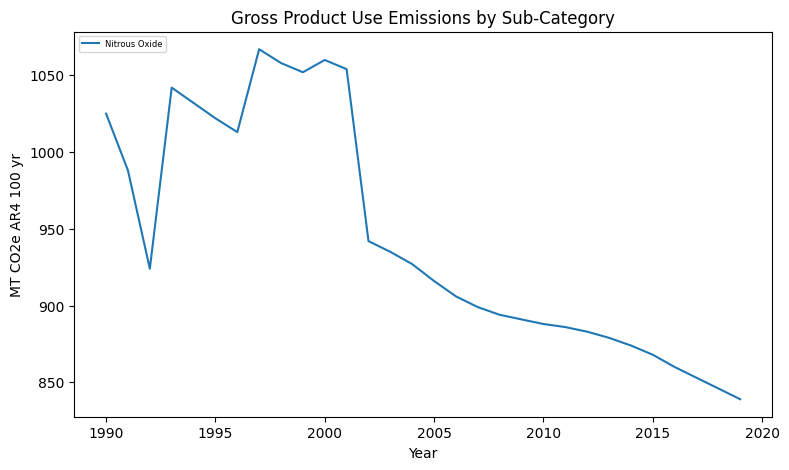

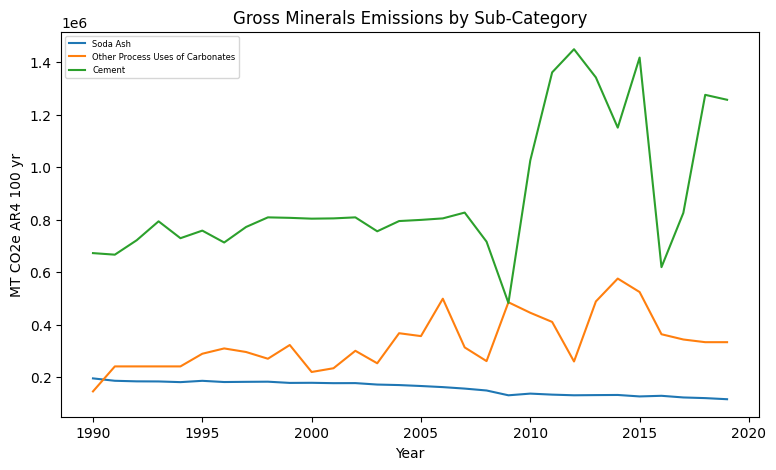

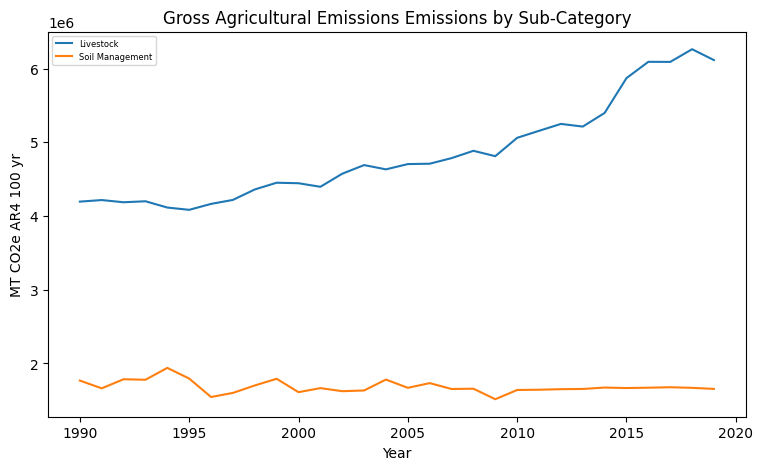

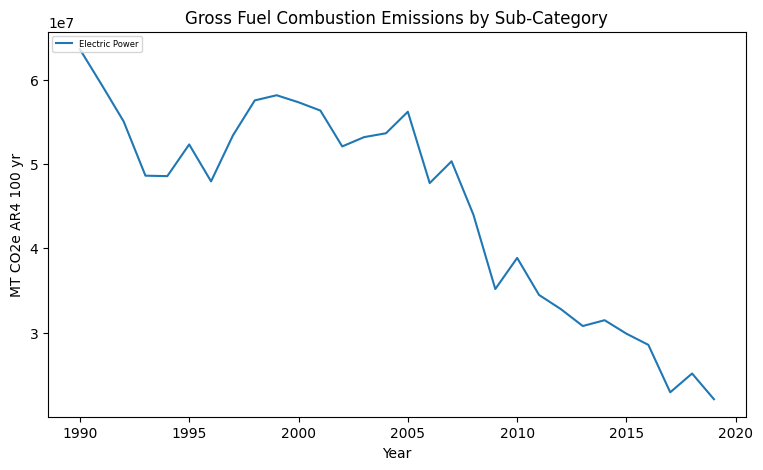

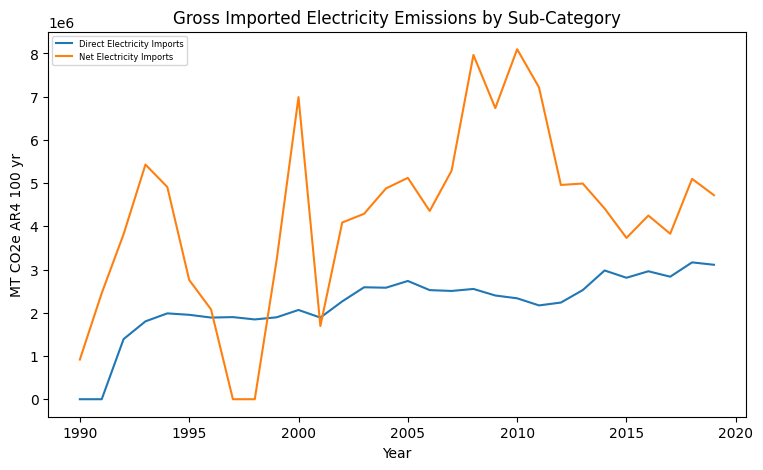

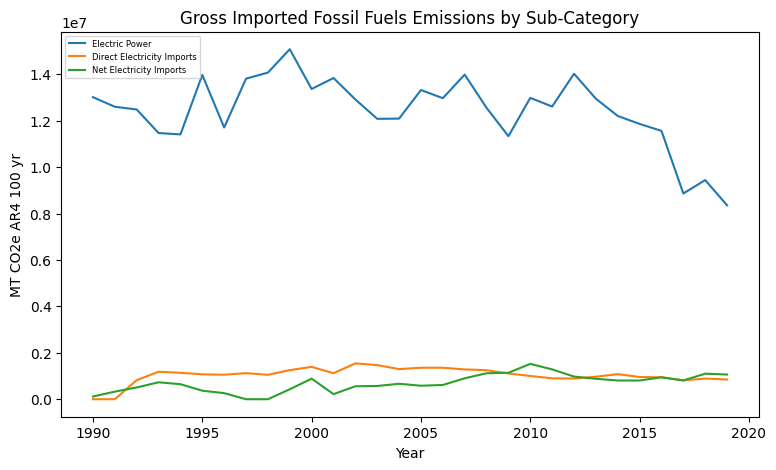

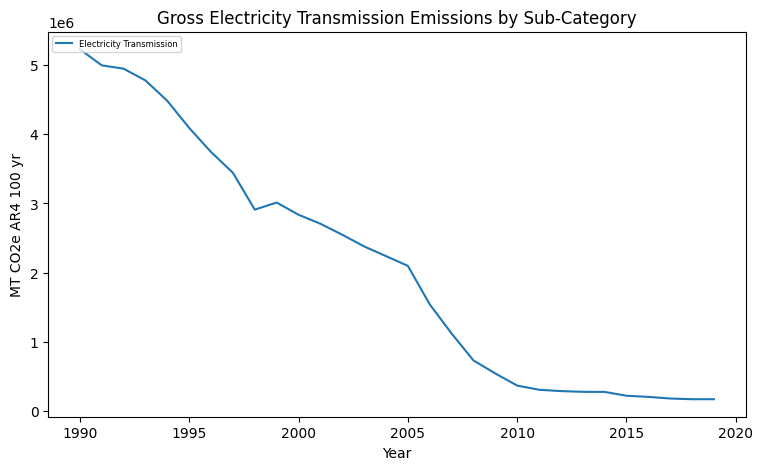

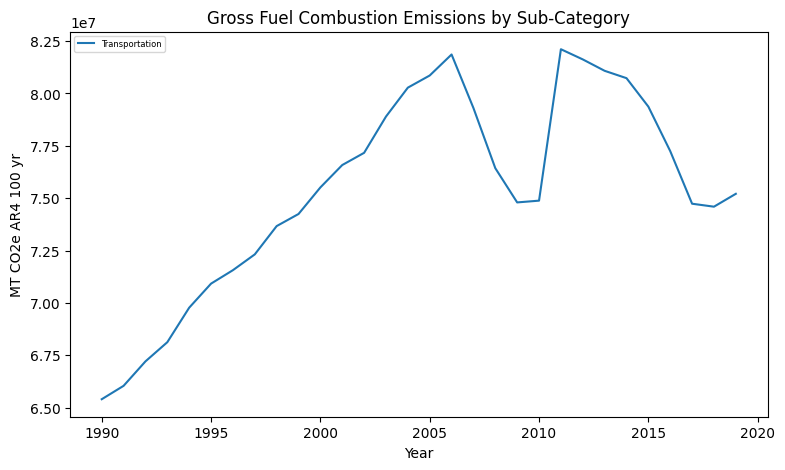

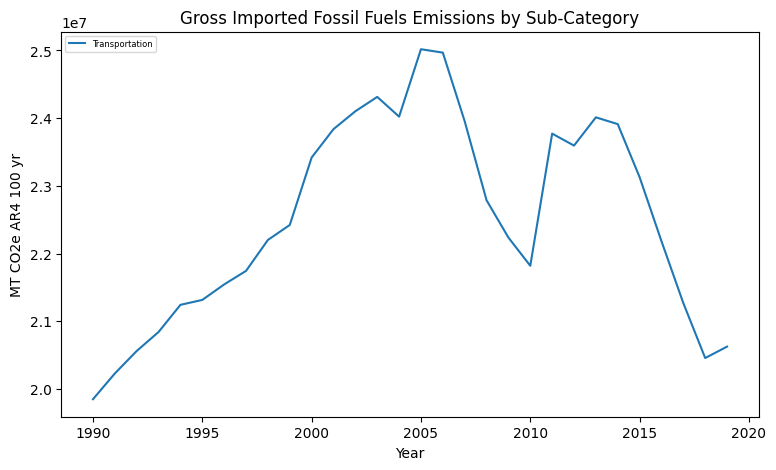

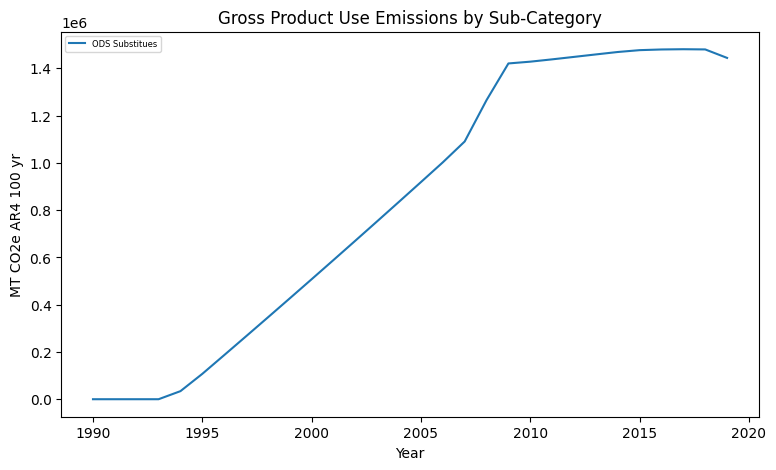

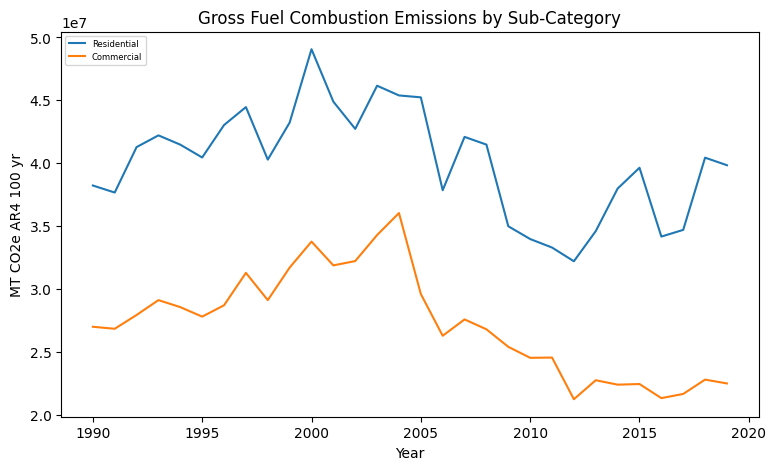

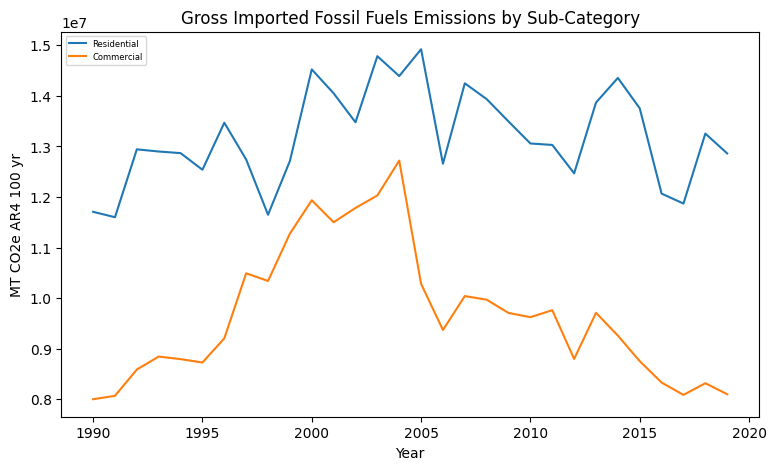

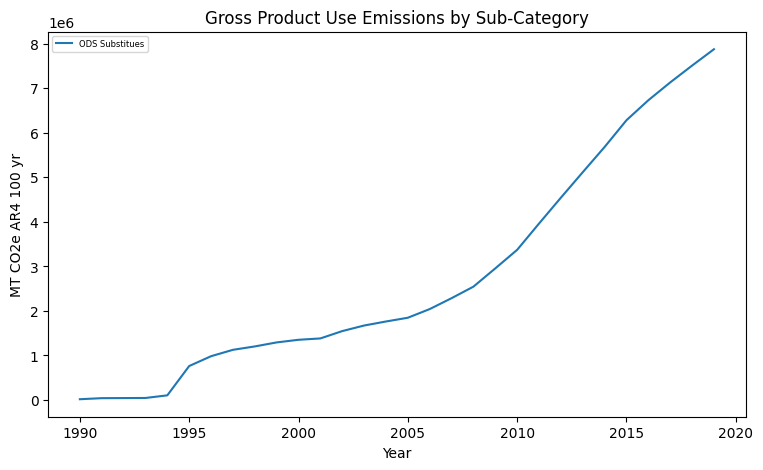

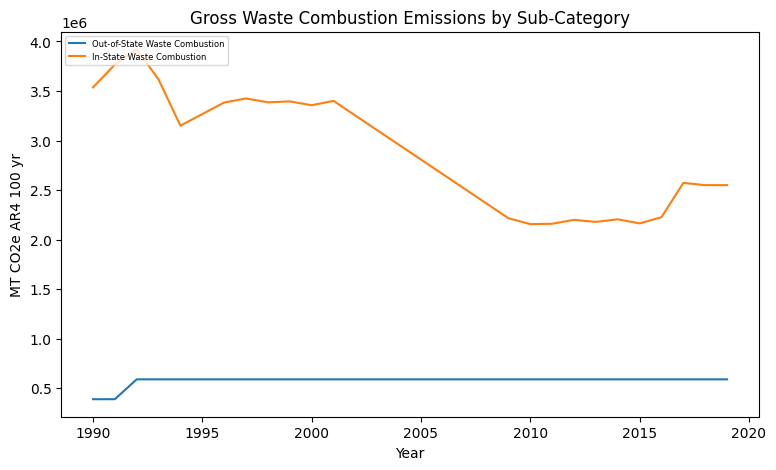

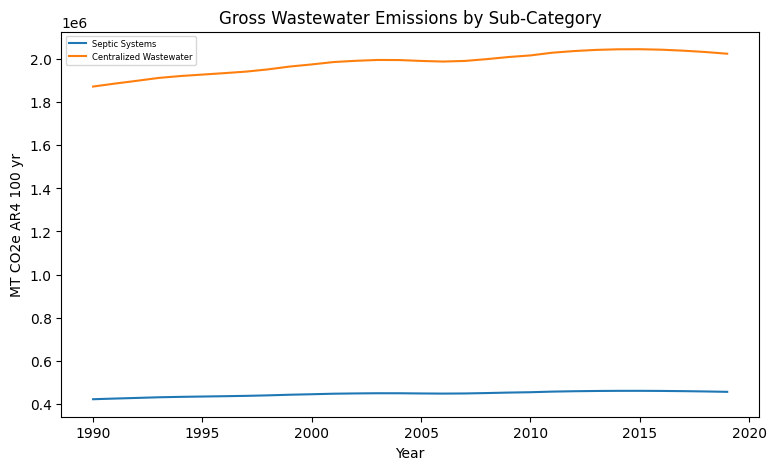

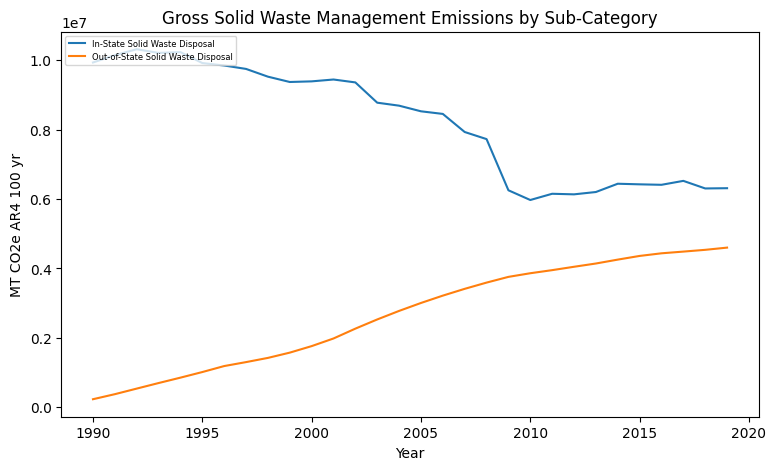

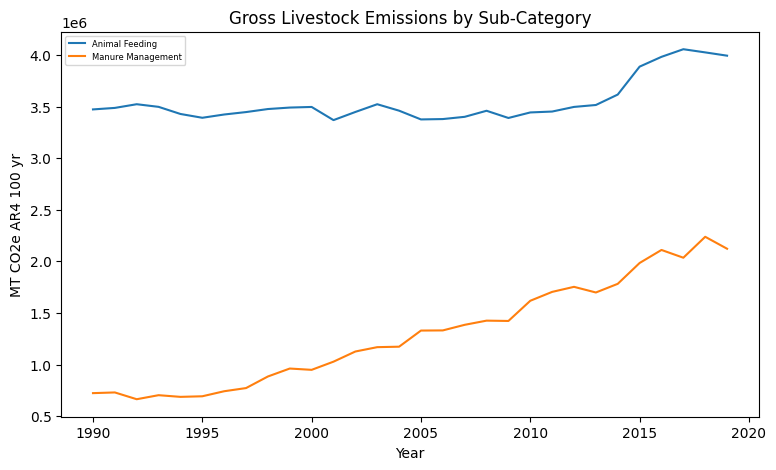

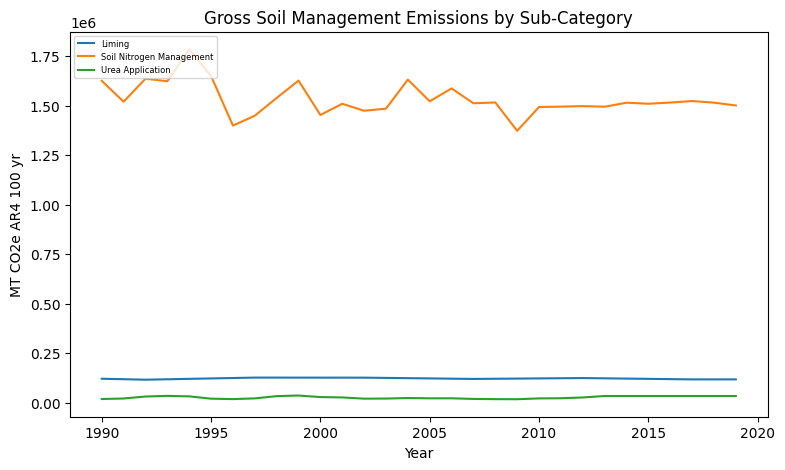

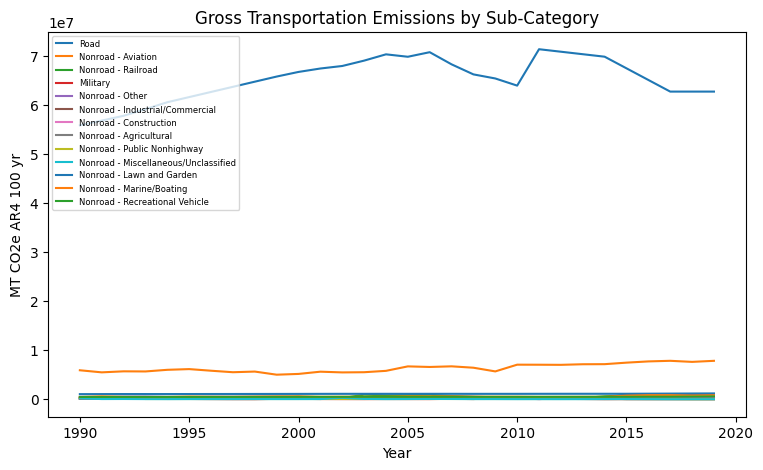

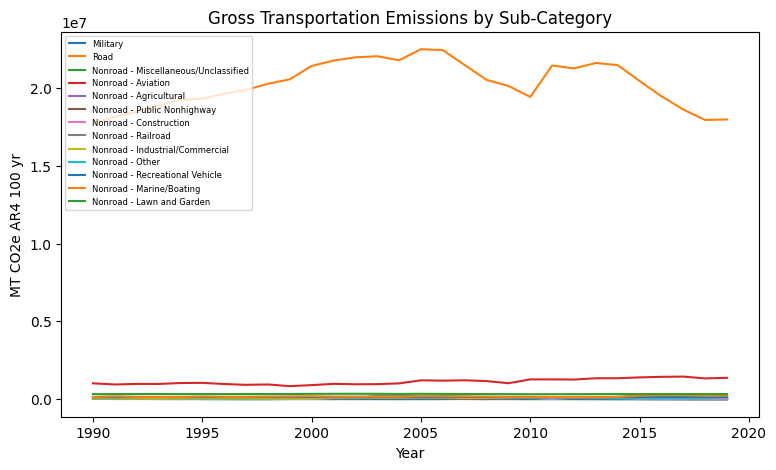

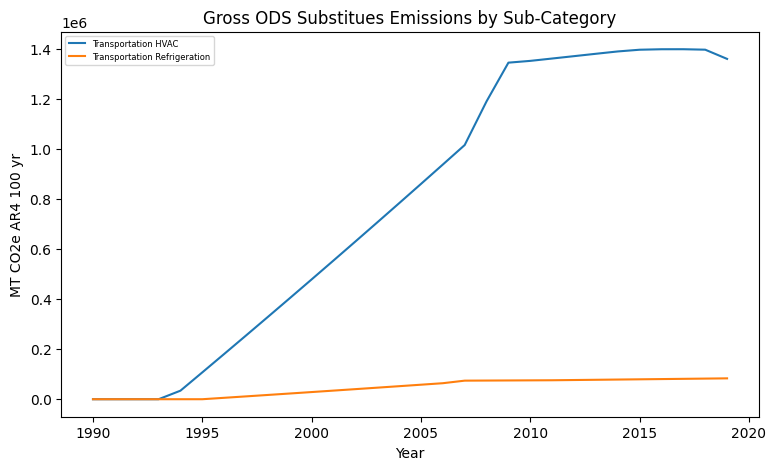

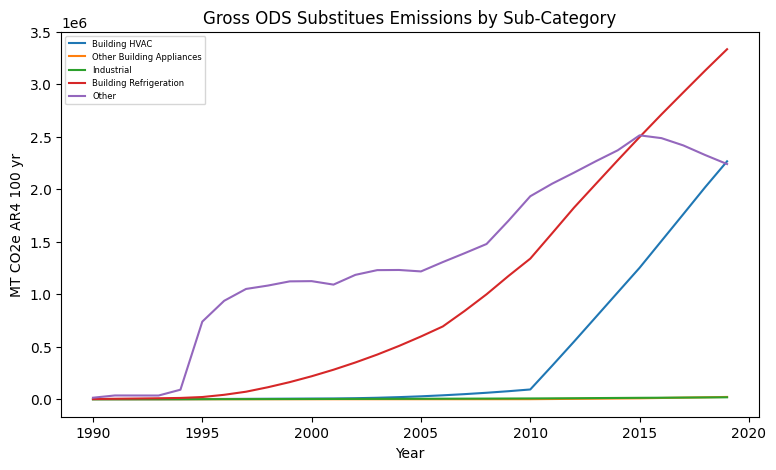

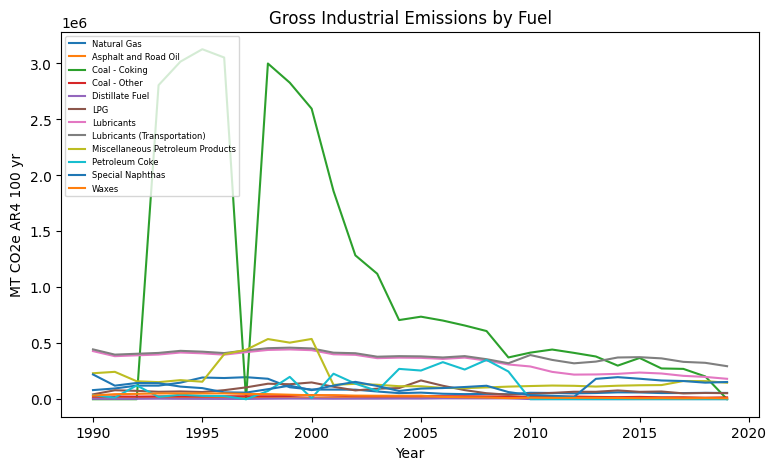

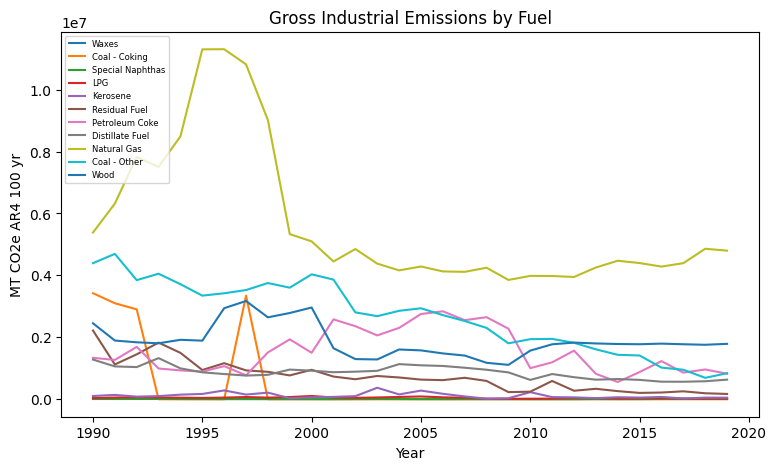

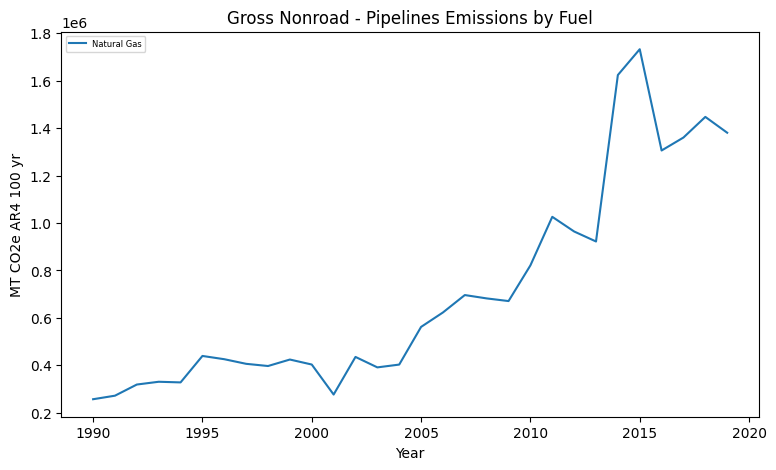

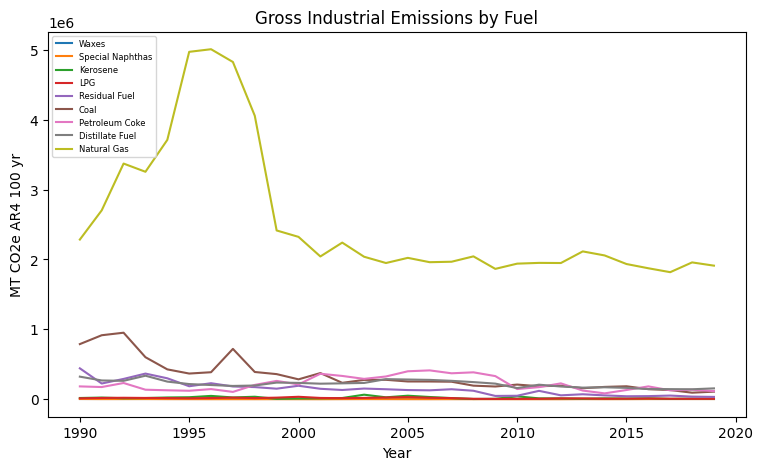

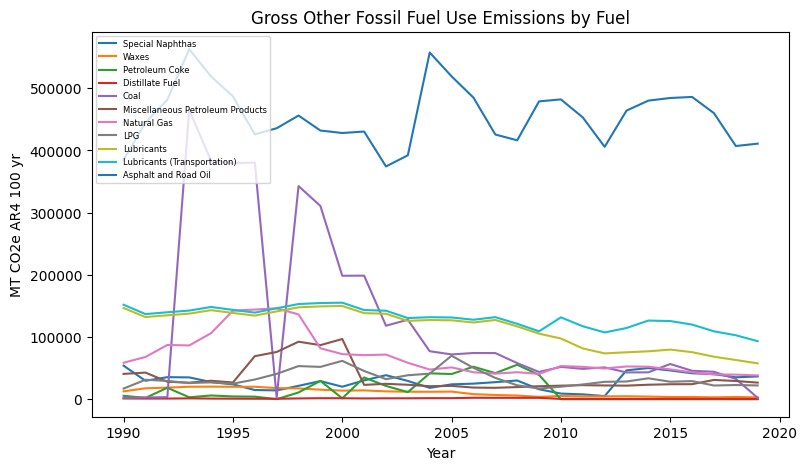

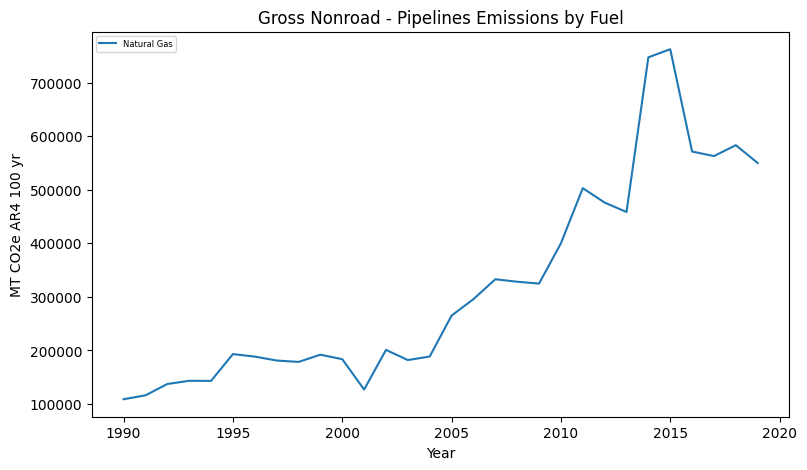

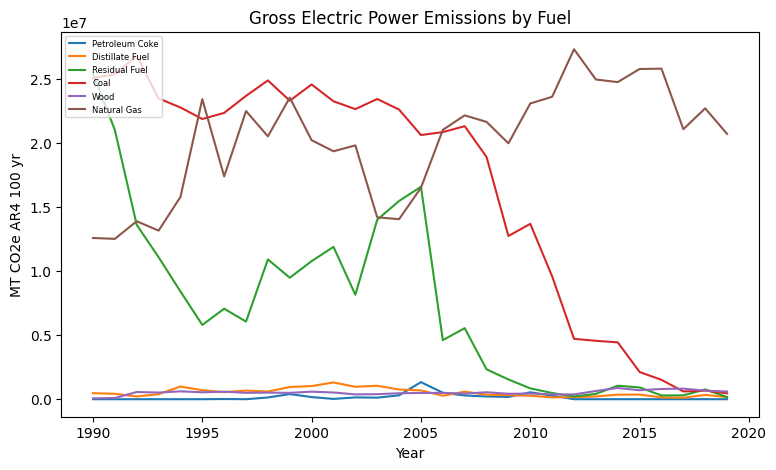

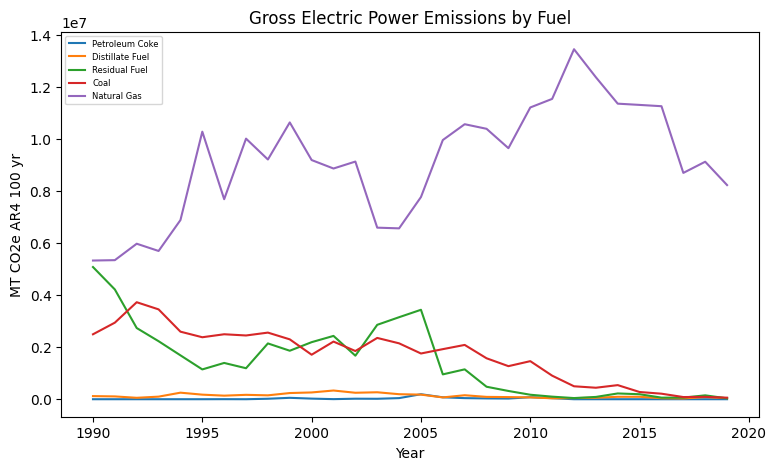

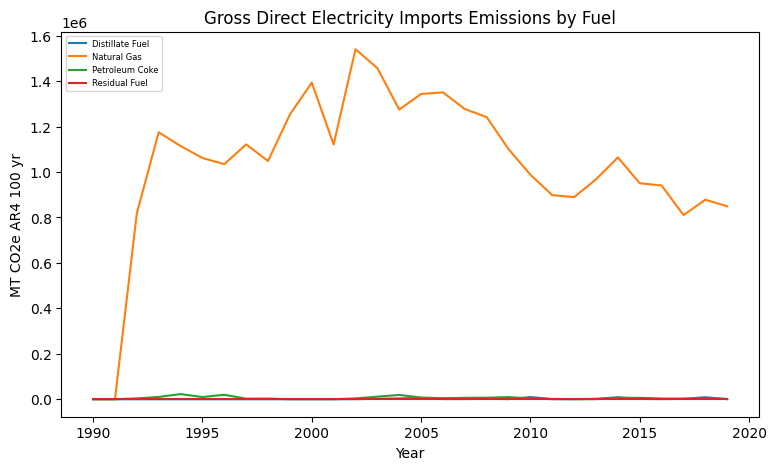

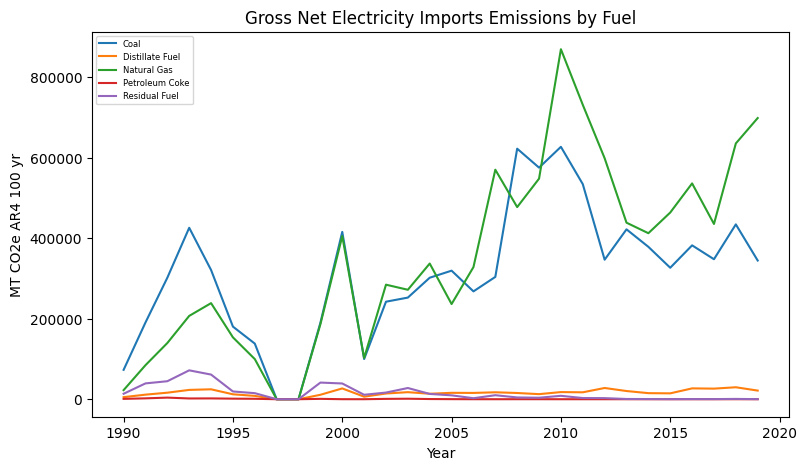

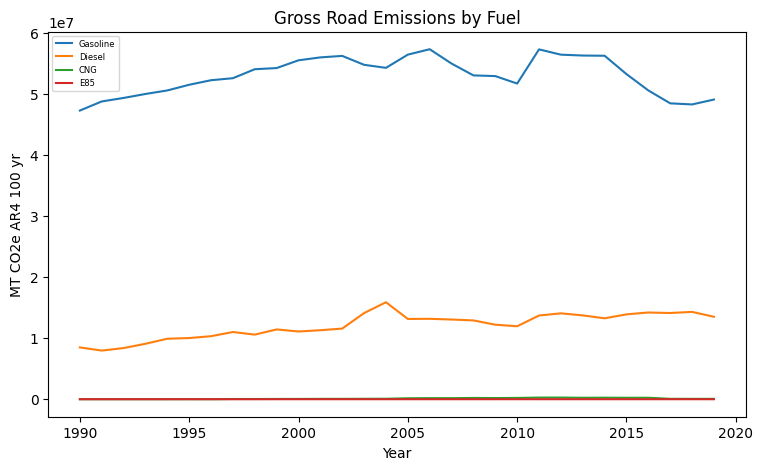

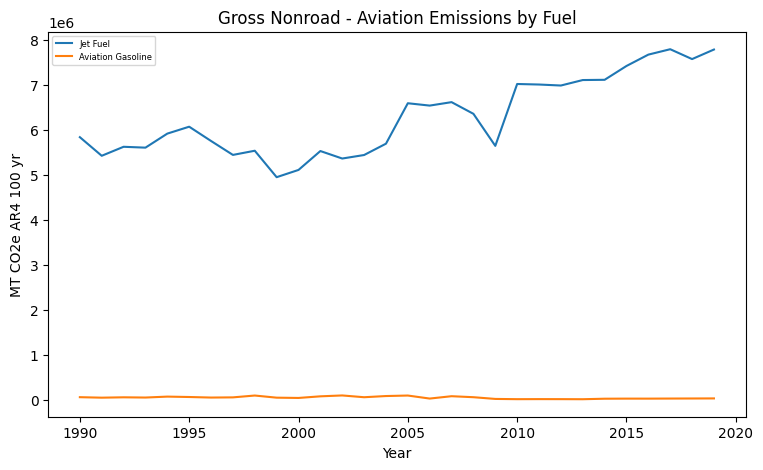

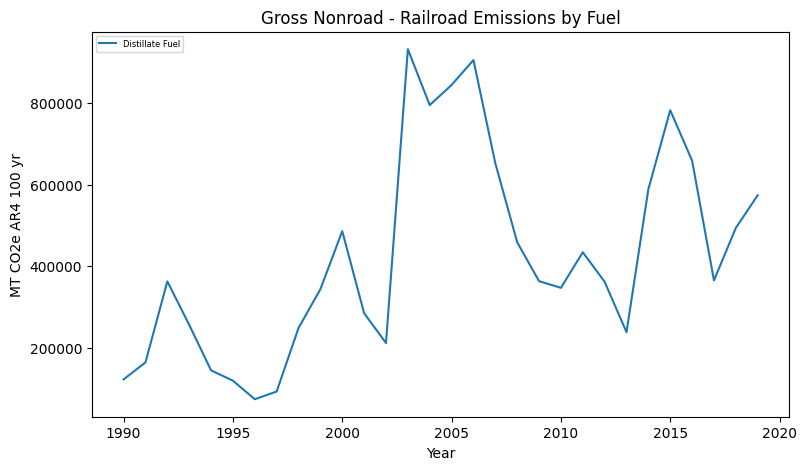

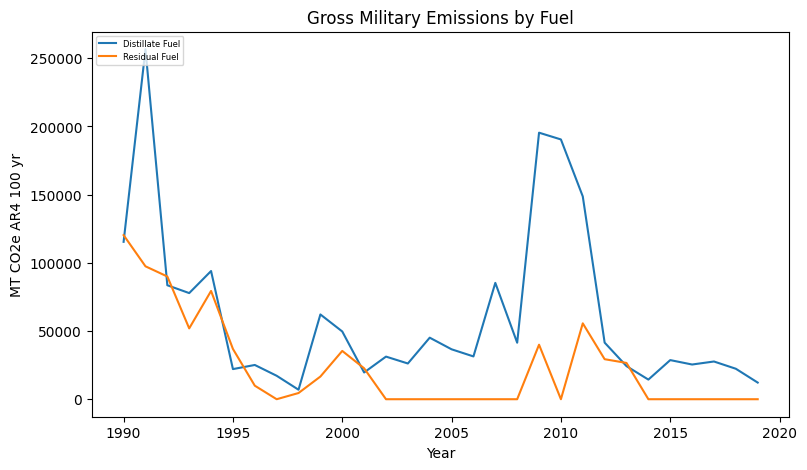

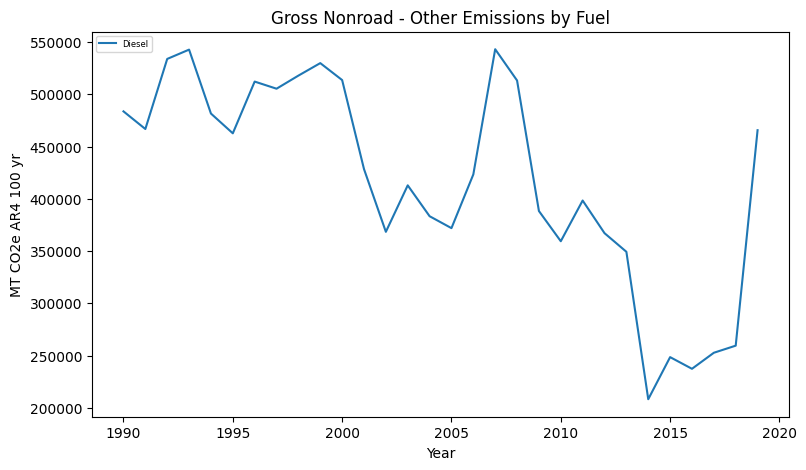

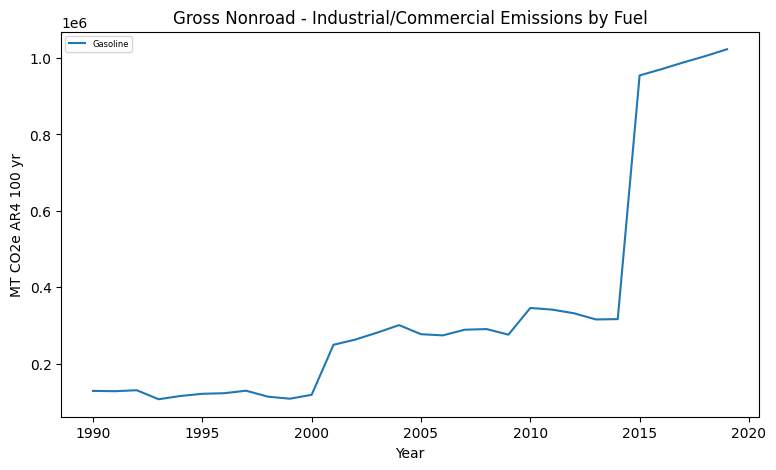

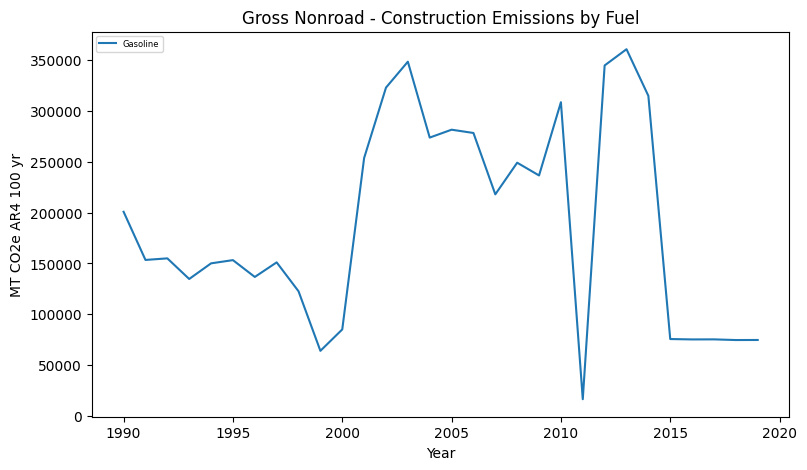

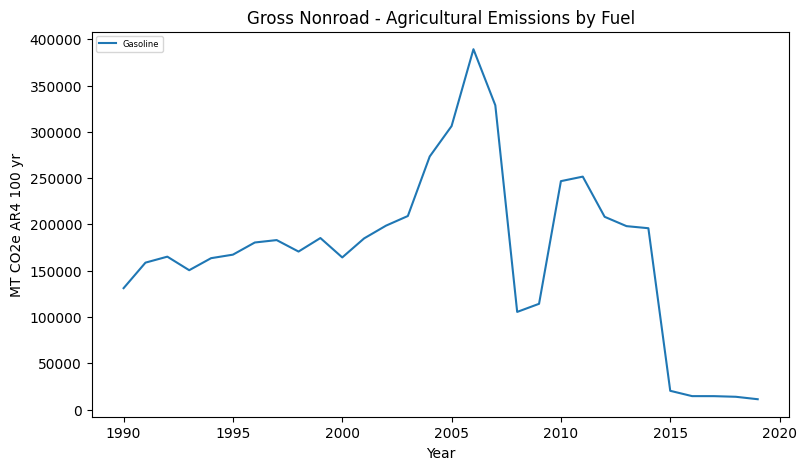

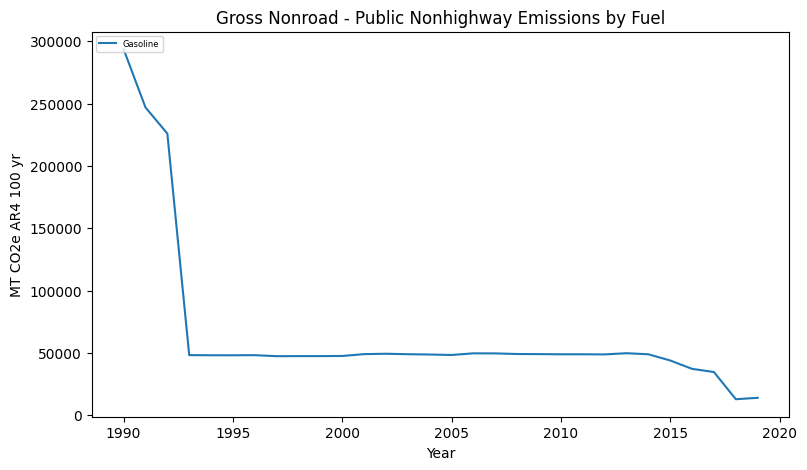

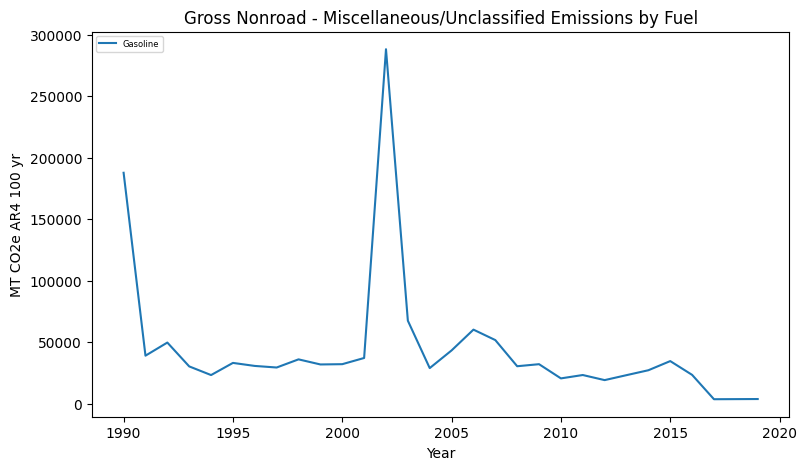

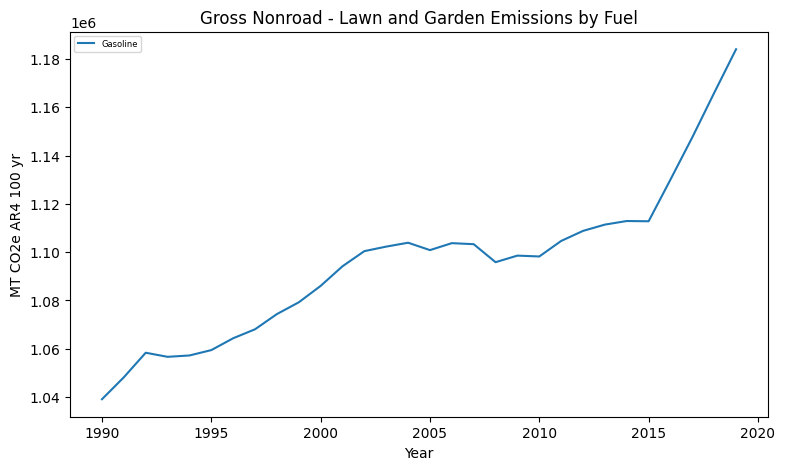

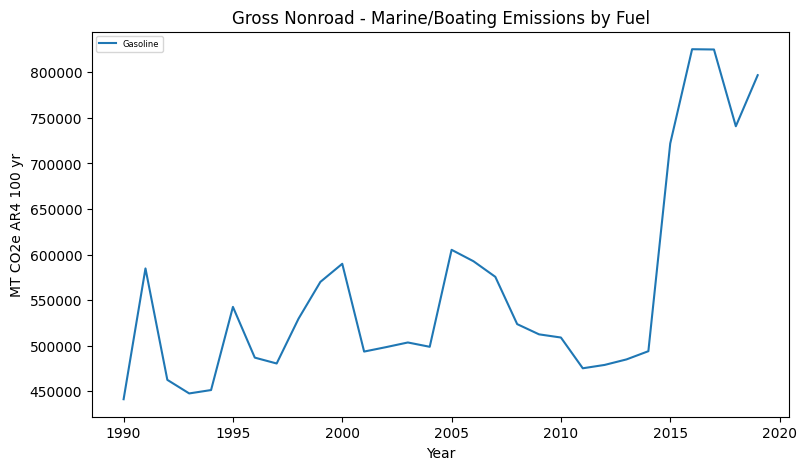

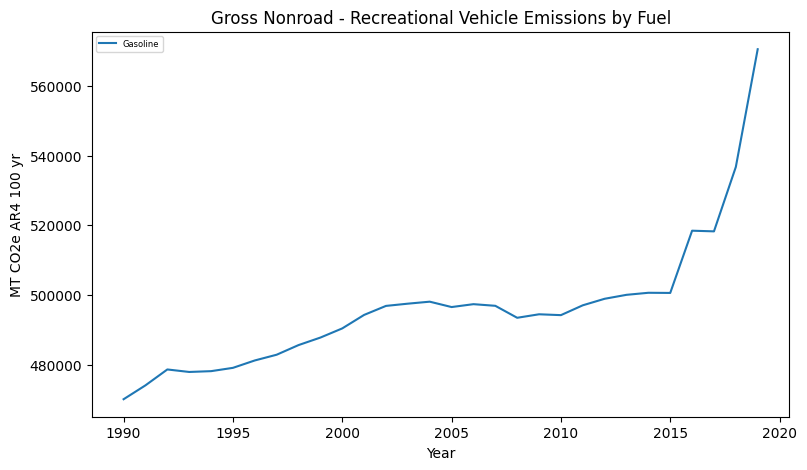

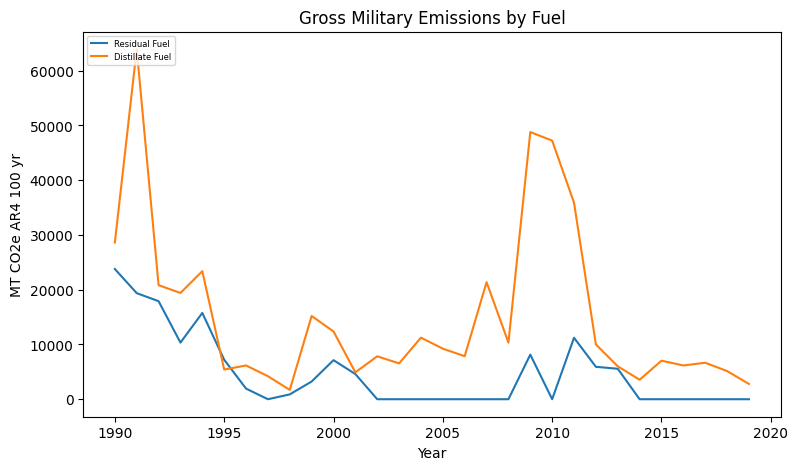

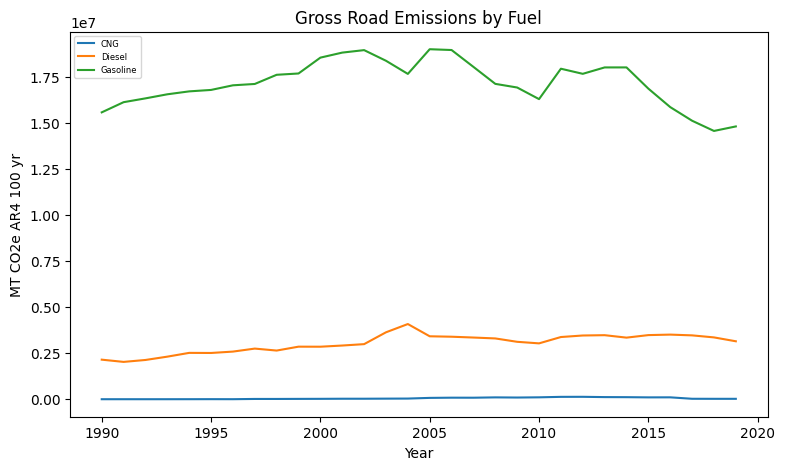

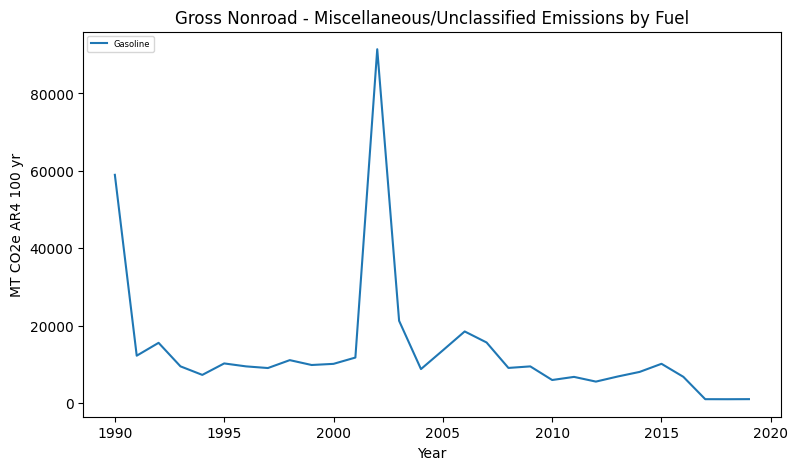

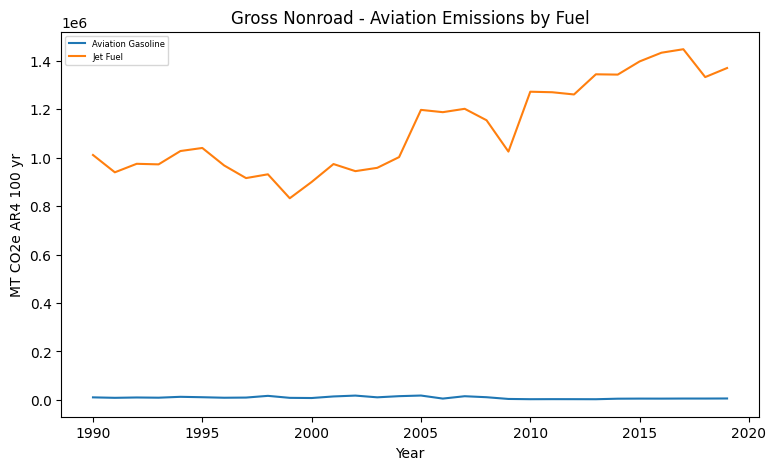

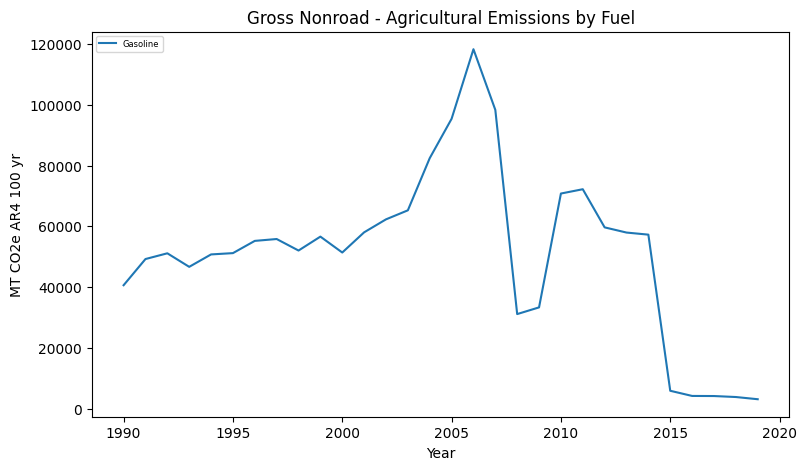

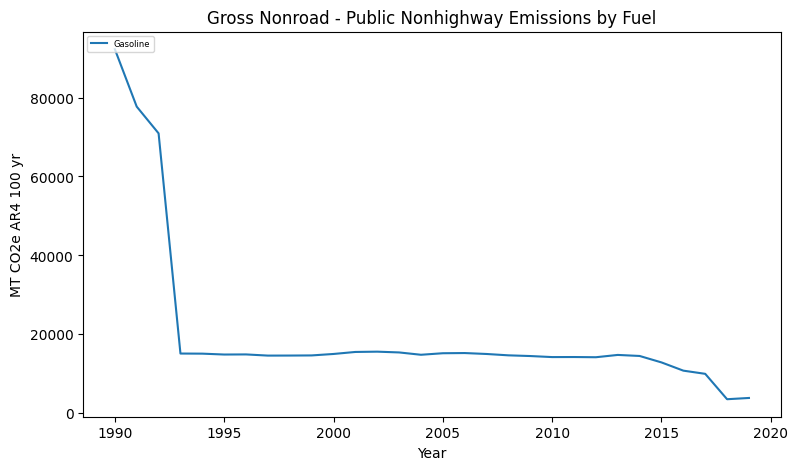

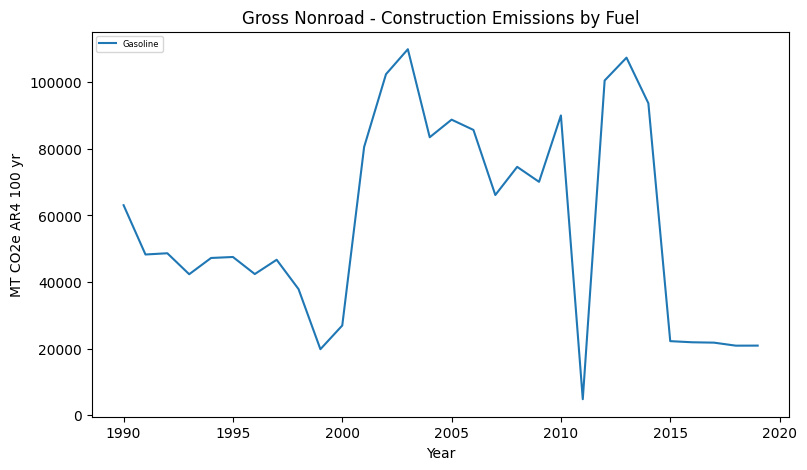

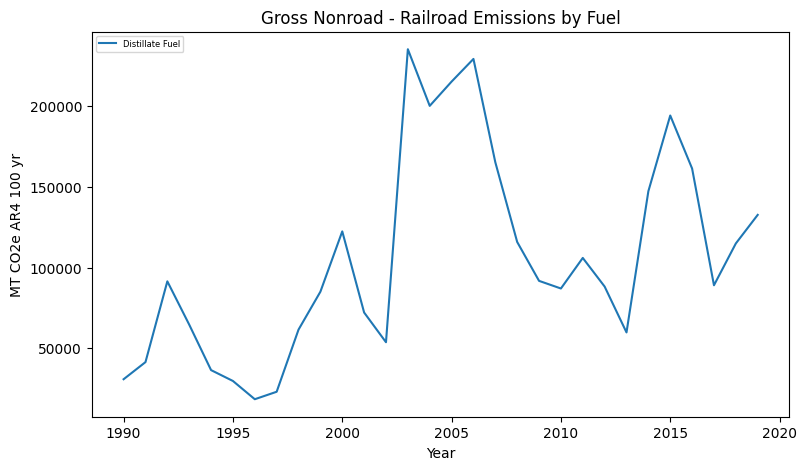

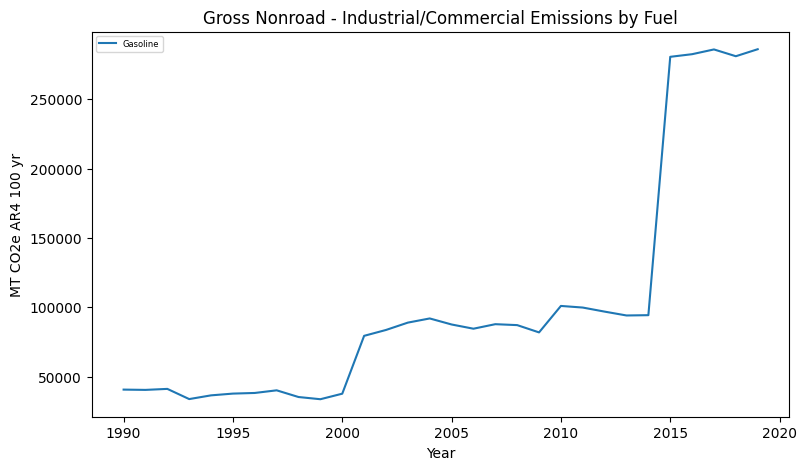

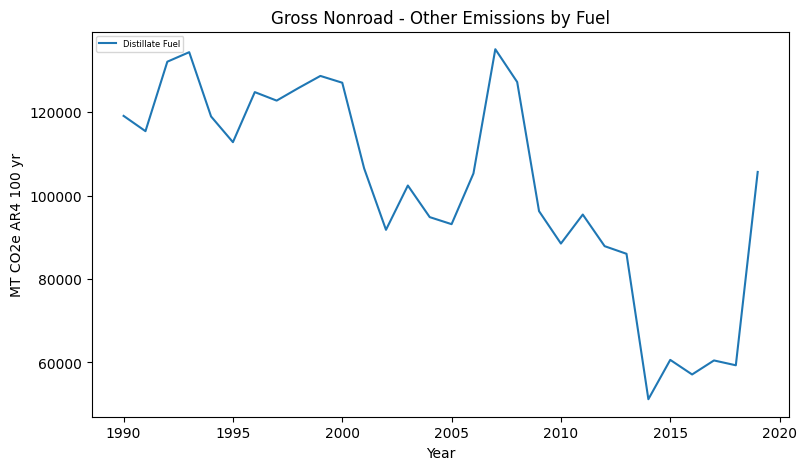

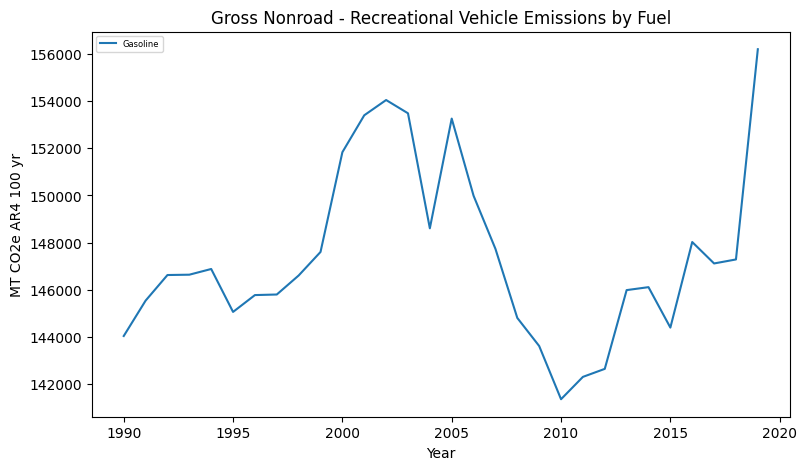

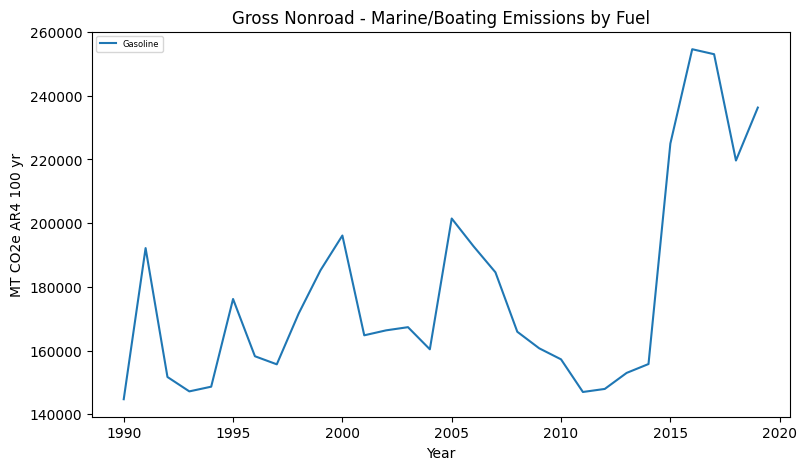

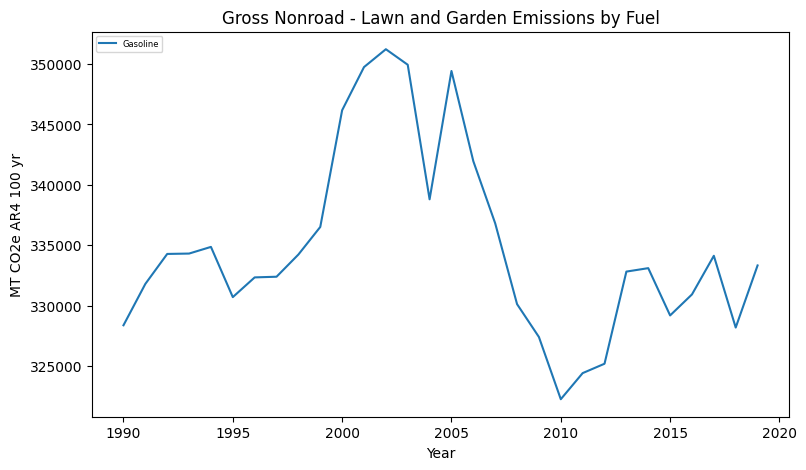

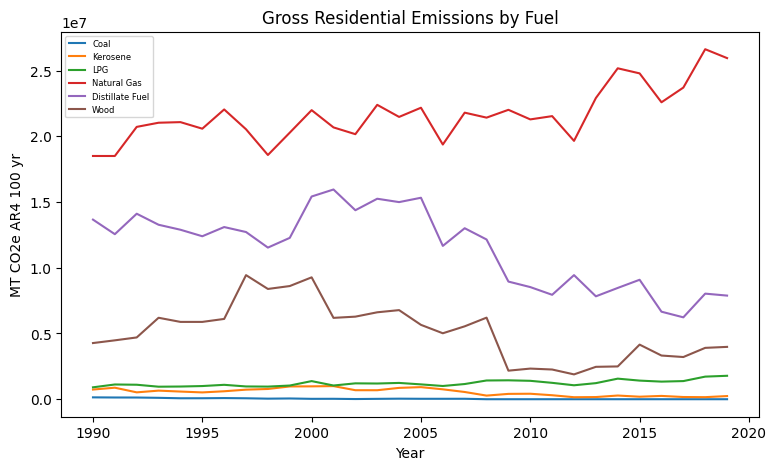

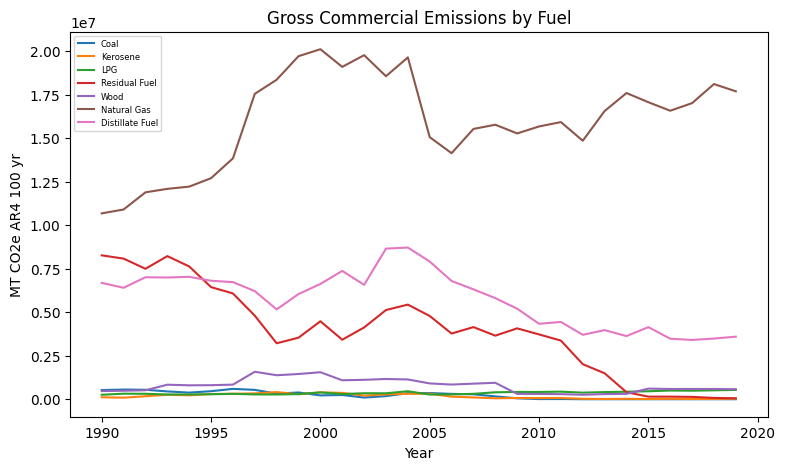

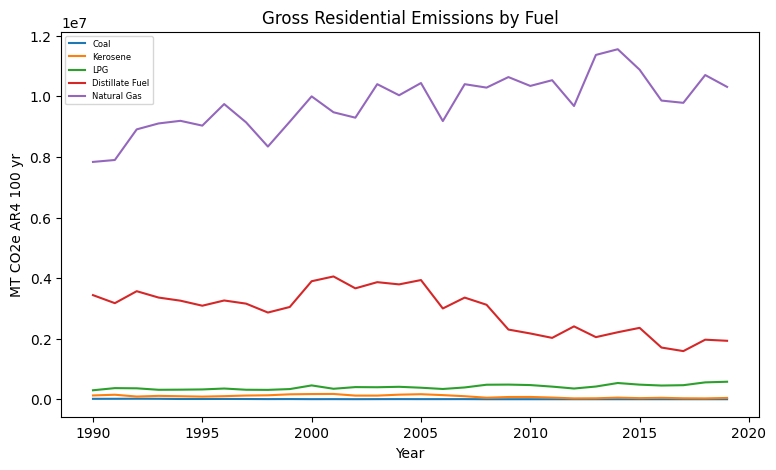

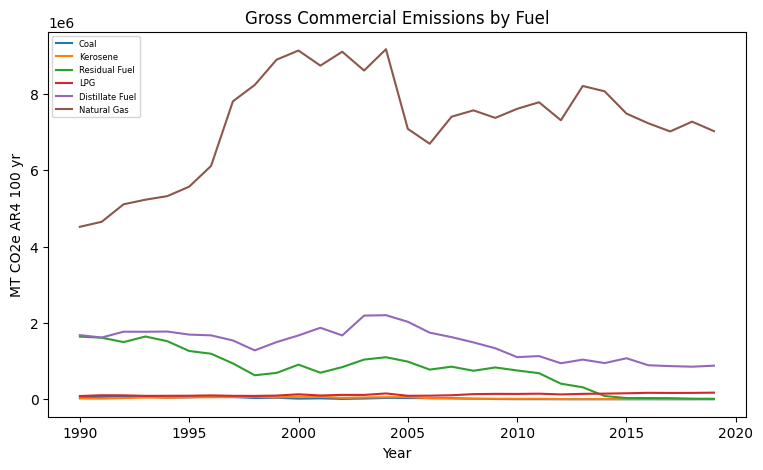

In [62]:
# Graphs
e_type = 'MT CO2e AR5 20 yr'
for i in range(2):
    if i == 1:
        e_type = 'MT CO2e AR4 100 yr'
    fig, ax = plt.subplots(figsize=(20,5))
    gasses = data.dataframe['Gas'].unique().tolist()
    gas_gross_emissions = []
    for i in range(len(gasses)):
        gas_gross_emissions.append(data.emissions_sum('Gross', emissiontype=e_type, gas=gasses[i]))
    gassname_and_emissions = {}
    for i in range(len(gasses)):
        gassname_and_emissions[gasses[i]] = gas_gross_emissions[i]
    stacked_bar = pd.DataFrame(gassname_and_emissions, index=data.years)
    stacked_bar.plot(kind='bar', stacked=True, ax=ax)
    net_emissions = pd.Series(data.emissions_sum('Net', emissiontype=e_type))
    net_emissions.plot(ax=ax)
    ax.legend(loc='upper left', prop={'size':6})
    ax.set_xlabel('Year')
    ax.set_ylabel(e_type)
    ax.set_title('Gross Greenhouse Emissions by Gas and Net Emissions')
    plt.show()

    fig, ax = plt.subplots(figsize=(9,5))
    newframe = data.dataframe[(data.dataframe['Net'] == 'Yes') & (data.dataframe['Gross'] == 'No')]
    for subcategory1 in newframe['Sub-Category 1'].unique().tolist():
        emissions = data.emissions_sum('Net', True, emissiontype=e_type, subsection1=subcategory1)
        for i in range(len(emissions)):
            emissions[i] = abs(emissions[i])
        ax.plot(data.years, emissions, label=subcategory1)
    ax.legend(loc='upper left', prop={'size':6})
    ax.set_xlabel('Year')
    ax.set_ylabel('{} Removed'.format(e_type))
    ax.set_title('Net Greenhouse Emissions Removed by Category')
    plt.show()

    for subcategory1 in newframe['Sub-Category 1'].unique().tolist():
        var = newframe[newframe['Sub-Category 1'] == subcategory1]
        fig, ax = plt.subplots(figsize=(9,5))
        break_out_flag = False
        for subcategory2 in var['Sub-Category 2'].unique().tolist():
            if subcategory2 == 'Not Applicable':
                break_out_flag = True
                plt.close()
                break
            emissions = data.emissions_sum('Net', True, emissiontype=e_type, subsection1=subcategory1, subsection2=subcategory2)
            for i in range(len(emissions)):
                emissions[i] = abs(emissions[i])
            ax.plot(data.years, emissions, label=subcategory2)
        if break_out_flag:
            break
        ax.legend(loc='upper left', prop={'size':6})
        ax.set_xlabel('Year')
        ax.set_ylabel('{} Removed'.format(e_type))
        ax.set_title('Net {} Greenhouse Emissions Removals by Section'.format(subcategory1))
        plt.show()

    for subcategory1 in newframe['Sub-Category 1'].unique().tolist():
        var = newframe[newframe['Sub-Category 1'] == subcategory1]
        for subcategory2 in var['Sub-Category 2'].unique().tolist():
            var = newframe[(newframe['Sub-Category 1'] == subcategory1) & (newframe['Sub-Category 2'] == subcategory2)]
            fig, ax = plt.subplots(figsize=(9,5))
            break_out_flag = False
            for subcategory3 in var['Sub-Category 3'].unique().tolist():
                if subcategory2 == 'Not Applicable':
                    break_out_flag = True
                    plt.close()
                    break
                emissions = data.emissions_sum('Net', True, emissiontype=e_type, subsection1=subcategory1, subsection2=subcategory2, subsection3=subcategory3)
                for i in range(len(emissions)):
                    emissions[i] = abs(emissions[i])
                ax.plot(data.years, emissions, label=subcategory3)
            if break_out_flag:
                break
            ax.legend(loc='upper left', prop={'size':6})
            ax.set_xlabel('Year')
            ax.set_ylabel('{} Removed'.format(e_type))
            ax.set_title('Net {} Greenhouse Emissions Removals by Sub-Section'.format(subcategory2))
            plt.show()

    fig, ax = plt.subplots(figsize=(9,5))
    newframe = data.dataframe[data.dataframe['Gross'] == 'Yes']
    for sector in newframe['Economic Sector'].unique().tolist():
        ax.plot(data.years, data.emissions_sum('Gross', emissiontype=e_type, sector=sector), label=sector)
    ax.legend(loc='upper left', prop={'size':6})
    ax.set_xlabel('Year')
    ax.set_ylabel(e_type)
    ax.set_title('Gross Greenhouse Emissions by Economic Sector')
    plt.show()

    for sector in newframe['Economic Sector'].unique().tolist():
        var = newframe[newframe['Economic Sector'] == sector]
        fig, ax = plt.subplots(figsize=(9,5))
        for category in var['Category'].unique().tolist():
            ax.plot(data.years, data.emissions_sum('Gross', emissiontype=e_type, sector=sector, category=category), label=category)
        ax.legend(loc='upper left', prop={'size':6})
        ax.set_xlabel('Year')
        ax.set_ylabel(e_type)
        ax.set_title('Gross {} Emissions by Category'.format(sector))
        plt.show()

    for sector in newframe['Economic Sector'].unique().tolist():
        var = newframe[newframe['Economic Sector'] == sector]
        for category in var['Category'].unique().tolist():
            var = newframe[(newframe['Economic Sector'] == sector) & (newframe['Category'] == category)]
            fig, ax = plt.subplots(figsize=(9,5))
            for subcategory in var['Sub-Category 1'].unique().tolist():
                ax.plot(data.years, data.emissions_sum('Gross', emissiontype=e_type, sector=sector, category=category, subsection1=subcategory), label=subcategory)
            ax.legend(loc='upper left', prop={'size':6})
            ax.set_xlabel('Year')
            ax.set_ylabel(e_type)
            ax.set_title('Gross {} Emissions by Sub-Category'.format(category))
            plt.show()

    for sector in newframe['Economic Sector'].unique().tolist():
        var = newframe[newframe['Economic Sector'] == sector]
        for category in var['Category'].unique().tolist():
            var = newframe[(newframe['Economic Sector'] == sector) & (newframe['Category'] == category)]
            for subcategory1 in var['Sub-Category 1'].unique().tolist():
                var = newframe[(newframe['Economic Sector'] == sector) & (newframe['Category'] == category) & (newframe['Sub-Category 1'] == subcategory1)]
                fig, ax = plt.subplots(figsize=(9,5))
                break_out_flag = False
                for subcategory2 in var['Sub-Category 2'].unique().tolist():
                    if subcategory2 == 'Not Applicable':
                        break_out_flag = True
                        plt.close()
                        break
                    ax.plot(data.years, data.emissions_sum('Gross', emissiontype=e_type, sector=sector, category=category, subsection1=subcategory1, subsection2=subcategory2), label=subcategory2)
                if break_out_flag:
                    break
                ax.legend(loc='upper left', prop={'size':6})
                ax.set_xlabel('Year')
                ax.set_ylabel(e_type)
                ax.set_title('Gross {} Emissions by Sub-Category'.format(subcategory1))
                plt.show()

    for sector in newframe['Economic Sector'].unique().tolist():
        var = newframe[newframe['Economic Sector'] == sector]
        for category in var['Category'].unique().tolist():
            var = newframe[(newframe['Economic Sector'] == sector) & (newframe['Category'] == category)]
            for subcategory1 in var['Sub-Category 1'].unique().tolist():
                var = newframe[(newframe['Economic Sector'] == sector) & (newframe['Category'] == category) & (newframe['Sub-Category 1'] == subcategory1)]
                for subcategory2 in var['Sub-Category 2'].unique().tolist():
                    var = newframe[(newframe['Economic Sector'] == sector) & (newframe['Category'] == category) & (newframe['Sub-Category 1'] == subcategory1) & (newframe['Sub-Category 2'] == subcategory2)]
                    fig, ax = plt.subplots(figsize=(9,5))
                    break_out_flag = False
                    for subcategory3 in var['Sub-Category 3'].unique().tolist():
                        if subcategory3 == 'Not Applicable' or subcategory3 == 'All':
                            break_out_flag = True
                            plt.close()
                            break
                        ax.plot(data.years, data.emissions_sum('Gross', emissiontype=e_type, sector=sector, category=category, subsection1=subcategory1, subsection2=subcategory2, subsection3=subcategory3), label=subcategory3)
                    if break_out_flag:
                        break
                    ax.legend(loc='upper left', prop={'size':6})
                    ax.set_xlabel('Year')
                    ax.set_ylabel(e_type)
                    titlestr = subcategory2
                    if titlestr == 'Not Applicable':
                        titlestr = subcategory1
                    ax.set_title('Gross {} Emissions by Fuel'.format(titlestr))
                    plt.show()

## Machine Learning
- use the code to generate a model
- start by pick data to use as your x and y
- split your data into a training set (80) and a validation set (20)

In [75]:
# split the data into data_train and data_val
data_frame_dict = {}
data_frame_dict['Year'] = data.years
data_frame_dict['MT CO2e AR5 20 yr'] = data.emissions_sum('Gross', sector='Electricity')
data_frame = pd.DataFrame(data_frame_dict)
data_train = data_frame.sample(frac=0.8)
data_val = data_frame.sample(frac=0.2)

In [76]:
# save your x and y for the training/validation sets
# use x_train/y_train and x_val,y_val
x_train = data_train['Year'].array
y_train = data_train['MT CO2e AR5 20 yr'].array
x_train = x_train.reshape(-1, 1)
    
x_val = data_val['Year'].array
y_val = data_val['MT CO2e AR5 20 yr'].array

In [77]:
from sklearn import svm
# if you want a classification use this code
#model_classification = svm.SVC()
#model_classification.fit(x_train, y_train)

# if you want regression use this code
model_regression = svm.SVR(C=1e10)
model_regression.fit(x_train, y_train)

SVR(C=10000000000.0)

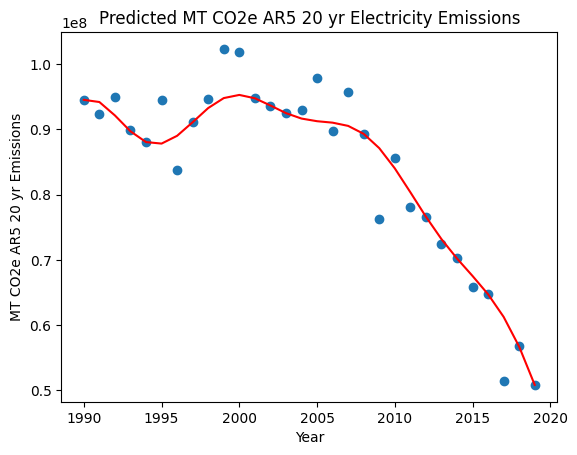

In [78]:
plt.scatter(data_frame['Year'], data_frame['MT CO2e AR5 20 yr'])
predicted_points = []
for i in range(30):
    predicted_points.append(model_regression.predict([[1990+i]]))
plt.plot(data.years, predicted_points, color='red')
plt.xlabel('Year')
plt.ylabel('MT CO2e AR5 20 yr Emissions')
plt.title('Predicted MT CO2e AR5 20 yr Electricity Emissions')
plt.show()

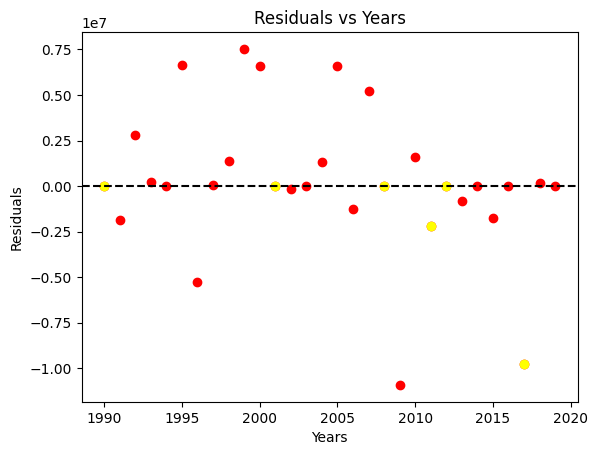

In [95]:
# Visualizing Error
errors = []
observed = data_frame['MT CO2e AR5 20 yr'].array
years = data_frame['Year'].array
for i in range(len(years)):
    errors.append(observed[i] - model_regression.predict([[years[i]]]))
error_val = []
observed_val = data_val['MT CO2e AR5 20 yr'].array
years_val = data_val['Year'].array
for i in range(len(years_val)):
    error_val.append(observed_val[i] - model_regression.predict([[years_val[i]]]))
plt.scatter(years, errors, color='red')
plt.scatter(years_val, error_val, color='yellow')
plt.axhline(0, linestyle='--', color='black')
plt.xlabel('Years')
plt.ylabel('Residuals')
plt.title('Residuals vs Years')
plt.savefig('0.jpg')
plt.show()

## Machine Learning Testing
- use a loop to test your model against the validation set you created
- make a graph with a scater plot of the data and a plot of the model

In [96]:
# use this loop to test your model, you will need to talk about the error
error = 0
n = len(x_val)
for i in range(n):
    y_pred = model_regression.predict([[x_val[i]]])
    error = error + (y_pred - y_val[i])**2
MSE = error / n
RMSE = np.sqrt(MSE)
print(MSE)
print(RMSE)

[1.67135264e+13]
[4088217.99998242]


[25287196.13961942]


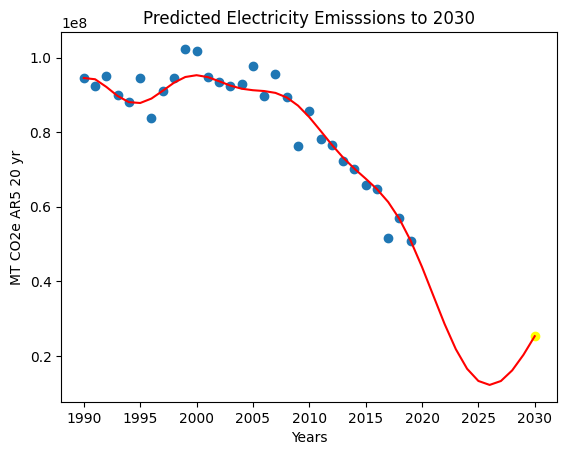

In [100]:
# Made plot of data and model previously

# use the model to make a prediction about an unknown
# Predicting the emissions in 2030
years = list(range(1990, 2031))
pred_2030 = model_regression.predict([[2030]])
predicted_points = []
for year in years:
    predicted_points.append(model_regression.predict([[year]]))
plt.scatter(data_frame['Year'], data_frame['MT CO2e AR5 20 yr'])
plt.plot(years, predicted_points, color='red')
plt.scatter(2030, pred_2030, color='yellow')
plt.xlabel('Years')
plt.ylabel('MT CO2e AR5 20 yr')
plt.title('Predicted Electricity Emisssions to 2030')
print(pred_2030)